In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import tree
from sklearn.utils import shuffle

In [2]:
#change set option to print all information
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#import csv file
df_raw = pd.read_csv('Data_Cortex_Nuclear.csv' )

In [4]:
#preview first 5 rows and column names
df_raw.head().T

0          1          2          3          4
MouseID              309_1      309_2      309_3      309_4      309_5
DYRK1A_N          0.503644   0.514617   0.509183   0.442107    0.43494
ITSN1_N           0.747193   0.689064   0.730247   0.617076    0.61743
BDNF_N            0.430175    0.41177   0.418309   0.358626   0.358802
NR1_N              2.81633    2.78951     2.6872    2.46695    2.36578
NR2A_N             5.99015    5.68504    5.62206     4.9795    4.71868
pAKT_N             0.21883   0.211636   0.209011   0.222886   0.213106
pBRAF_N           0.177565   0.172817   0.175722   0.176463   0.173627
pCAMKII_N          2.37374    2.29215    2.28334     2.1523    2.13401
pCREB_N           0.232224   0.226972   0.230247   0.207004   0.192158
pELK_N             1.75094    1.59638    1.56132    1.59509    1.50423
pERK_N            0.687906   0.695006   0.677348   0.583277    0.55096
pJNK_N            0.306382   0.299051   0.291276   0.296729   0.286961
PKCA_N            0.402698   0.385987   0.381002   0.377087   0.363502
pMEK_N            0.296927   0.281319    0.28171   0.313832   0.277964
pNR1_N             1.02206   0.956676    1.00363    0.87539   0.864912
pNR2A_N           0.605673   0.587559   0.602449   0.520293    0.50799
pNR2B_N            1.87768    1.72577    1.73187    1.56685    1.48006
pPKCAB_N           2.30875    2.04304    2.01798    2.13275     2.0137
pRSK_N            0.441599   0.445222   0.467668   0.477671   0.483416
AKT_N             0.859366   0.834659   0.814329   0.727705   0.687794
BRAF_N            0.416289   0.400364   0.399847   0.385639   0.367531
CAMKII_N          0.369608   0.356178   0.368089    0.36297   0.355311
CREB_N            0.178944    0.17368   0.173905   0.179449   0.174836
ELK_N              1.86636    1.76105    1.76554    1.28628    1.32469
ERK_N              3.68525    3.48529    3.57146    2.97014    2.89633
GSK3B_N            1.53723    1.50925    1.50124    1.41971    1.35988
JNK_N             0.264526   0.255727   0.259614   0.259536   0.250705
MEK_N             0.319677   0.304419   0.311747   0.279218   0.273667
TRKA_N            0.813866   0.780504   0.785154   0.734492   0.702699
RSK_N             0.165846   0.157194   0.160895    0.16221   0.154827
APP_N              0.45391    0.43094   0.423187   0.410615    0.39855
Bcatenin_N         3.03762    2.92188    2.94414     2.5002    2.45656
SOD1_N             0.36951   0.342279   0.343696   0.344509   0.329126
MTOR_N            0.458539    0.42356   0.425005   0.429211   0.408755
P38_N             0.335336   0.324835   0.324852   0.330121   0.313415
pMTOR_N           0.825192   0.761718   0.757031    0.74698   0.691956
DSCR1_N           0.576916   0.545097    0.54362   0.546763    0.53686
AMPKA_N           0.448099   0.420876    0.40463    0.38686   0.360816
NR2B_N            0.586271   0.545097   0.552994   0.547849   0.512824
pNUMB_N           0.394721   0.368255    0.36388   0.366771   0.351551
RAPTOR_N          0.339571   0.321959   0.313086   0.328492   0.312206
TIAM1_N           0.482864   0.454519   0.447197    0.44265   0.419095
pP70S6_N           0.29417   0.276431   0.256648   0.398534   0.393447
NUMB_N             0.18215   0.182086   0.184388   0.161768     0.1602
P70S6_N           0.842725   0.847615   0.856166   0.760234   0.768113
pGSK3B_N          0.192608   0.194815   0.200737   0.184169   0.185718
pPKCG_N            1.44309    1.43946    1.52436    1.61238    1.64581
CDK5_N              0.2947    0.29406   0.301881   0.296382   0.296829
S6_N              0.354605   0.354548   0.386087    0.29068   0.309345
ADARB1_N           1.33907    1.30632     1.2796    1.19876    1.20699
AcetylH3K9_N      0.170119   0.171427   0.185456   0.159799    0.16465
RRP1_N            0.159102   0.158129   0.148696   0.166112   0.160687
BAX_N             0.188852    0.18457   0.190532   0.185323   0.188221
ARC_N             0.106305   0.106592   0.108303   0.103184   0.104784
ERBB4_N           0.144989   0.150471    0.14533 

In [5]:
#create a list to save protein columns and remove the last two characters 
proteinList = df_raw.columns[1:78].str[:-2].tolist()

In [6]:
#create a list to save columns name
colNames = ['MouseID'] + proteinList +  ['Genotype', 'Treatment', 'Behavior', 'class']

In [7]:
#import csv file and set columns name
df = pd.read_csv('Data_Cortex_Nuclear.csv', header = None, skiprows = [0],names = colNames )

In [8]:
#remove last two characters for all values in colunm MouseID
df['MouseID'] = df['MouseID'].str.split('_').str[0]

In [9]:
#preview first 5 rows and column names
df.head().T

0          1          2          3          4
MouseID              309        309        309        309        309
DYRK1A          0.503644   0.514617   0.509183   0.442107    0.43494
ITSN1           0.747193   0.689064   0.730247   0.617076    0.61743
BDNF            0.430175    0.41177   0.418309   0.358626   0.358802
NR1              2.81633    2.78951     2.6872    2.46695    2.36578
NR2A             5.99015    5.68504    5.62206     4.9795    4.71868
pAKT             0.21883   0.211636   0.209011   0.222886   0.213106
pBRAF           0.177565   0.172817   0.175722   0.176463   0.173627
pCAMKII          2.37374    2.29215    2.28334     2.1523    2.13401
pCREB           0.232224   0.226972   0.230247   0.207004   0.192158
pELK             1.75094    1.59638    1.56132    1.59509    1.50423
pERK            0.687906   0.695006   0.677348   0.583277    0.55096
pJNK            0.306382   0.299051   0.291276   0.296729   0.286961
PKCA            0.402698   0.385987   0.381002   0.377087   0.363502
pMEK            0.296927   0.281319    0.28171   0.313832   0.277964
pNR1             1.02206   0.956676    1.00363    0.87539   0.864912
pNR2A           0.605673   0.587559   0.602449   0.520293    0.50799
pNR2B            1.87768    1.72577    1.73187    1.56685    1.48006
pPKCAB           2.30875    2.04304    2.01798    2.13275     2.0137
pRSK            0.441599   0.445222   0.467668   0.477671   0.483416
AKT             0.859366   0.834659   0.814329   0.727705   0.687794
BRAF            0.416289   0.400364   0.399847   0.385639   0.367531
CAMKII          0.369608   0.356178   0.368089    0.36297   0.355311
CREB            0.178944    0.17368   0.173905   0.179449   0.174836
ELK              1.86636    1.76105    1.76554    1.28628    1.32469
ERK              3.68525    3.48529    3.57146    2.97014    2.89633
GSK3B            1.53723    1.50925    1.50124    1.41971    1.35988
JNK             0.264526   0.255727   0.259614   0.259536   0.250705
MEK             0.319677   0.304419   0.311747   0.279218   0.273667
TRKA            0.813866   0.780504   0.785154   0.734492   0.702699
RSK             0.165846   0.157194   0.160895    0.16221   0.154827
APP              0.45391    0.43094   0.423187   0.410615    0.39855
Bcatenin         3.03762    2.92188    2.94414     2.5002    2.45656
SOD1             0.36951   0.342279   0.343696   0.344509   0.329126
MTOR            0.458539    0.42356   0.425005   0.429211   0.408755
P38             0.335336   0.324835   0.324852   0.330121   0.313415
pMTOR           0.825192   0.761718   0.757031    0.74698   0.691956
DSCR1           0.576916   0.545097    0.54362   0.546763    0.53686
AMPKA           0.448099   0.420876    0.40463    0.38686   0.360816
NR2B            0.586271   0.545097   0.552994   0.547849   0.512824
pNUMB           0.394721   0.368255    0.36388   0.366771   0.351551
RAPTOR          0.339571   0.321959   0.313086   0.328492   0.312206
TIAM1           0.482864   0.454519   0.447197    0.44265   0.419095
pP70S6           0.29417   0.276431   0.256648   0.398534   0.393447
NUMB             0.18215   0.182086   0.184388   0.161768     0.1602
P70S6           0.842725   0.847615   0.856166   0.760234   0.768113
pGSK3B          0.192608   0.194815   0.200737   0.184169   0.185718
pPKCG            1.44309    1.43946    1.52436    1.61238    1.64581
CDK5              0.2947    0.29406   0.301881   0.296382   0.296829
S6              0.354605   0.354548   0.386087    0.29068   0.309345
ADARB1           1.33907    1.30632     1.2796    1.19876    1.20699
AcetylH3K9      0.170119   0.171427   0.185456   0.159799    0.16465
RRP1            0.159102   0.158129   0.148696   0.166112   0.160687
BAX             0.188852    0.18457   0.190532   0.185323   0.188221
ARC             0.106305   0.106592   0.108303   0.103184   0.104784
ERBB4           0.144989   0.150471    0.14533   0.140656   0.141983
nNOS            0.176668   0.178309   0.176213   0.163804    0.16771
Tau              0.12

In [10]:
#check the shape of the dataset to make sure no data loss
df.shape

(1080, 82)

In [11]:
#Define a function checkValue() to check values in each column to find typos, extra-whitespaces and impossible values etc. 
def checkValue(data):
    for col in data:
        print(data[col].value_counts())
        print()

In [12]:
#Define a function checkNa() to check and print total number of missing values in all columns.
def checkNa(data):
    for col in data:
        if data[col].isna().sum() != 0:
            print (col + ': has '+ str(data[col].isna().sum()) + " missing values.")
            mask = data[col].isna()
            print('Index of missing values are:')
            print(data[col].index[mask == True].tolist())
            print()
        else:
            print(col + ': has no missing value.')
            print()

In [13]:
#Check missing values by using checkNa().
checkNa(df)

MouseID: has no missing value.

DYRK1A: has 3 missing values.
Index of missing values are:
[987, 988, 989]

ITSN1: has 3 missing values.
Index of missing values are:
[987, 988, 989]

BDNF: has 3 missing values.
Index of missing values are:
[987, 988, 989]

NR1: has 3 missing values.
Index of missing values are:
[987, 988, 989]

NR2A: has 3 missing values.
Index of missing values are:
[987, 988, 989]

pAKT: has 3 missing values.
Index of missing values are:
[987, 988, 989]

pBRAF: has 3 missing values.
Index of missing values are:
[987, 988, 989]

pCAMKII: has 3 missing values.
Index of missing values are:
[987, 988, 989]

pCREB: has 3 missing values.
Index of missing values are:
[987, 988, 989]

pELK: has 3 missing values.
Index of missing values are:
[987, 988, 989]

pERK: has 3 missing values.
Index of missing values are:
[987, 988, 989]

pJNK: has 3 missing values.
Index of missing values are:
[987, 988, 989]

PKCA: has 3 missing values.
Index of missing values are:
[987, 988, 989]


In [14]:
#check descriptive statistics
for col in df:
    print(df[col].describe())
    print('---------------------')

count       1080
unique        72
top       50810C
freq          15
Name: MouseID, dtype: object
---------------------
count    1077.000000
mean        0.425810
std         0.249362
min         0.145327
25%         0.288121
50%         0.366378
75%         0.487711
max         2.516367
Name: DYRK1A, dtype: float64
---------------------
count    1077.000000
mean        0.617102
std         0.251640
min         0.245359
25%         0.473361
50%         0.565782
75%         0.698032
max         2.602662
Name: ITSN1, dtype: float64
---------------------
count    1077.000000
mean        0.319088
std         0.049383
min         0.115181
25%         0.287444
50%         0.316564
75%         0.348197
max         0.497160
Name: BDNF, dtype: float64
---------------------
count    1077.000000
mean        2.297269
std         0.347293
min         1.330831
25%         2.057411
50%         2.296546
75%         2.528481
max         3.757641
Name: NR1, dtype: float64
---------------------
count    10

Name: BCL2, dtype: float64
---------------------
count    1080.000000
mean        0.121521
std         0.014276
min         0.067254
25%         0.110839
50%         0.121626
75%         0.131955
max         0.158748
Name: pS6, dtype: float64
---------------------
count    1005.000000
mean        0.131053
std         0.023863
min         0.085419
25%         0.113506
50%         0.126523
75%         0.143652
max         0.256529
Name: pCFOS, dtype: float64
---------------------
count    1080.000000
mean        0.446073
std         0.066432
min         0.258626
25%         0.398082
50%         0.448459
75%         0.490773
max         0.759588
Name: SYP, dtype: float64
---------------------
count    900.000000
mean       0.169609
std        0.059402
min        0.079691
25%        0.125848
50%        0.158240
75%        0.197876
max        0.479763
Name: H3AcK18, dtype: float64
---------------------
count    870.000000
mean       0.183135
std        0.040406
min        0.105537
25%      

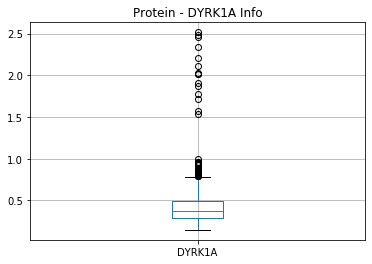

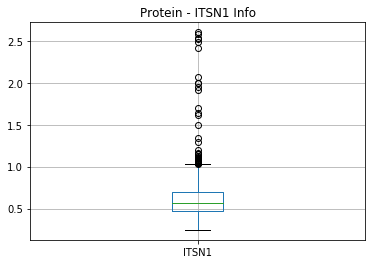

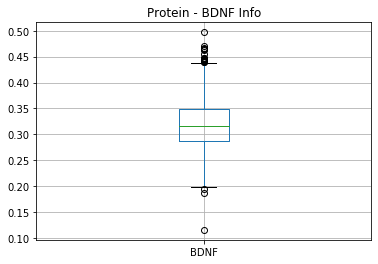

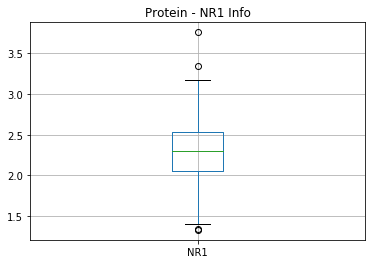

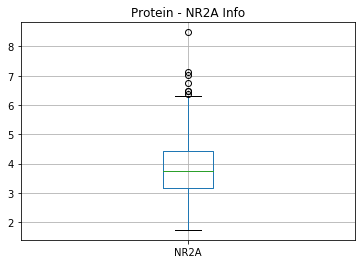

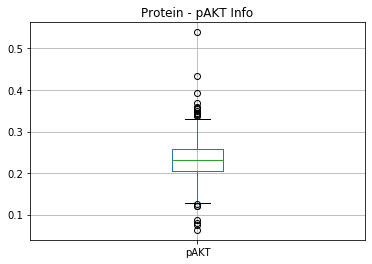

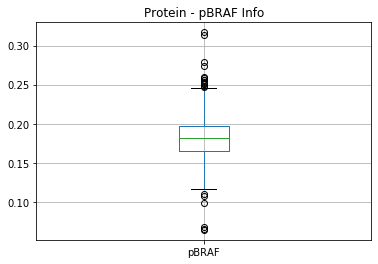

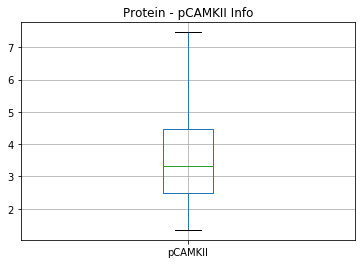

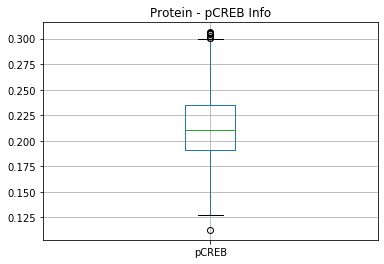

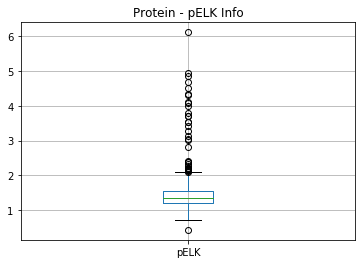

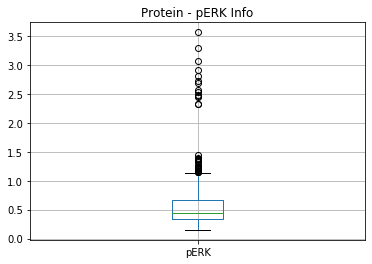

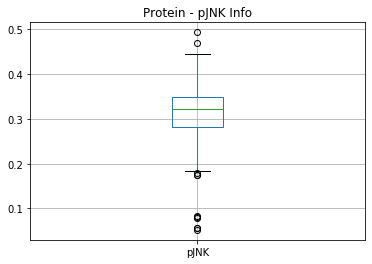

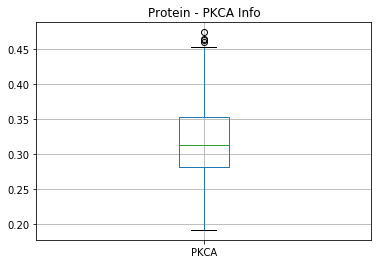

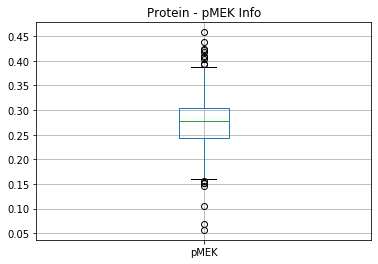

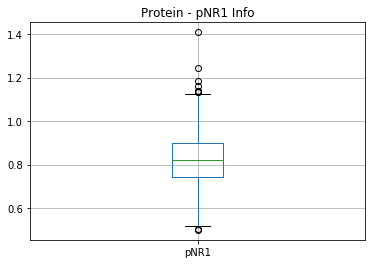

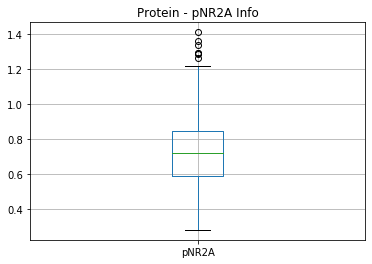

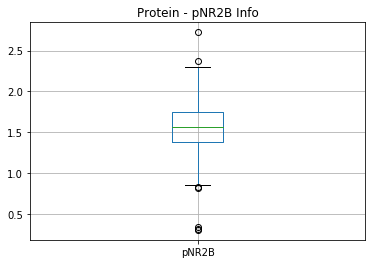

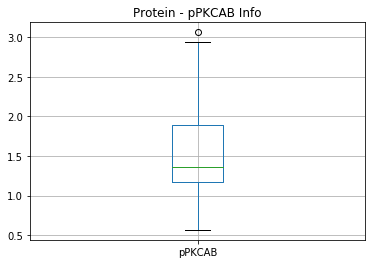

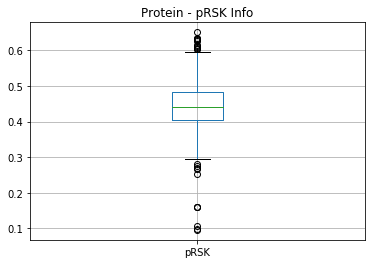

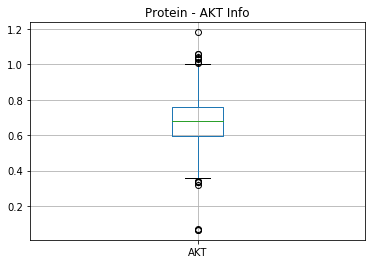

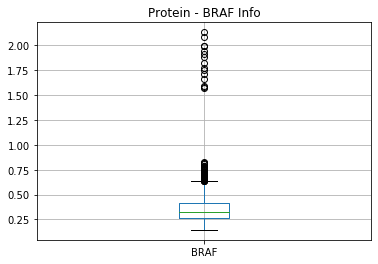

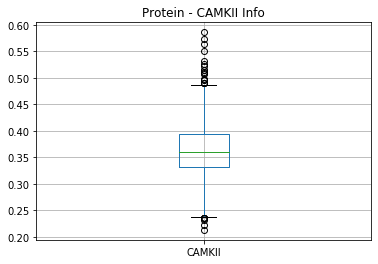

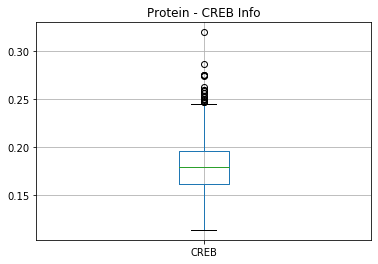

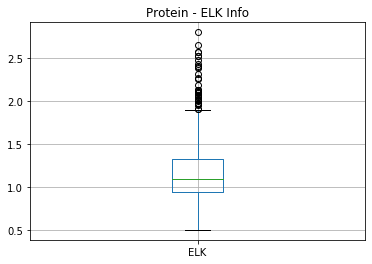

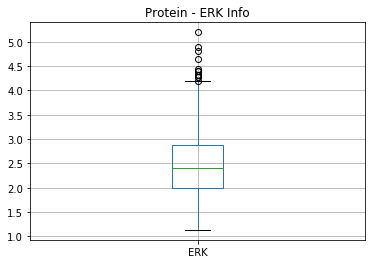

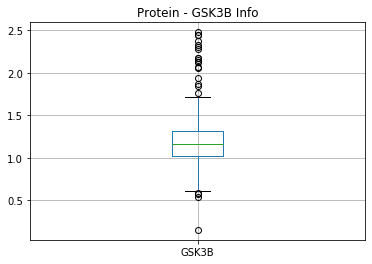

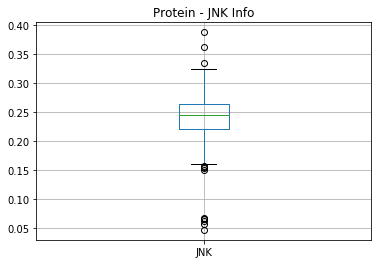

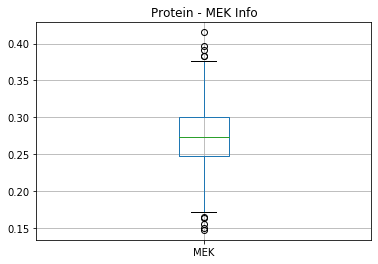

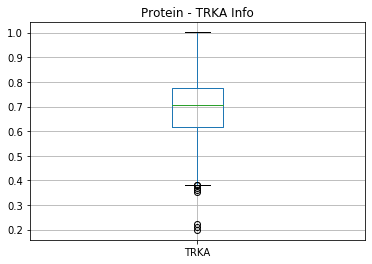

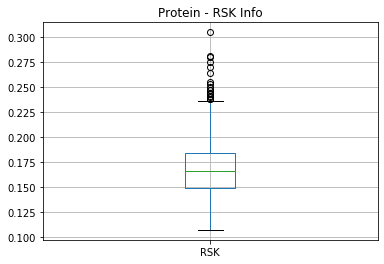

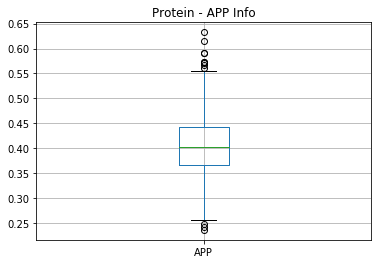

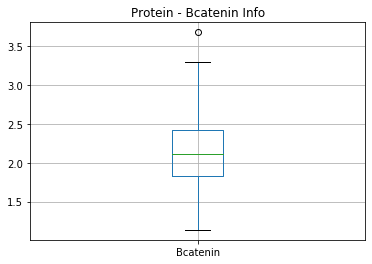

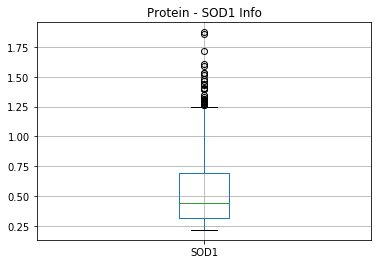

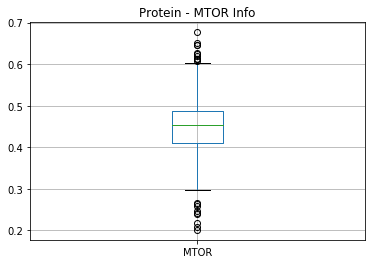

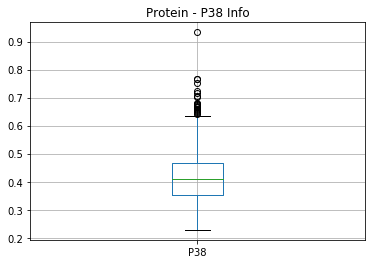

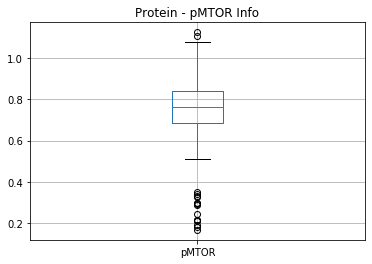

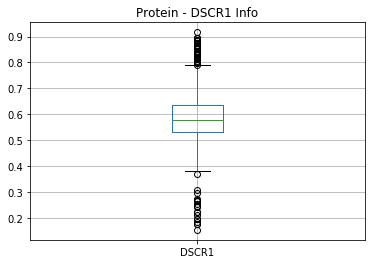

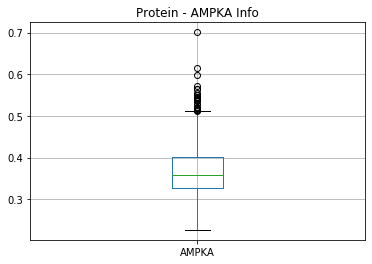

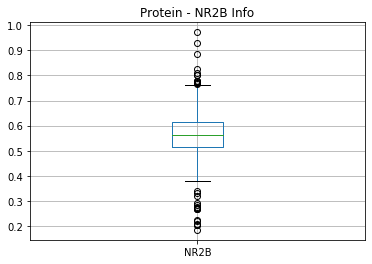

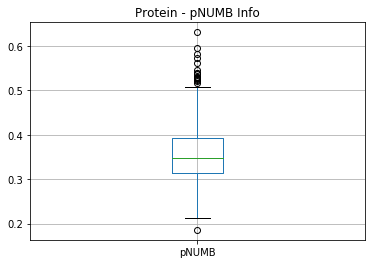

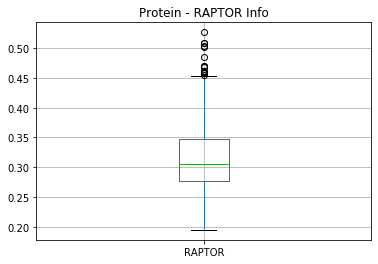

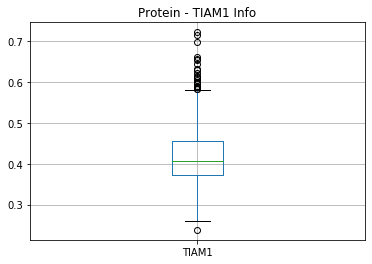

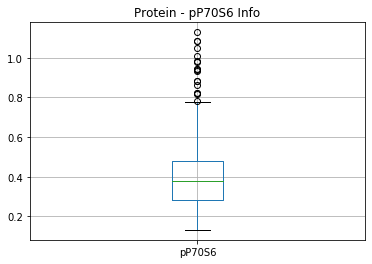

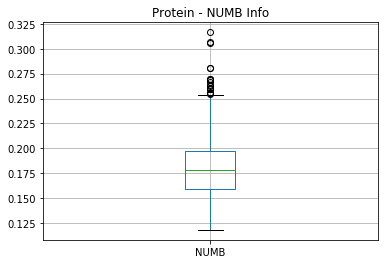

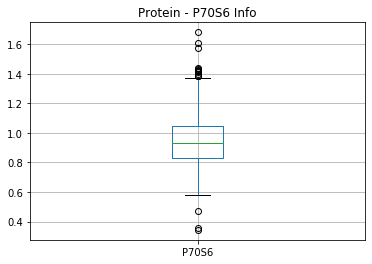

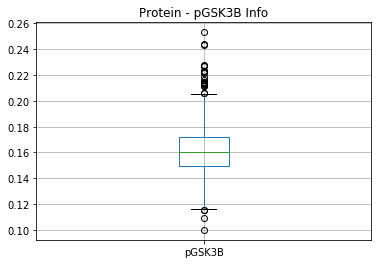

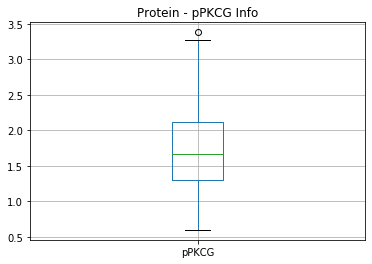

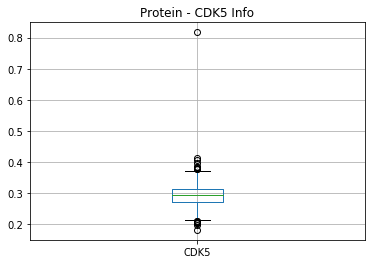

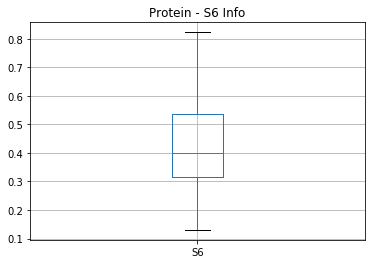

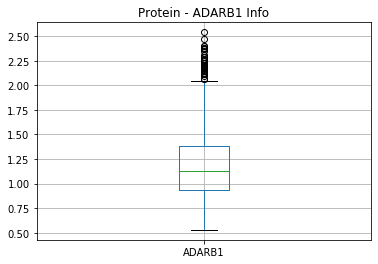

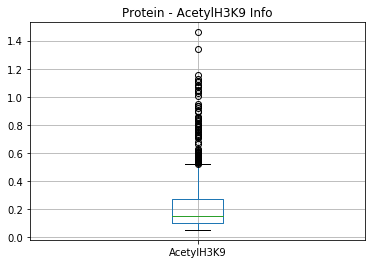

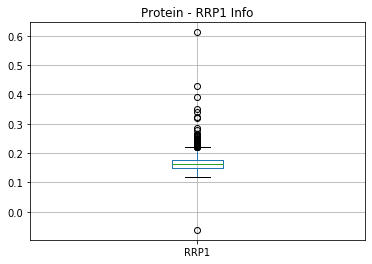

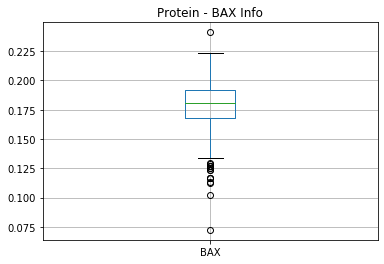

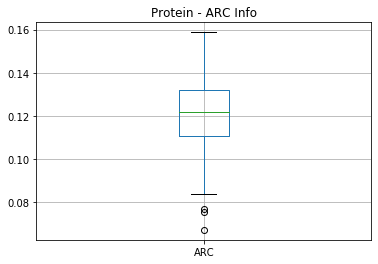

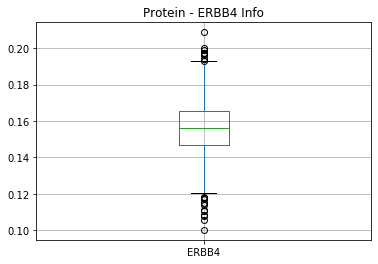

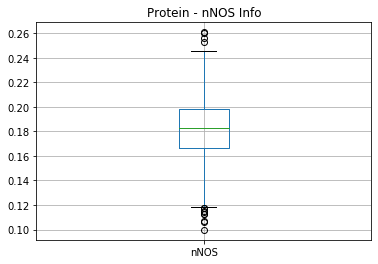

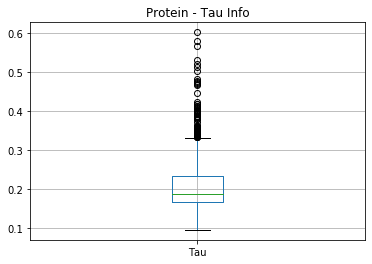

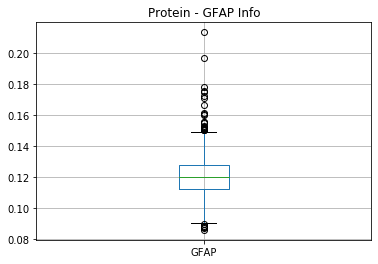

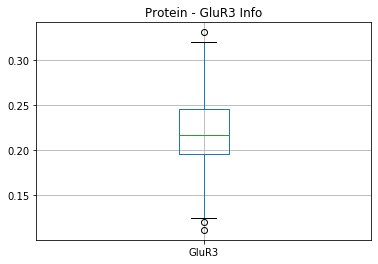

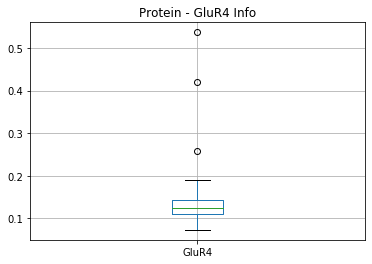

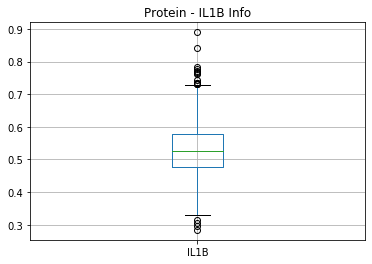

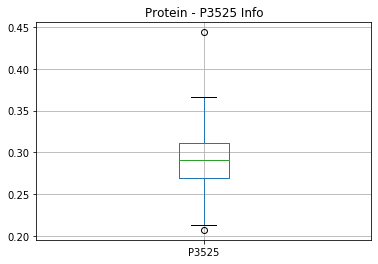

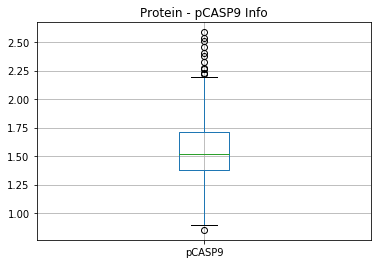

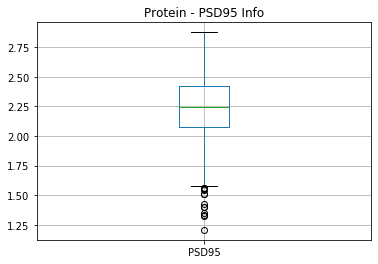

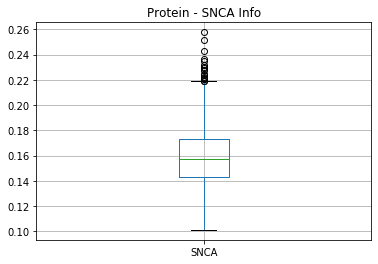

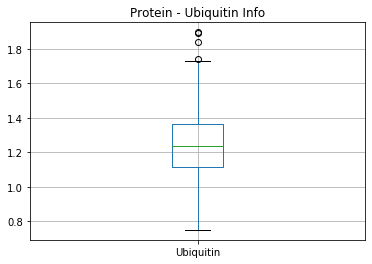

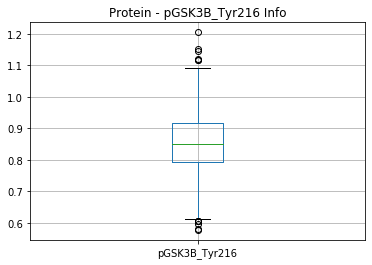

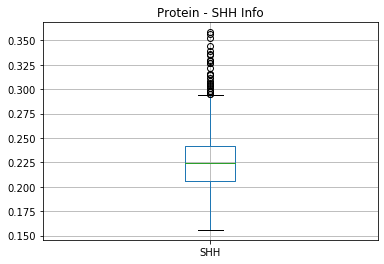

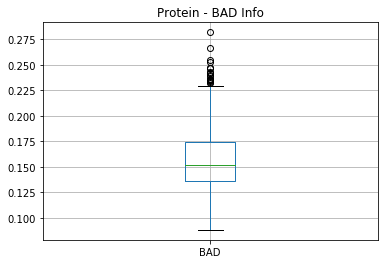

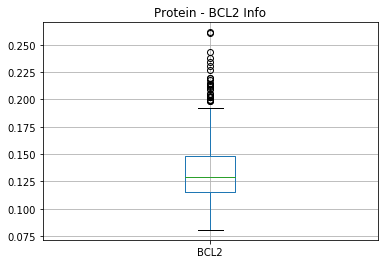

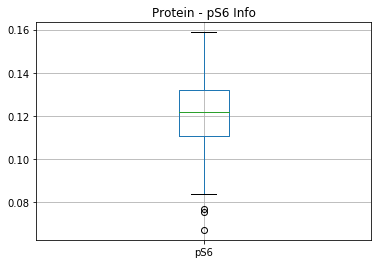

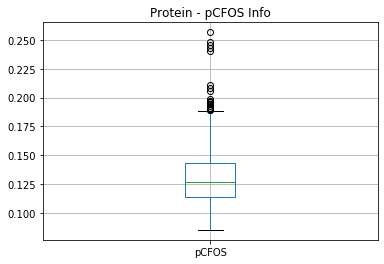

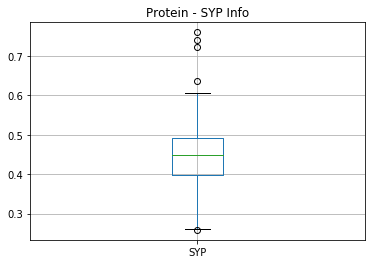

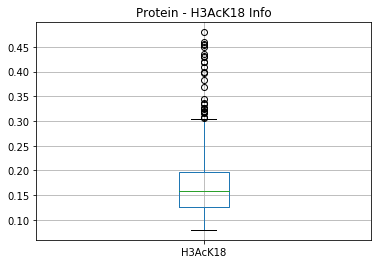

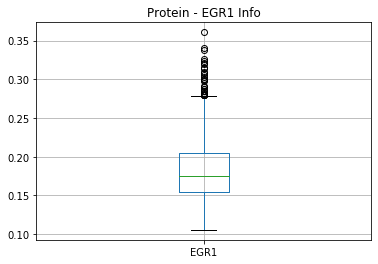

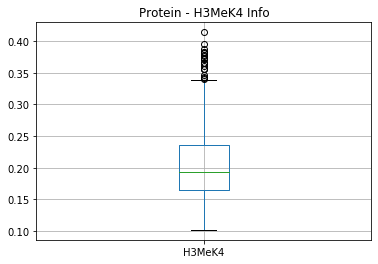

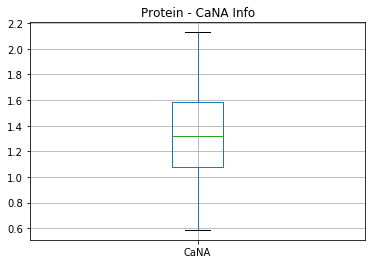

In [15]:
#boxplot of each column to check outliers
for col in df.loc[:,'DYRK1A':'CaNA']:
    df.boxplot(column=col)
    plt.title('Protein - ' + col + ' Info')
    plt.show()

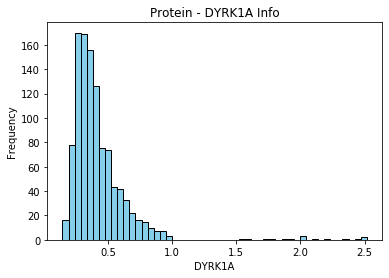

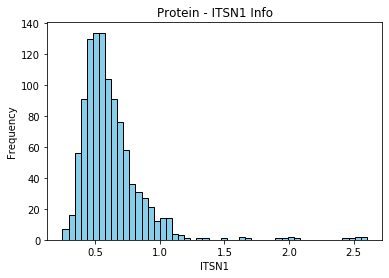

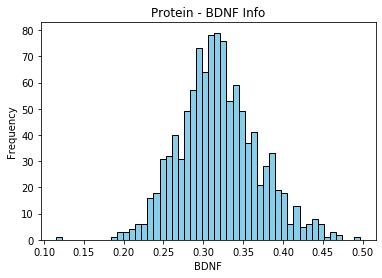

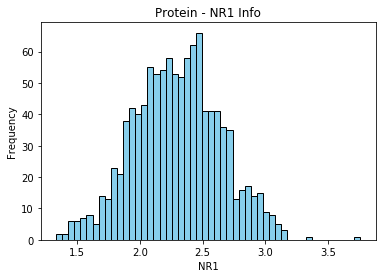

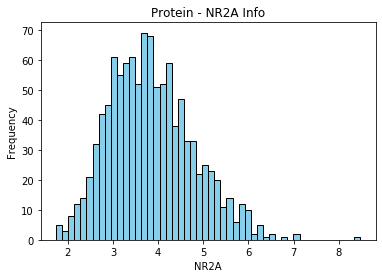

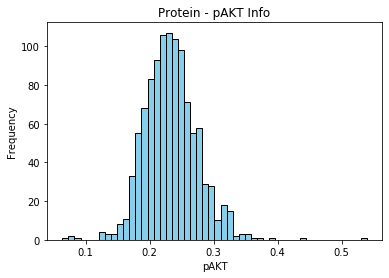

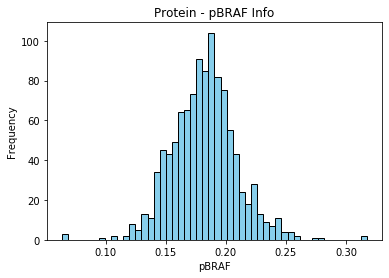

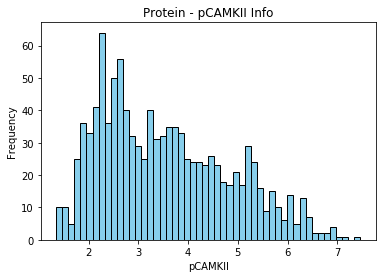

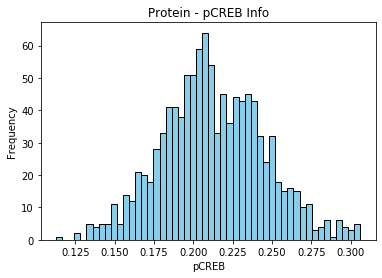

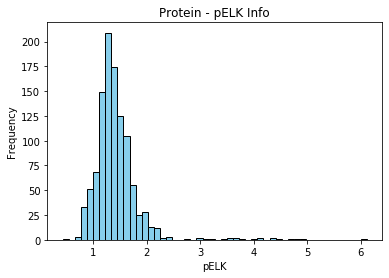

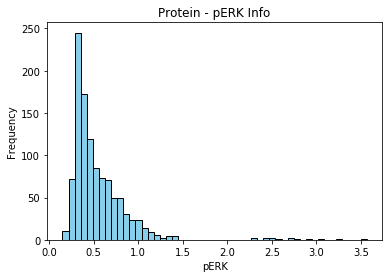

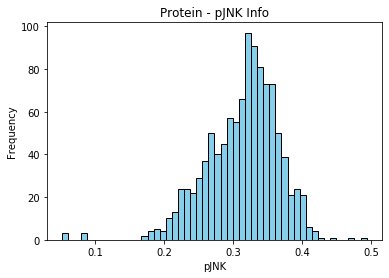

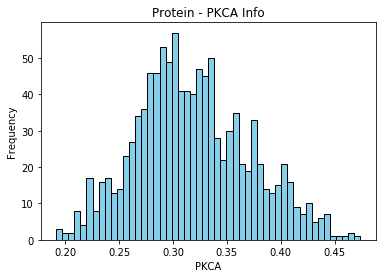

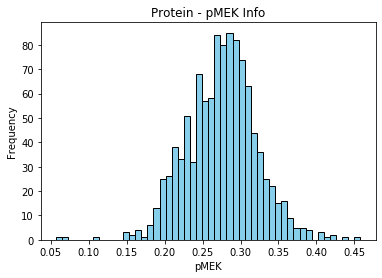

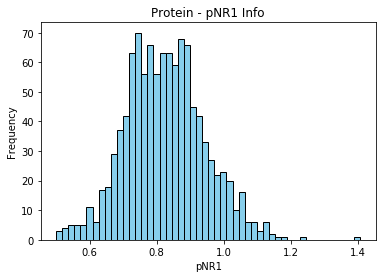

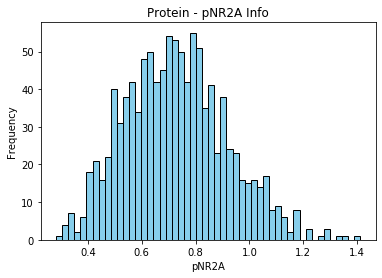

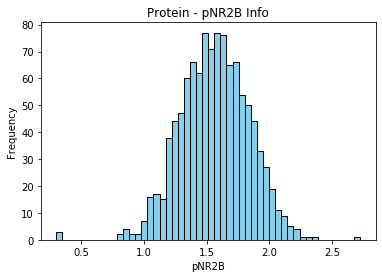

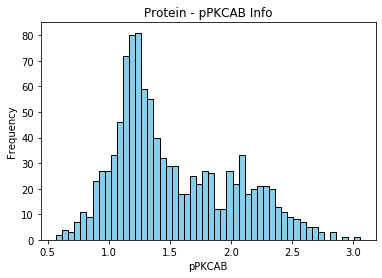

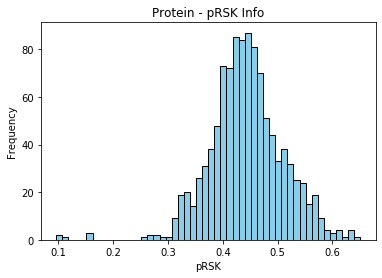

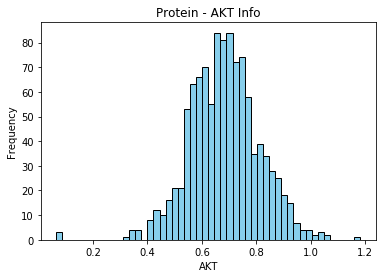

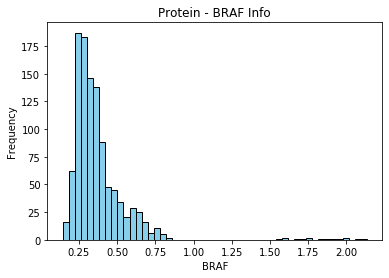

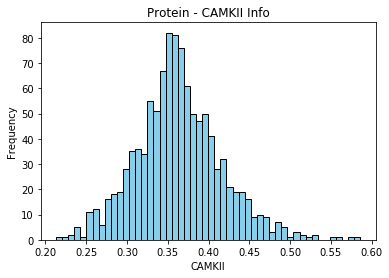

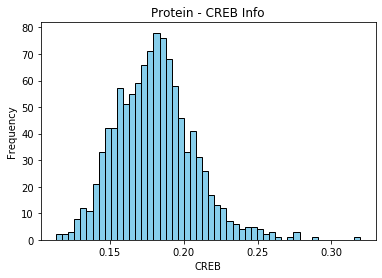

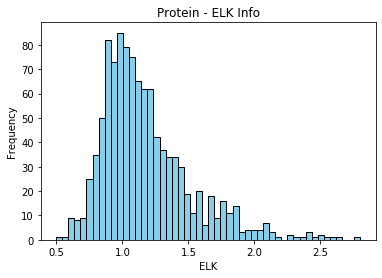

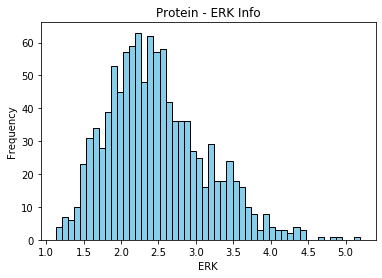

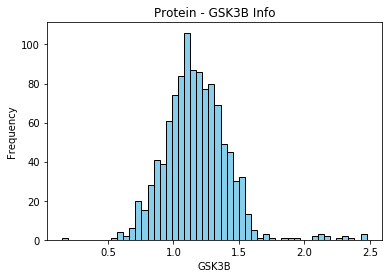

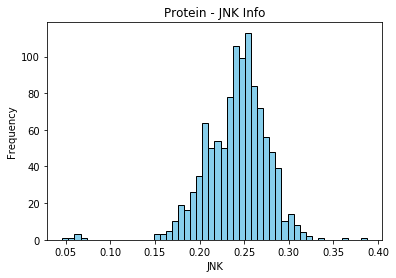

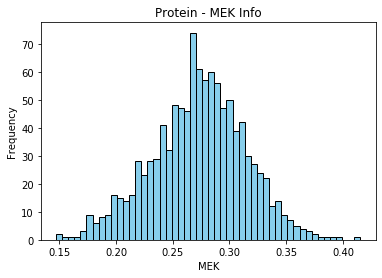

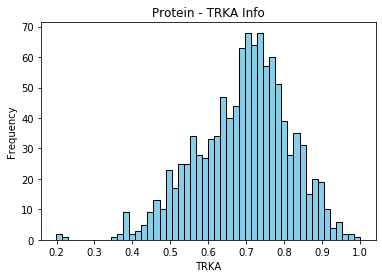

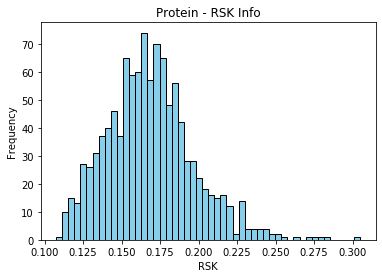

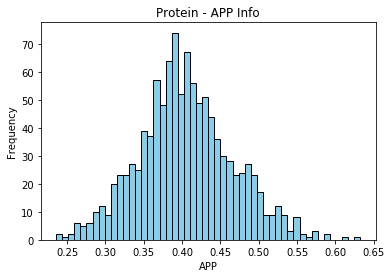

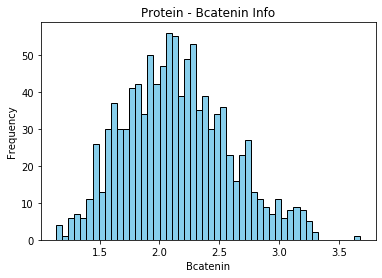

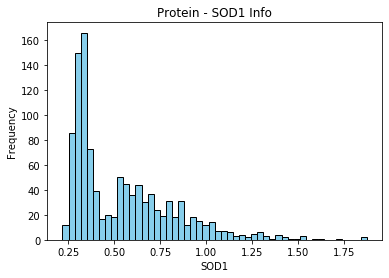

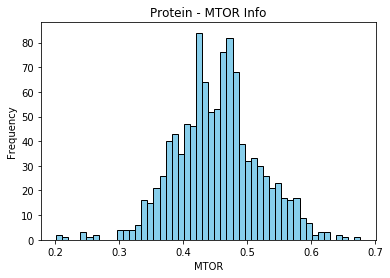

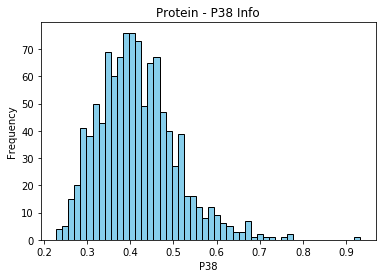

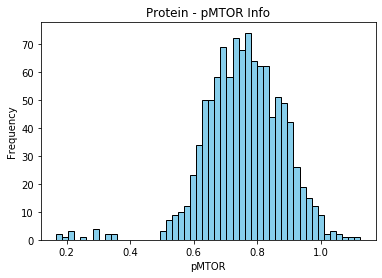

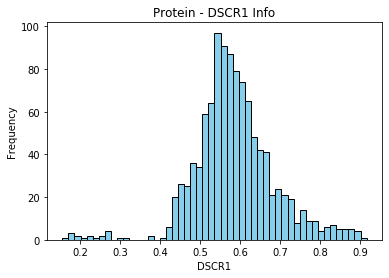

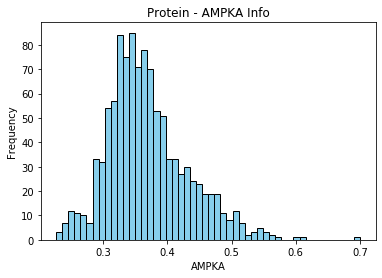

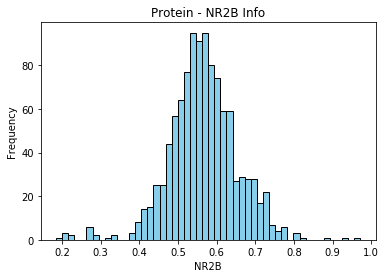

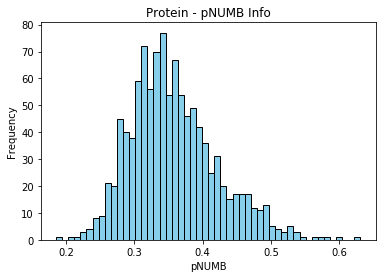

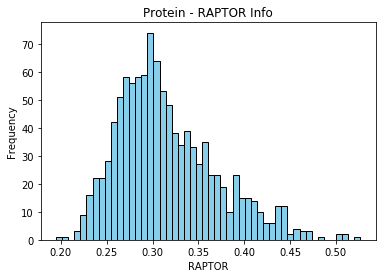

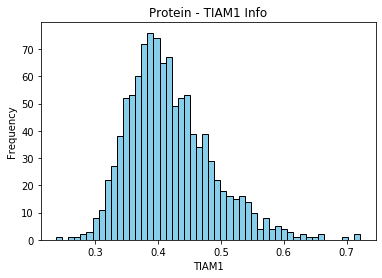

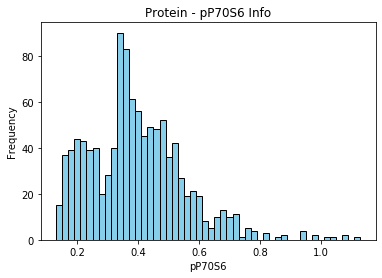

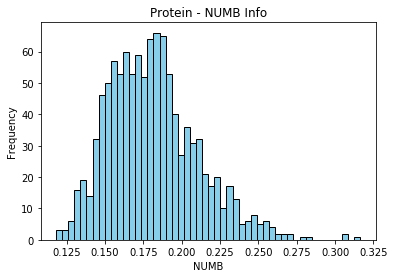

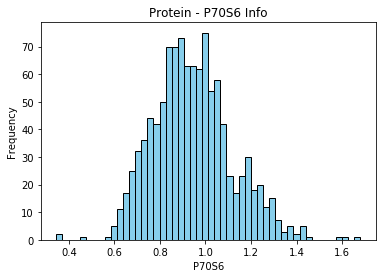

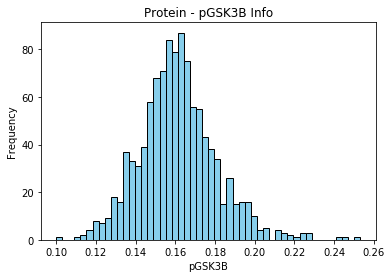

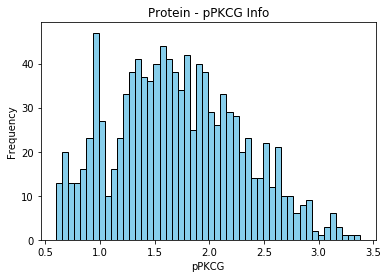

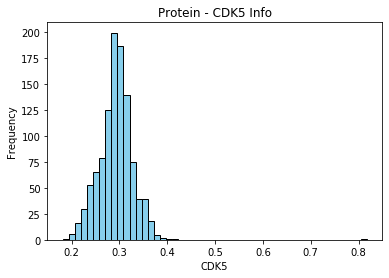

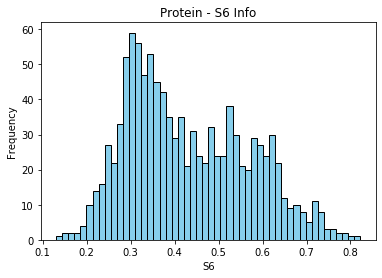

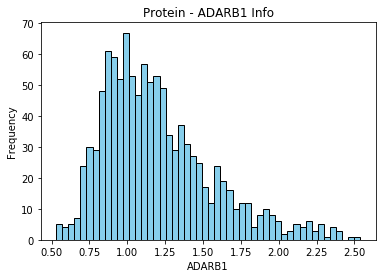

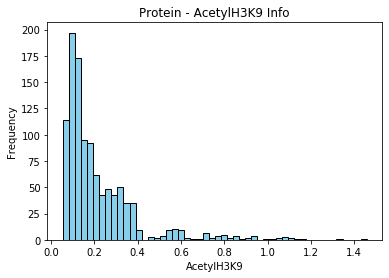

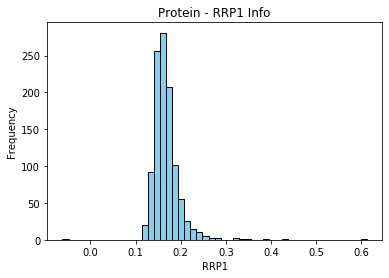

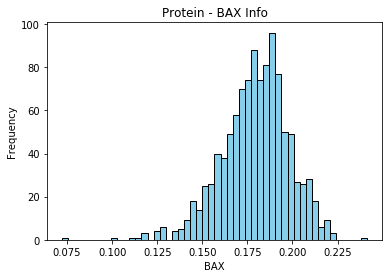

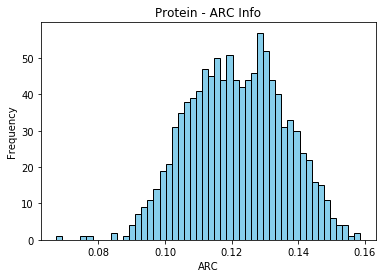

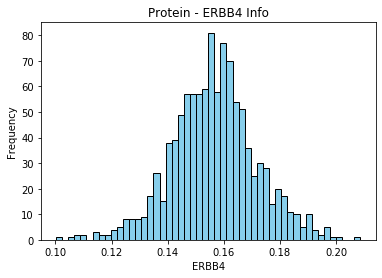

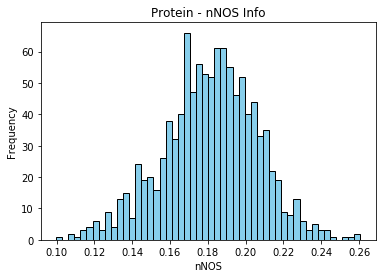

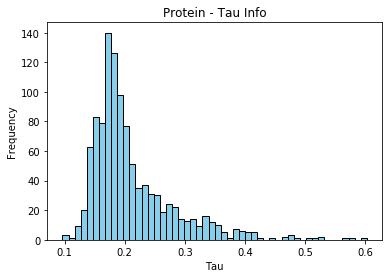

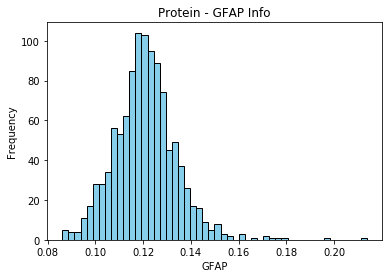

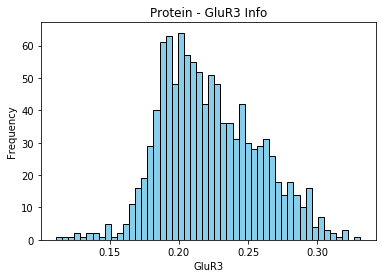

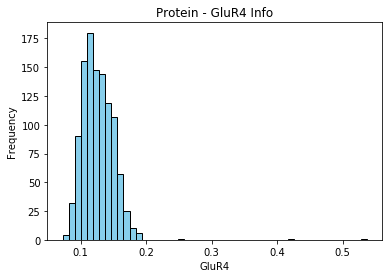

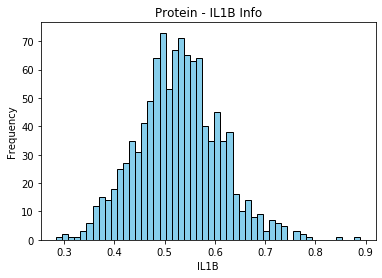

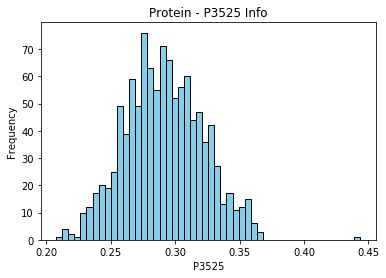

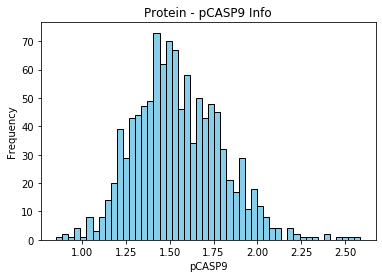

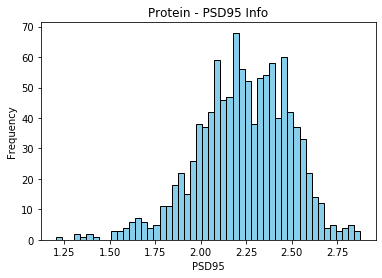

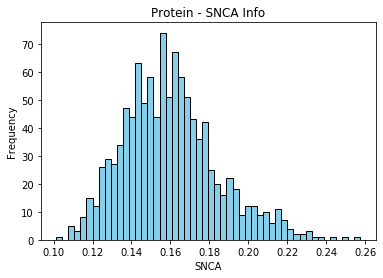

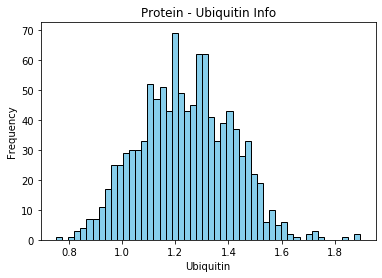

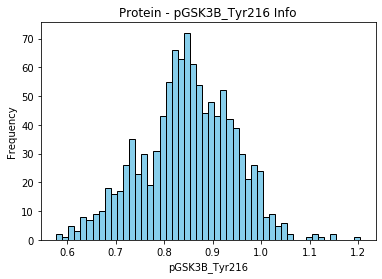

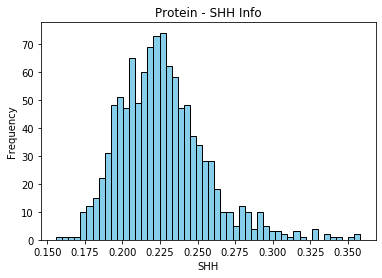

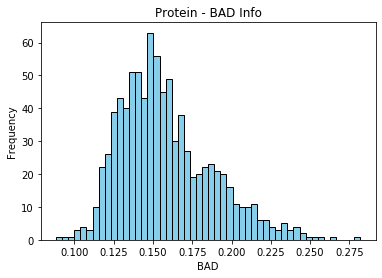

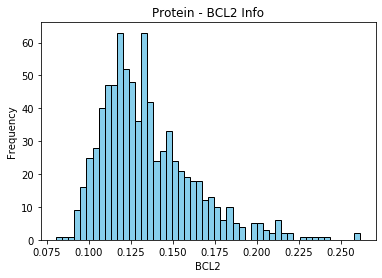

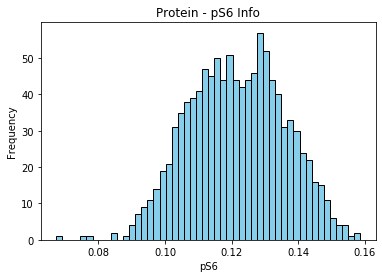

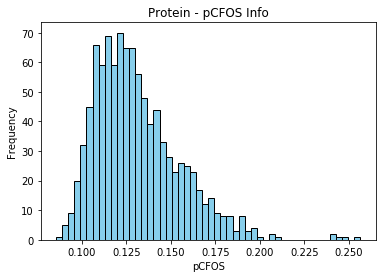

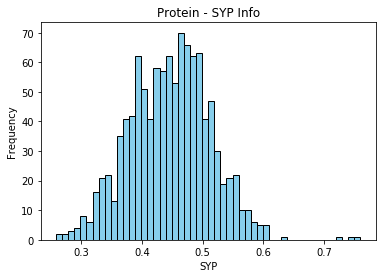

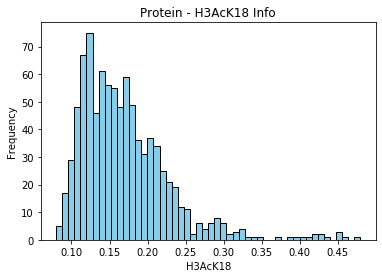

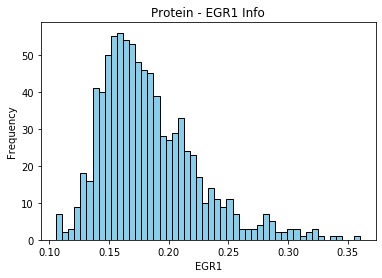

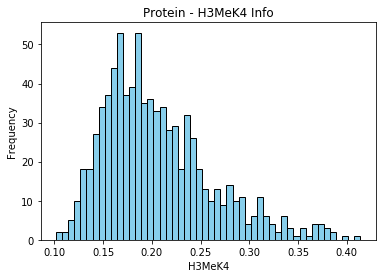

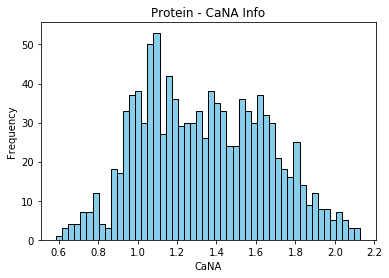

In [16]:
#check distribution of each column by histogram 
for col in df.loc[:,'DYRK1A':'CaNA']:
    df[col].plot(kind='hist',bins=50, color = "skyblue",ec="black")
    plt.title('Protein - ' + col + ' Info')
    plt.xlabel(col)
    plt.show()

In [17]:
#define a function to replace outliers by using capping
#use Tukey`s method to detect outliers
def replaceOutlierCap(data):
    for col in data:
        if data[col].dtypes == 'float64':
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3-Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            maskOut = ~data[col].between(lower, upper) 
            maskUp = data[col] > upper
            maskLow = data[col] < lower
            print('Outlier count in column '+ col + ' is:')
            print(maskUp.tolist().count(True) + maskLow.tolist().count(True))
            print('Index of upper outliers are:')
            print(data[col].index[maskUp == True].tolist())
            print('Index of lower outliers are:')
            print(data[col].index[maskLow == True].tolist())
            print()
            print('Replace outliers in column '+ col + ' by capping:')
            print('Outliers higher than upper bound are replaced to ' + str(upper) + ' :')
            data.loc[maskUp,col] = upper
            print('Outliers lower than lower bound are replaced to ' + str(lower) + ' :')
            data.loc[maskLow,col] = lower
            print()
            mask_up_after = data[col] > upper
            mask_low_after = data[col] < lower
            print('After replacement, upper outlier count in column '+ col + ' is:')
            print(mask_up_after.tolist().count(True))
            print('After replacement, lower outlier count in column '+ col + ' is:')
            print(mask_low_after.tolist().count(True))            
            print('---------------------------------------------------------------------------------------------------------------')


In [18]:
#replace outliers by using capping
replaceOutlierCap(df)

Outlier count in column DYRK1A is:
48
Index of upper outliers are:
[360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 570, 571, 572, 574, 575, 615, 616, 617, 619, 630, 631, 632, 633, 635, 645, 646, 647, 648, 649, 650, 651, 690, 691, 782, 885, 886, 887, 888, 889, 890, 891, 892, 893]
Index of lower outliers are:
[]

Replace outliers in column DYRK1A by capping:
Outliers higher than upper bound are replaced to 0.7870972300000001 :
Outliers lower than lower bound are replaced to -0.011265018000000016 :

After replacement, upper outlier count in column DYRK1A is:
0
After replacement, lower outlier count in column DYRK1A is:
0
---------------------------------------------------------------------------------------------------------------
Outlier count in column ITSN1 is:
44
Index of upper outliers are:
[136, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 571, 572, 615, 617, 630, 631, 632, 645, 646, 647, 648, 649, 650, 651, 660, 661, 66

After replacement, lower outlier count in column pNR1 is:
0
---------------------------------------------------------------------------------------------------------------
Outlier count in column pNR2A is:
7
Index of upper outliers are:
[165, 166, 167, 168, 169, 170, 302]
Index of lower outliers are:
[]

Replace outliers in column pNR2A by capping:
Outliers higher than upper bound are replaced to 1.236145782 :
Outliers lower than lower bound are replaced to 0.2027970300000001 :

After replacement, upper outlier count in column pNR2A is:
0
After replacement, lower outlier count in column pNR2A is:
0
---------------------------------------------------------------------------------------------------------------
Outlier count in column pNR2B is:
7
Index of upper outliers are:
[375, 378]
Index of lower outliers are:
[429, 430, 431, 957, 958]

Replace outliers in column pNR2B by capping:
Outliers higher than upper bound are replaced to 2.2994130735 :
Outliers lower than lower bound are repla

Outlier count in column Bcatenin is:
1
Index of upper outliers are:
[375]
Index of lower outliers are:
[]

Replace outliers in column Bcatenin by capping:
Outliers higher than upper bound are replaced to 3.3196266999999997 :
Outliers lower than lower bound are replaced to 0.9309544620000001 :

After replacement, upper outlier count in column Bcatenin is:
0
After replacement, lower outlier count in column Bcatenin is:
0
---------------------------------------------------------------------------------------------------------------
Outlier count in column SOD1 is:
30
Index of upper outliers are:
[480, 481, 482, 495, 496, 497, 511, 512, 705, 706, 707, 720, 721, 722, 723, 724, 725, 726, 727, 728, 732, 733, 945, 946, 947, 949, 950, 1065, 1066, 1067]
Index of lower outliers are:
[]

Replace outliers in column SOD1 by capping:
Outliers higher than upper bound are replaced to 1.2599845409999997 :
Outliers lower than lower bound are replaced to -0.24456825899999984 :

After replacement, upper ou

Outlier count in column CDK5 is:
20
Index of upper outliers are:
[358, 390, 391, 392, 393, 394, 395, 396, 915, 918]
Index of lower outliers are:
[223, 268, 447, 552, 627, 628, 629, 642, 643, 743]

Replace outliers in column CDK5 by capping:
Outliers higher than upper bound are replaced to 0.37231983975000005 :
Outliers lower than lower bound are replaced to 0.21275841974999987 :

After replacement, upper outlier count in column CDK5 is:
0
After replacement, lower outlier count in column CDK5 is:
0
---------------------------------------------------------------------------------------------------------------
Outlier count in column S6 is:
0
Index of upper outliers are:
[]
Index of lower outliers are:
[]

Replace outliers in column S6 by capping:
Outliers higher than upper bound are replaced to 0.8621765036249999 :
Outliers lower than lower bound are replaced to -0.010611827374999883 :

After replacement, upper outlier count in column S6 is:
0
After replacement, lower outlier count in co


After replacement, upper outlier count in column PSD95 is:
0
After replacement, lower outlier count in column PSD95 is:
0
---------------------------------------------------------------------------------------------------------------
Outlier count in column SNCA is:
18
Index of upper outliers are:
[164, 178, 179, 220, 221, 222, 223, 224, 253, 254, 446, 448, 449, 733, 748, 794, 852, 854]
Index of lower outliers are:
[]

Replace outliers in column SNCA by capping:
Outliers higher than upper bound are replaced to 0.2189993175 :
Outliers lower than lower bound are replaced to 0.09714173149999995 :

After replacement, upper outlier count in column SNCA is:
0
After replacement, lower outlier count in column SNCA is:
0
---------------------------------------------------------------------------------------------------------------
Outlier count in column Ubiquitin is:
4
Index of upper outliers are:
[220, 759, 760, 761]
Index of lower outliers are:
[]

Replace outliers in column Ubiquitin by ca

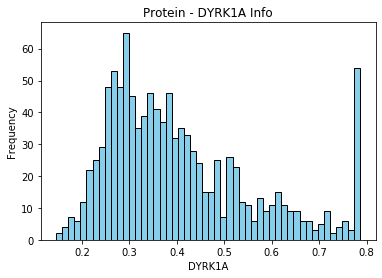

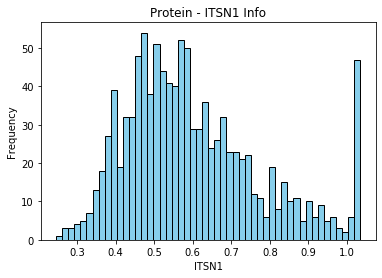

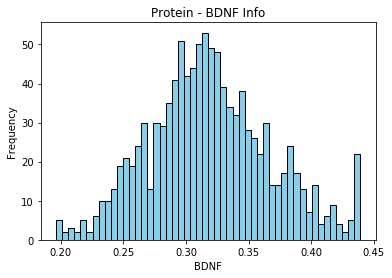

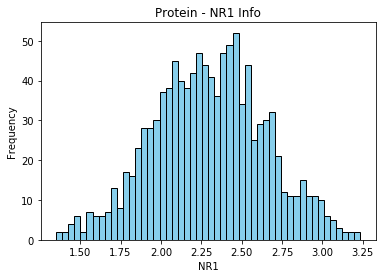

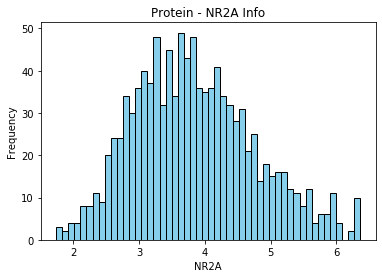

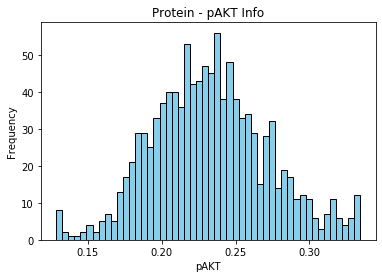

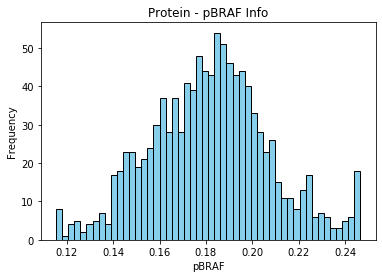

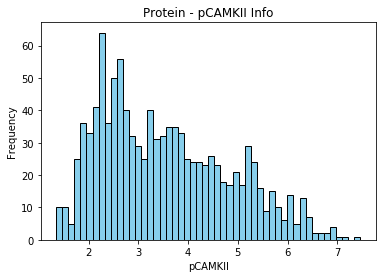

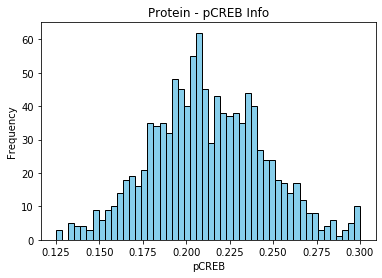

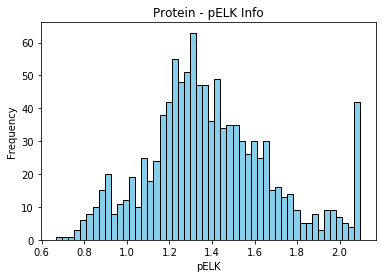

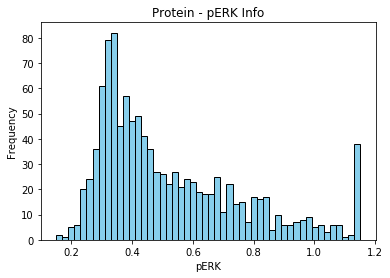

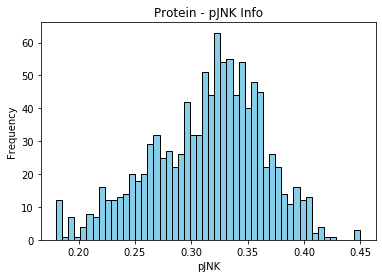

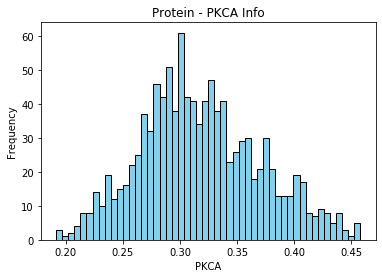

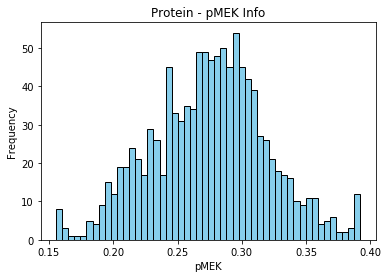

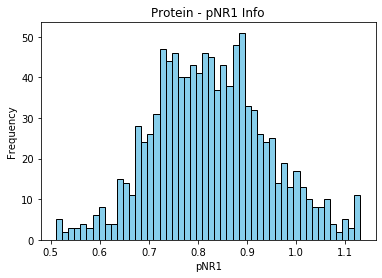

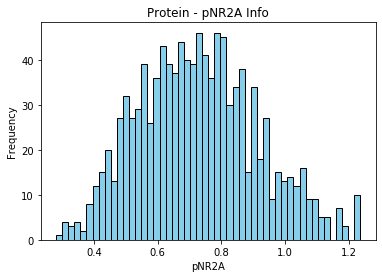

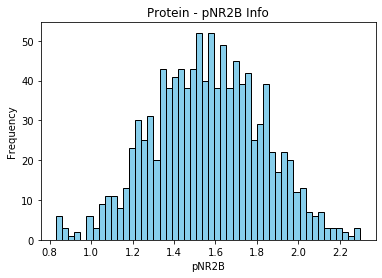

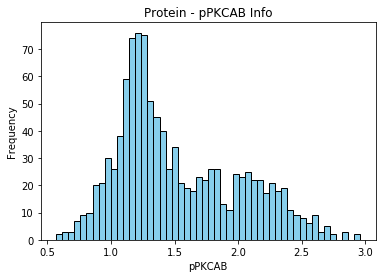

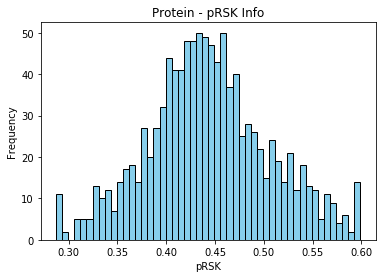

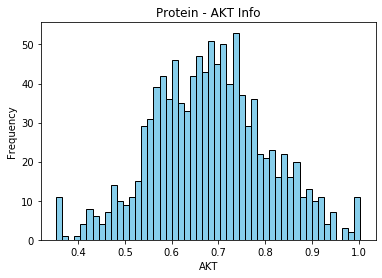

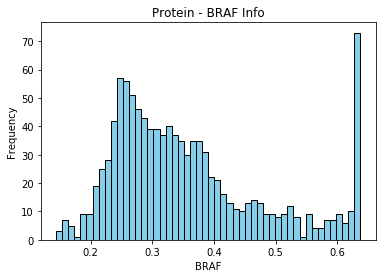

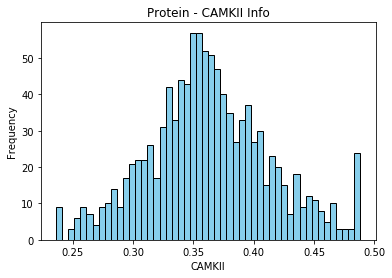

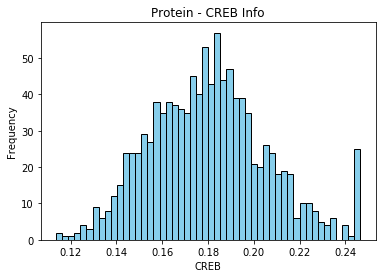

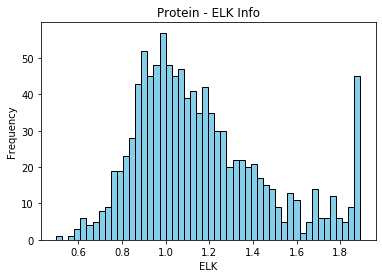

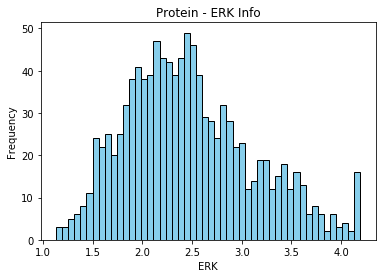

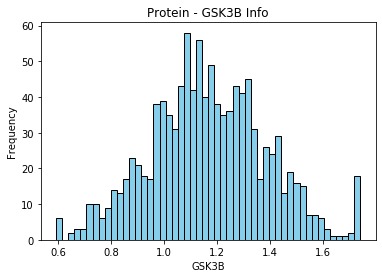

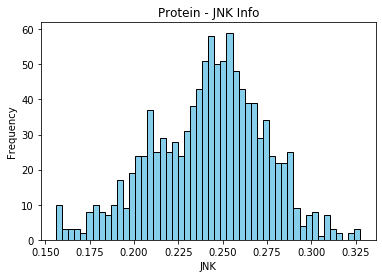

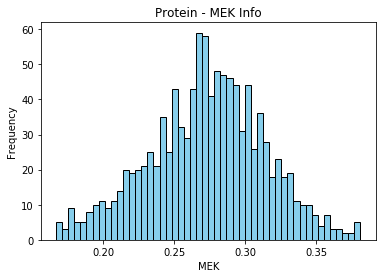

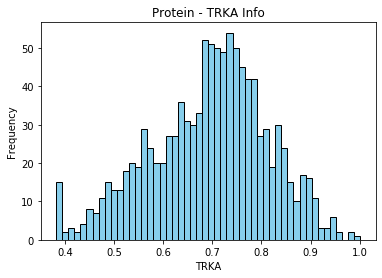

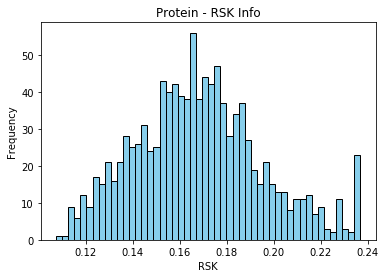

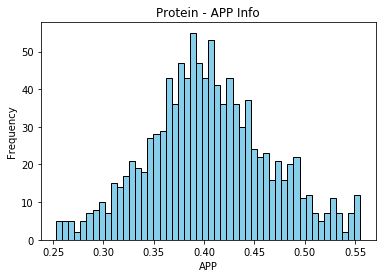

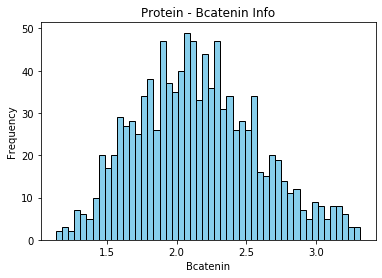

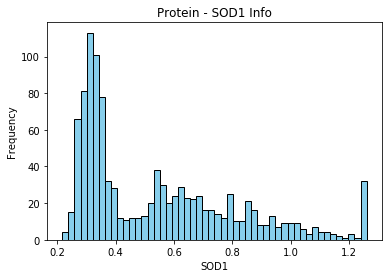

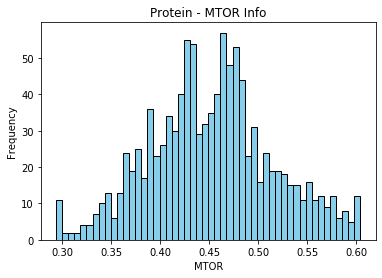

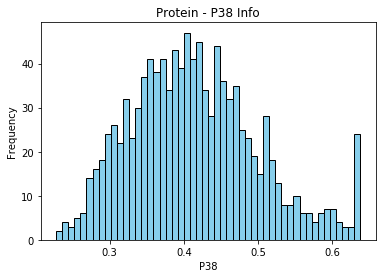

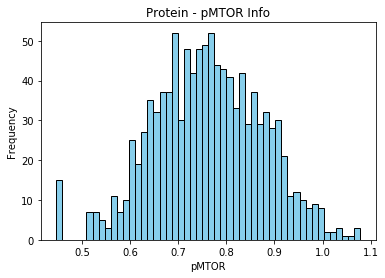

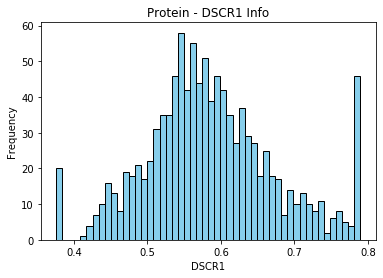

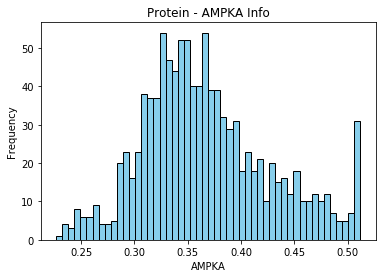

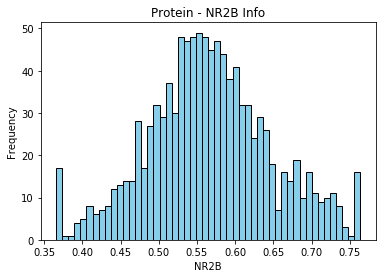

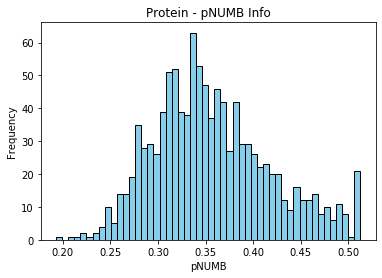

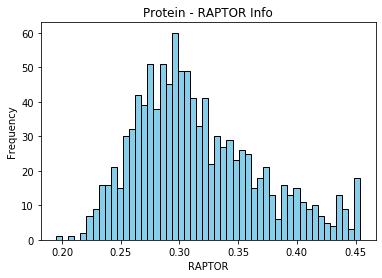

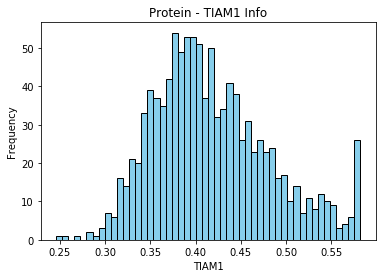

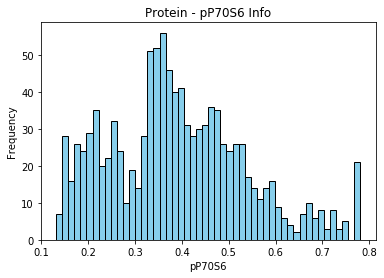

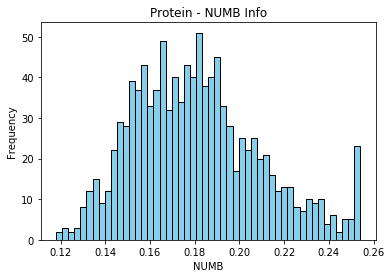

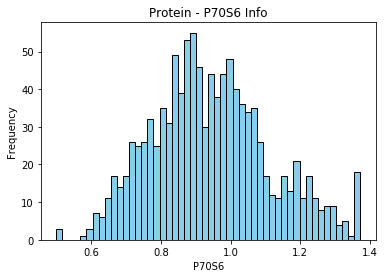

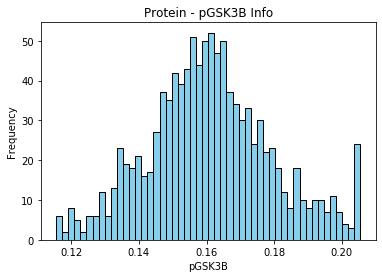

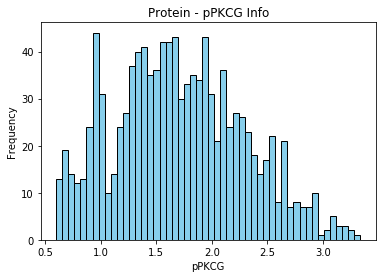

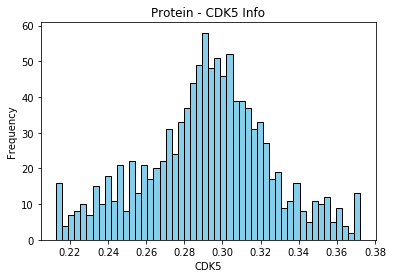

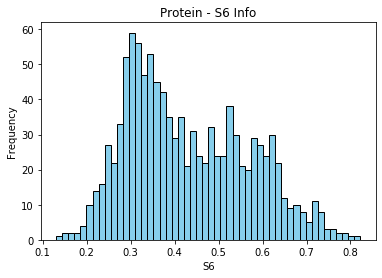

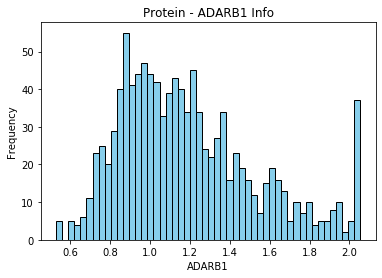

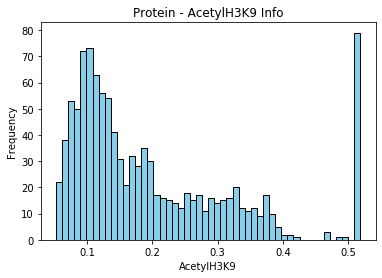

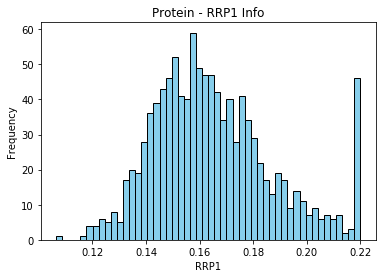

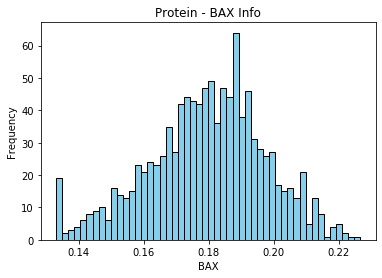

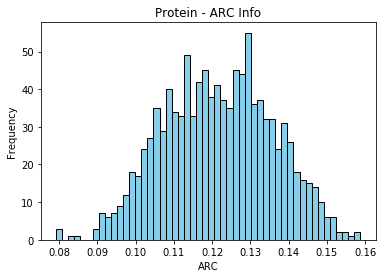

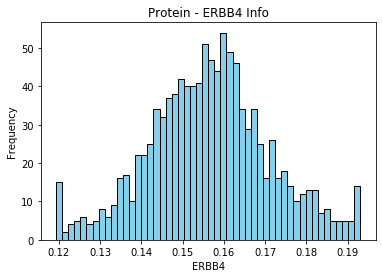

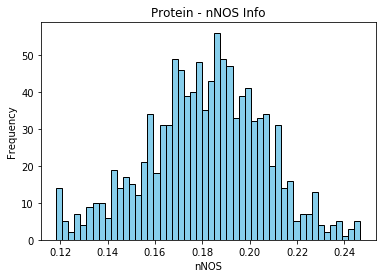

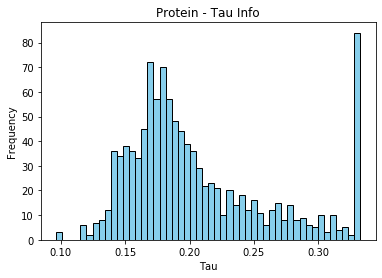

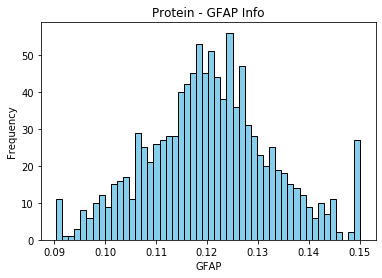

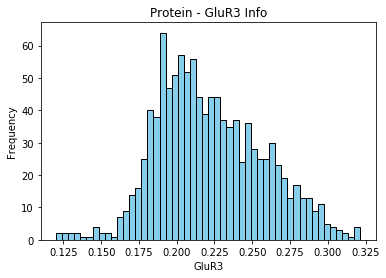

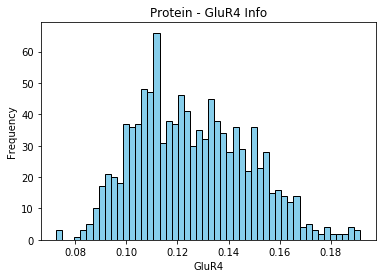

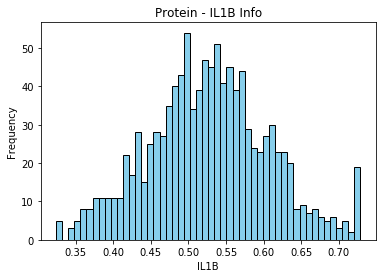

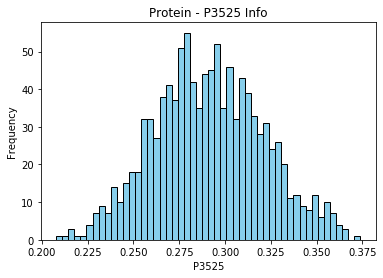

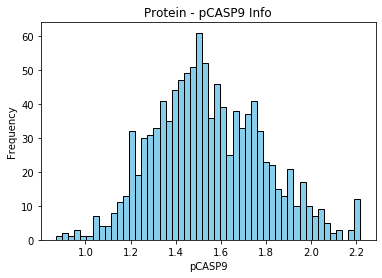

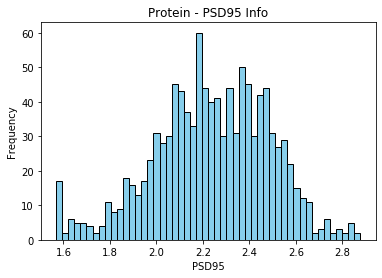

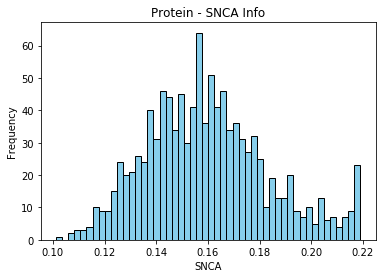

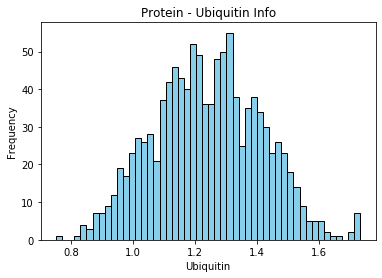

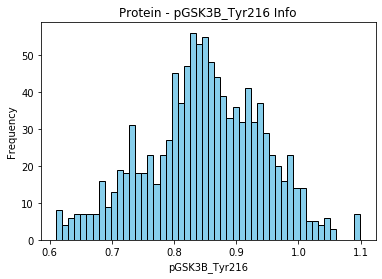

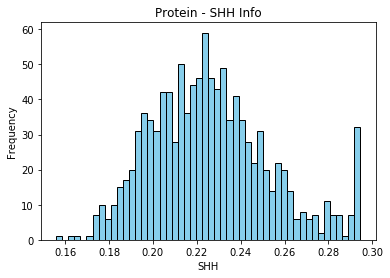

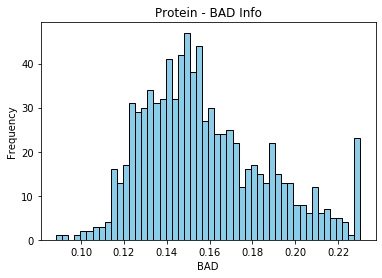

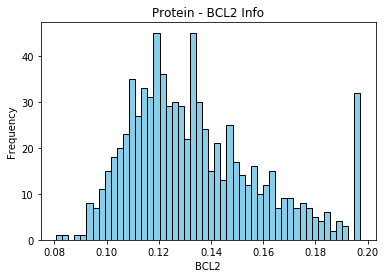

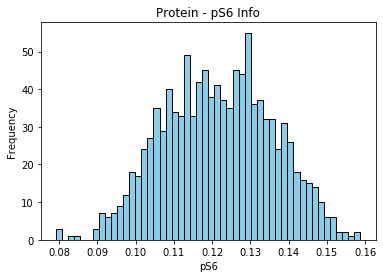

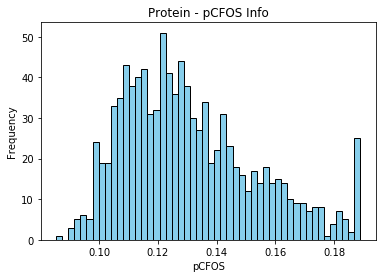

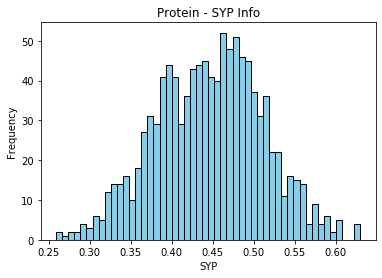

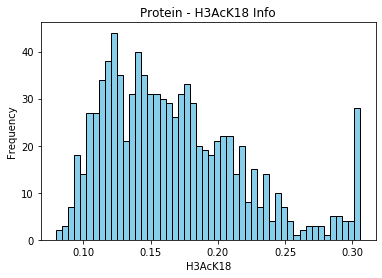

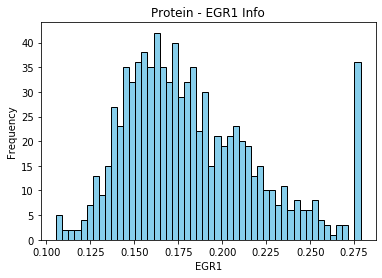

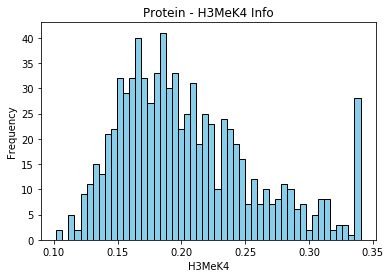

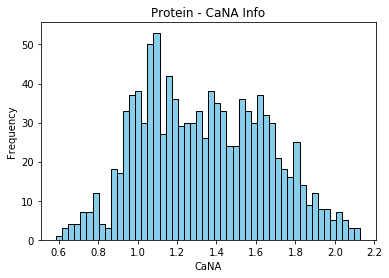

In [19]:
#check distribution of each column after replaced outliers
for col in df.loc[:,'DYRK1A':'CaNA']:
    df[col].plot(kind='hist',bins=50, color = "skyblue",ec="black")
    plt.title('Protein - ' + col + ' Info')
    plt.xlabel(col)
    plt.show()

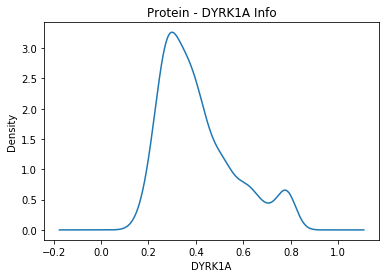

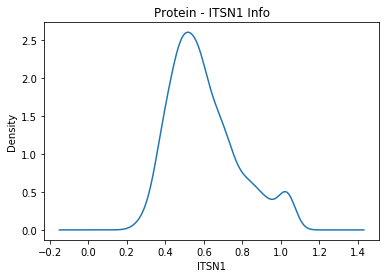

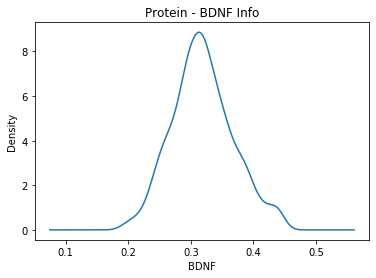

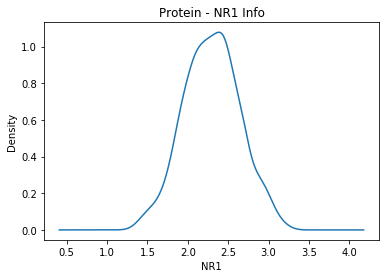

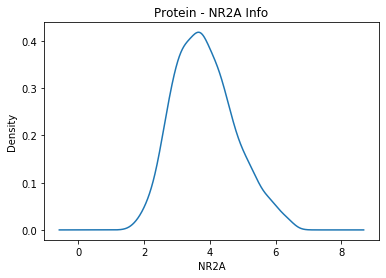

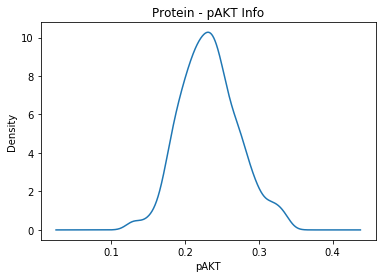

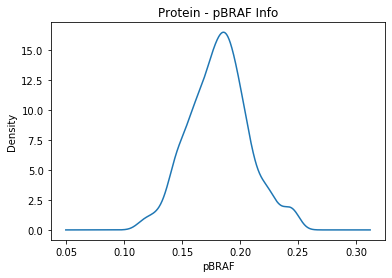

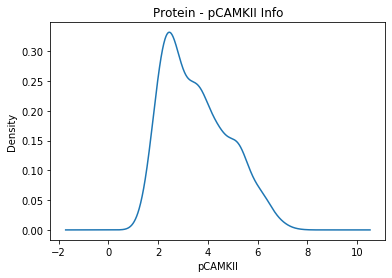

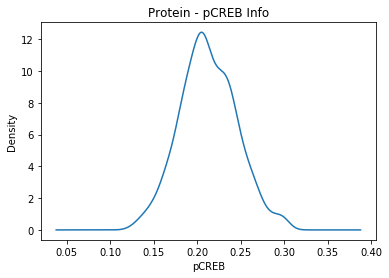

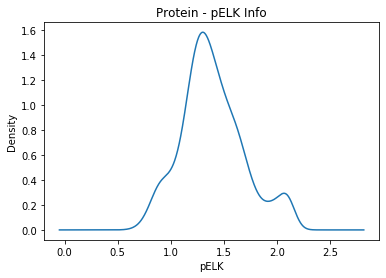

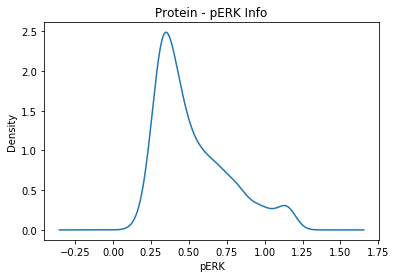

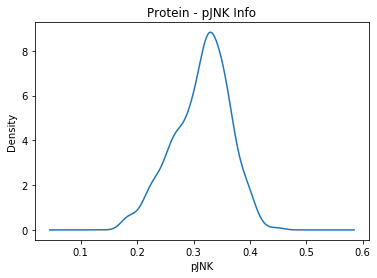

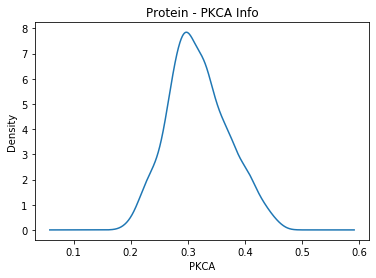

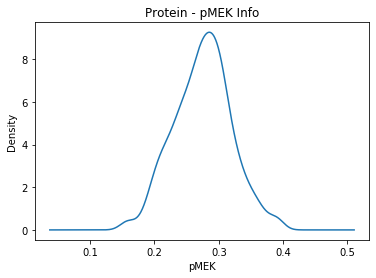

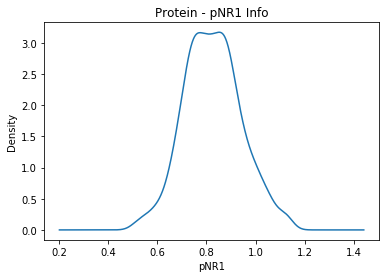

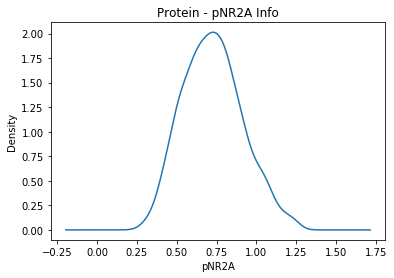

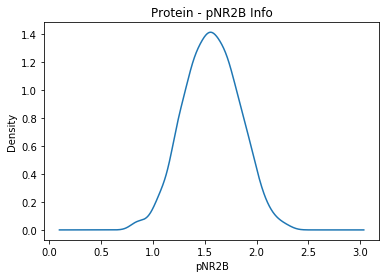

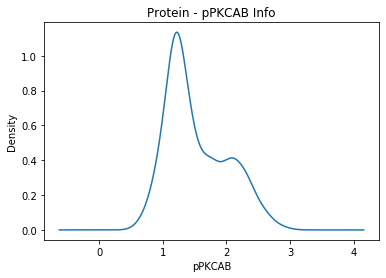

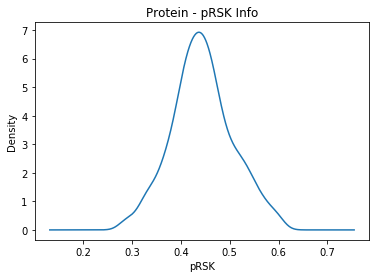

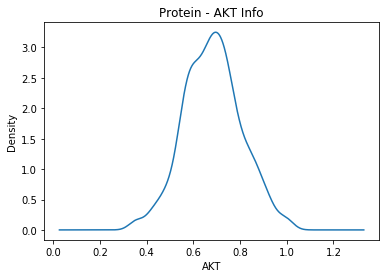

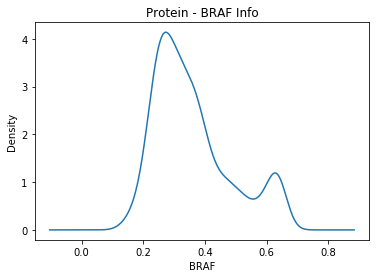

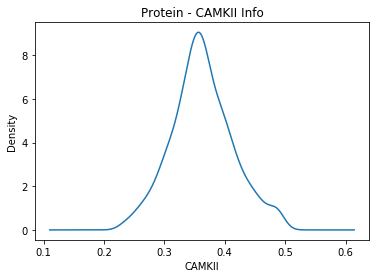

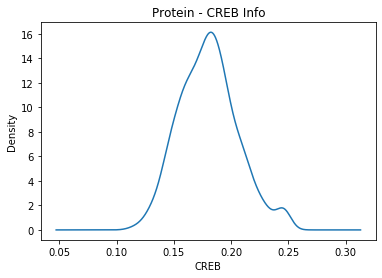

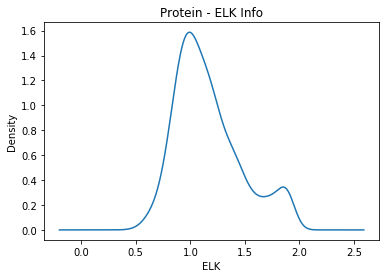

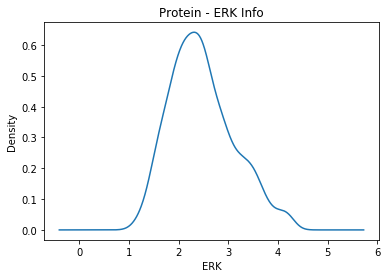

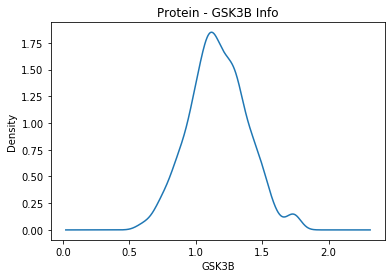

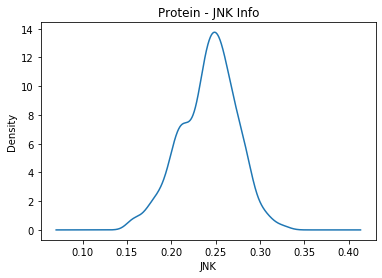

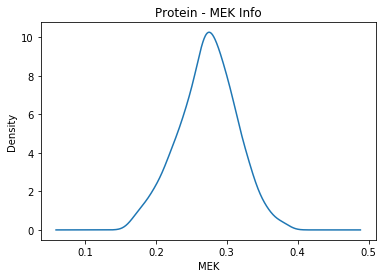

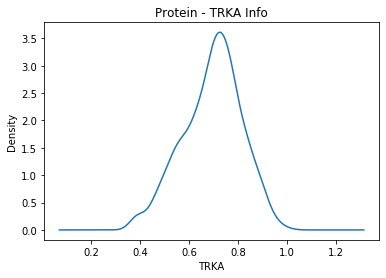

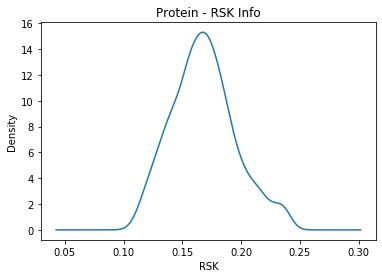

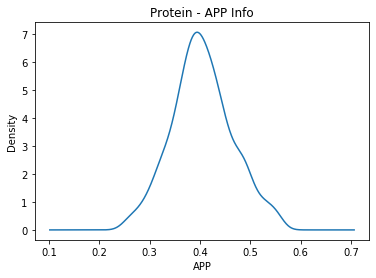

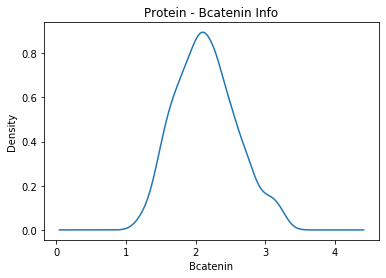

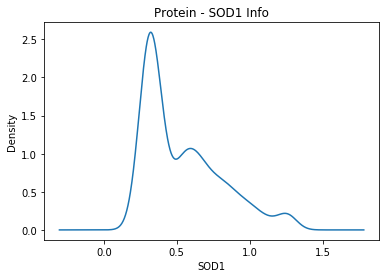

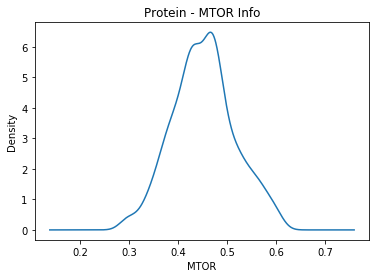

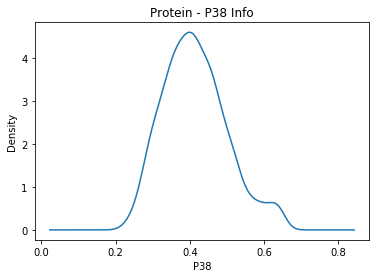

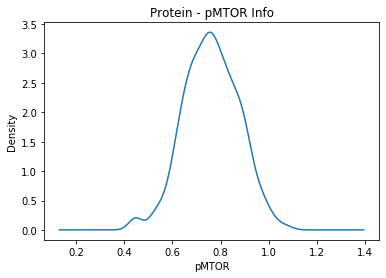

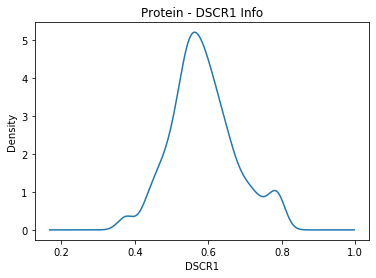

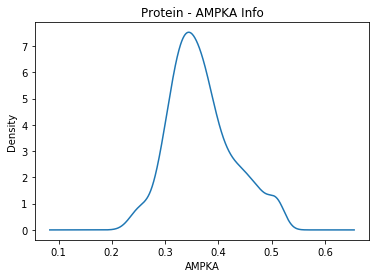

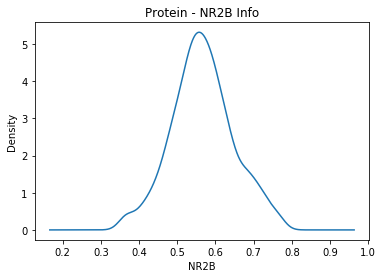

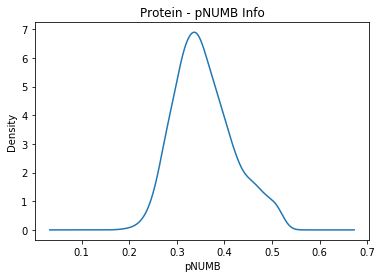

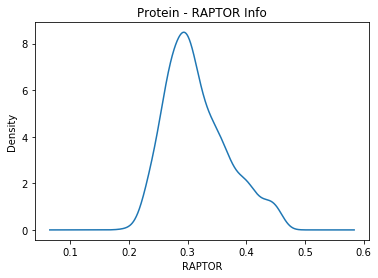

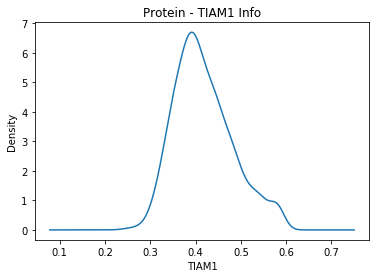

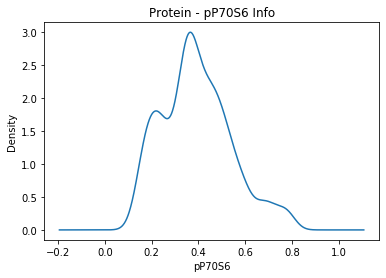

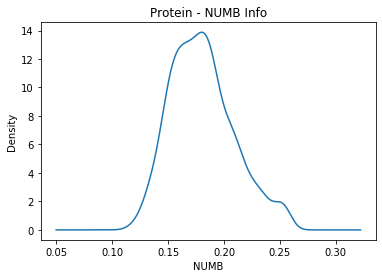

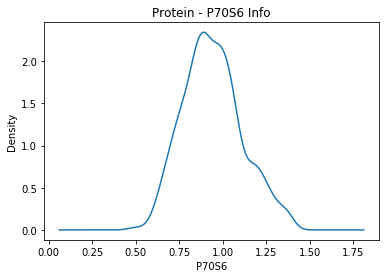

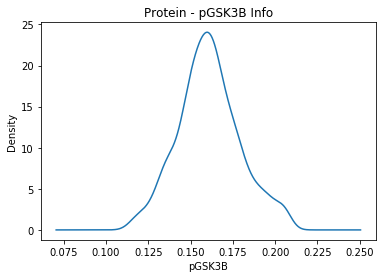

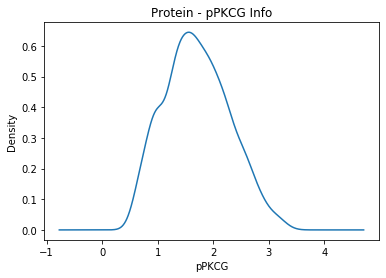

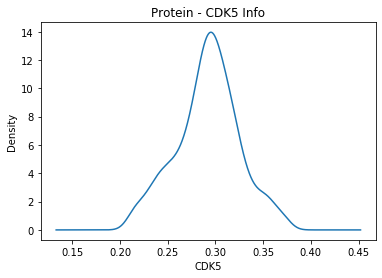

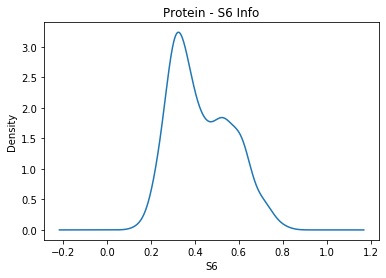

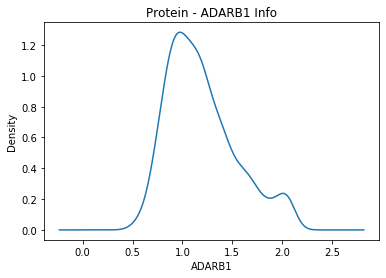

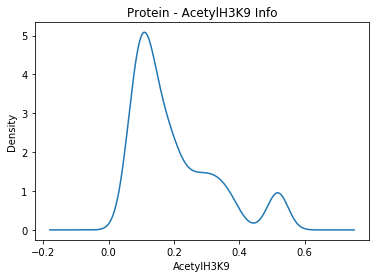

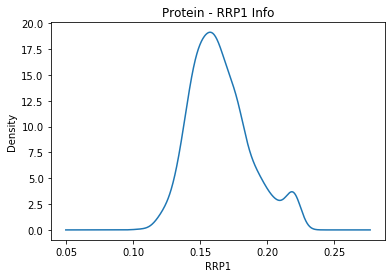

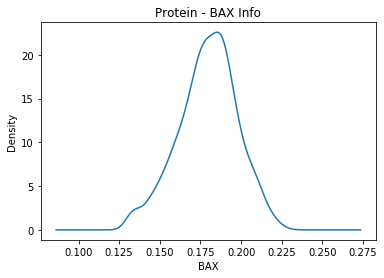

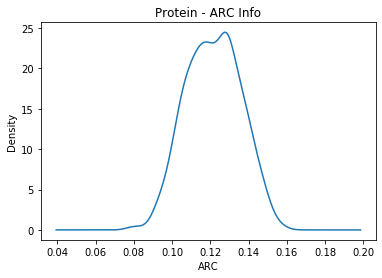

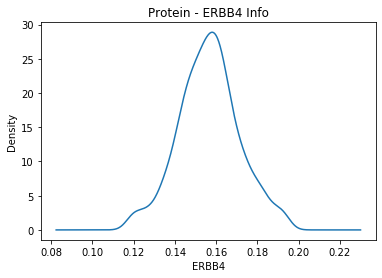

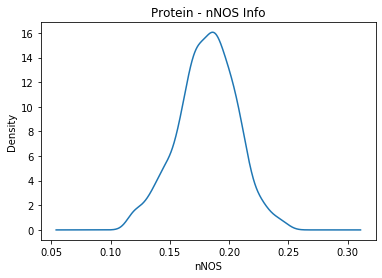

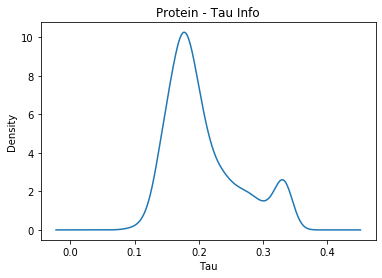

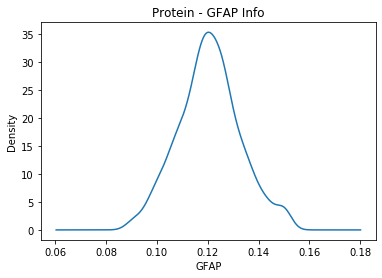

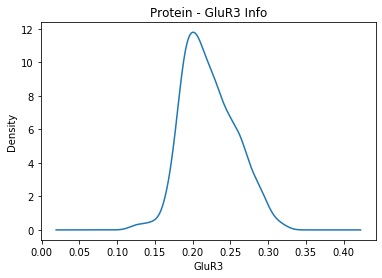

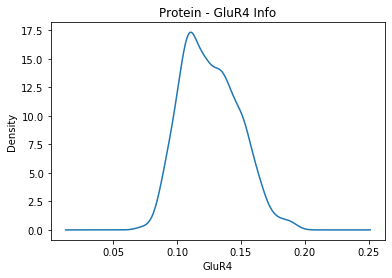

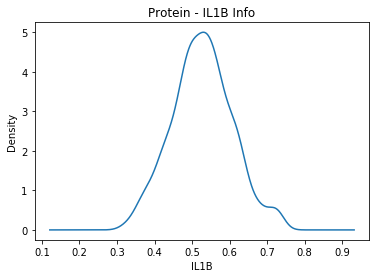

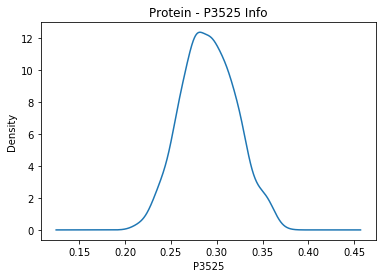

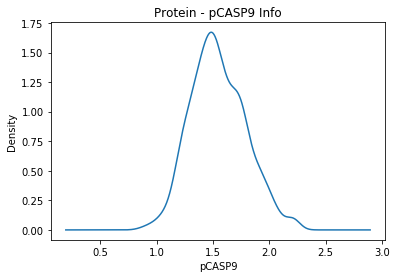

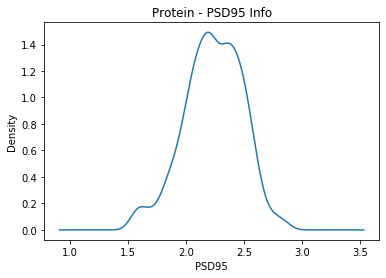

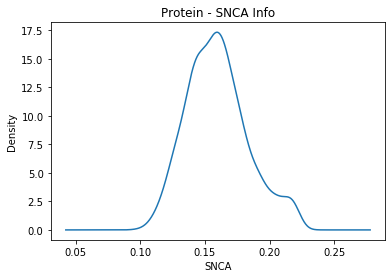

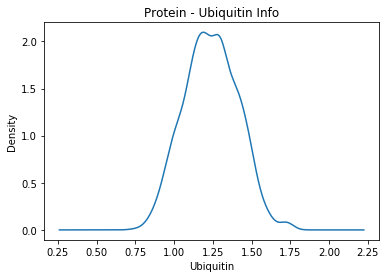

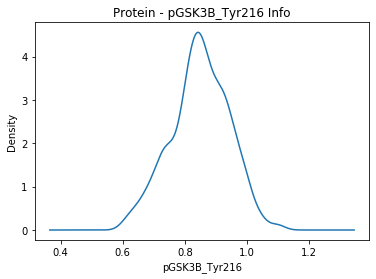

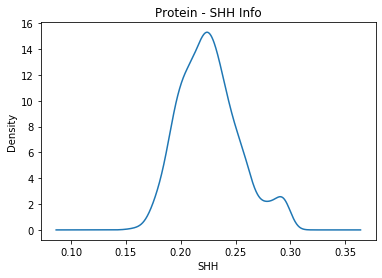

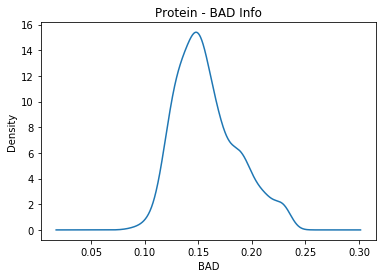

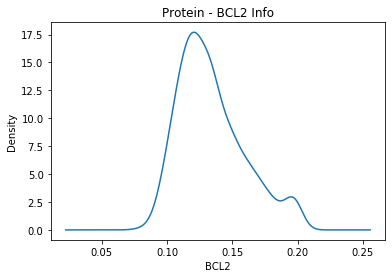

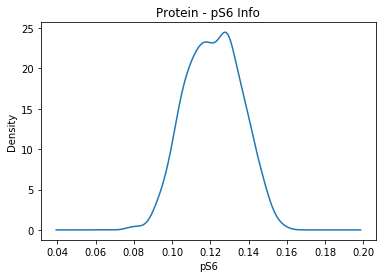

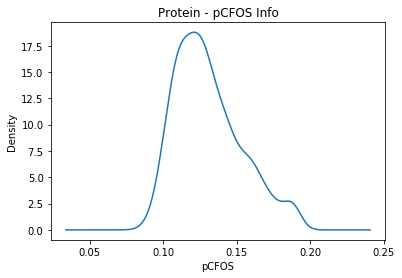

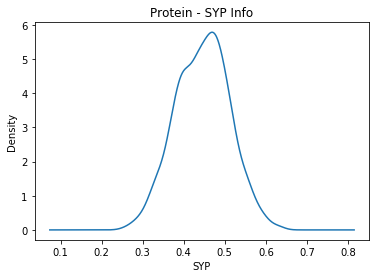

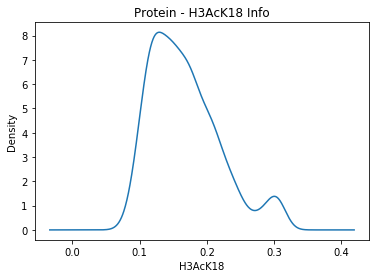

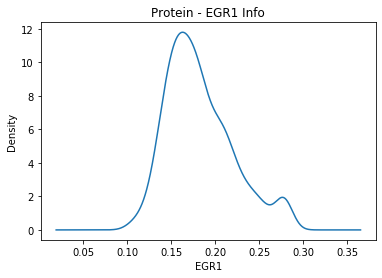

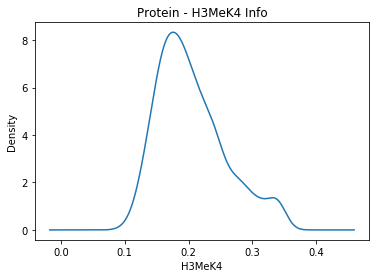

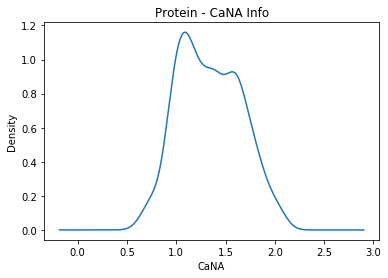

In [20]:
#check distribution of each column by density plot
for col in df.loc[:,'DYRK1A':'CaNA']:
    df[col].plot.kde()
    plt.title('Protein - ' + col + ' Info')
    plt.xlabel(col)
    plt.show()

In [21]:
#create subset for each class
df_cCSm = df.loc[df['class'] == 'c-CS-m']
df_cCSs = df.loc[df['class'] == 'c-CS-s']
df_cSCm = df.loc[df['class'] == 'c-SC-m']
df_cSCs = df.loc[df['class'] == 'c-SC-s']
df_tCSm = df.loc[df['class'] == 't-CS-m']
df_tCSs = df.loc[df['class'] == 't-CS-s']
df_tSCm = df.loc[df['class'] == 't-SC-m']
df_tSCs = df.loc[df['class'] == 't-SC-s']

In [22]:
#replace missing values with mean values of each class
#some columns have high percentage of missing values. Replace with mean might change the distribution.
#Further study needed to find a more appropriate missing value replacing method 
df_cCSm.fillna(df_cCSm.mean(),inplace = True)
df_cCSs.fillna(df_cCSs.mean(),inplace = True)
df_cSCm.fillna(df_cSCm.mean(),inplace = True)
df_cSCs.fillna(df_cSCs.mean(),inplace = True)
df_tCSm.fillna(df_tCSm.mean(),inplace = True)
df_tCSs.fillna(df_tCSs.mean(),inplace = True)
df_tSCm.fillna(df_tSCm.mean(),inplace = True)
df_tSCs.fillna(df_tSCs.mean(),inplace = True)

C:\Users\asus\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [23]:
#row bind subsets
frames = [df_cCSm, df_cCSs, df_cSCm, df_cSCs, df_tCSm, df_tCSs, df_tSCm, df_tSCs]
mice = pd.concat(frames)

In [24]:
#check data type for each column
mice.dtypes 

MouseID           object
DYRK1A           float64
ITSN1            float64
BDNF             float64
NR1              float64
NR2A             float64
pAKT             float64
pBRAF            float64
pCAMKII          float64
pCREB            float64
pELK             float64
pERK             float64
pJNK             float64
PKCA             float64
pMEK             float64
pNR1             float64
pNR2A            float64
pNR2B            float64
pPKCAB           float64
pRSK             float64
AKT              float64
BRAF             float64
CAMKII           float64
CREB             float64
ELK              float64
ERK              float64
GSK3B            float64
JNK              float64
MEK              float64
TRKA             float64
RSK              float64
APP              float64
Bcatenin         float64
SOD1             float64
MTOR             float64
P38              float64
pMTOR            float64
DSCR1            float64
AMPKA            float64
NR2B             float64


In [25]:
#Creat a list to store categorical columns
categoricalList = ['MouseID','Genotype', 'Treatment', 'Behavior', 'class']

In [26]:
#Convert columns in categorical list to categorical values without order.
for col in categoricalList:
    mice[col] = pd.Categorical(mice[col])

In [27]:
#check data type of columns in categoricalList after converted
mice[categoricalList].dtypes 

MouseID      category
Genotype     category
Treatment    category
Behavior     category
class        category
dtype: object

In [28]:
#check unique values in object columns
checkValue(mice[categoricalList])

J3295     15
J2292     15
3422      15
3423      15
3424      15
3425      15
3426      15
3429      15
3476      15
3477      15
3478      15
3479      15
3480      15
3481      15
3483      15
3484      15
3488      15
3421      15
3420      15
3419      15
322       15
293       15
294       15
309       15
311       15
320       15
321       15
3411      15
3418      15
3412      15
3413      15
3414      15
3415      15
3416      15
3417      15
3489      15
3490      15
3491      15
365       15
3605      15
3606      15
361       15
362       15
363       15
364       15
50810A    15
3530      15
50810B    15
50810C    15
50810D    15
50810E    15
50810F    15
J1291     15
3534      15
3525      15
3497      15
3504      15
3498      15
3499      15
3500      15
3501      15
3502      15
3503      15
3505      15
3522      15
3507      15
3513      15
3516      15
3517      15
3520      15
3521      15
18899     15
Name: MouseID, dtype: int64

Control    570
Ts65Dn     510
Name:

In [29]:
# normalize to range 0–1
min_max_scaler = preprocessing.MinMaxScaler()
mice.loc[:,'DYRK1A':'CaNA'] = min_max_scaler.fit_transform(mice.loc[:,'DYRK1A':'CaNA'])

In [30]:
#check the shape of the dataset to make sure no data loss
mice.shape

(1080, 82)

In [31]:
#all missing values are replaced
checkNa(mice)

MouseID: has no missing value.

DYRK1A: has no missing value.

ITSN1: has no missing value.

BDNF: has no missing value.

NR1: has no missing value.

NR2A: has no missing value.

pAKT: has no missing value.

pBRAF: has no missing value.

pCAMKII: has no missing value.

pCREB: has no missing value.

pELK: has no missing value.

pERK: has no missing value.

pJNK: has no missing value.

PKCA: has no missing value.

pMEK: has no missing value.

pNR1: has no missing value.

pNR2A: has no missing value.

pNR2B: has no missing value.

pPKCAB: has no missing value.

pRSK: has no missing value.

AKT: has no missing value.

BRAF: has no missing value.

CAMKII: has no missing value.

CREB: has no missing value.

ELK: has no missing value.

ERK: has no missing value.

GSK3B: has no missing value.

JNK: has no missing value.

MEK: has no missing value.

TRKA: has no missing value.

RSK: has no missing value.

APP: has no missing value.

Bcatenin: has no missing value.

SOD1: has no missing value.



In [32]:
mice.head().T

0          1          2          3          4
MouseID              309        309        309        309        309
DYRK1A          0.558326   0.575424   0.566957    0.46244   0.451273
ITSN1           0.635492    0.56188   0.614032    0.47072   0.471168
BDNF            0.962339   0.886603   0.913509   0.667915   0.668639
NR1             0.777762   0.763532   0.709234   0.592343   0.538656
NR2A            0.918695   0.852781   0.839175   0.700364   0.644018
pAKT            0.438465   0.403548   0.390805   0.458151   0.410682
pBRAF           0.473794   0.437627   0.459754   0.465394   0.443796
pCAMKII         0.168257   0.154925   0.153485   0.132074   0.129086
pCREB           0.611459   0.581465   0.600168    0.46742   0.382627
pELK            0.757545   0.649508      0.625   0.648605   0.585096
pERK            0.537151    0.54423   0.526624   0.432832   0.400611
pJNK            0.468149   0.440988    0.41218   0.432383   0.396192
PKCA              0.7925   0.729812   0.711115   0.696427   0.645468
pMEK            0.597439   0.531483   0.533137   0.668872   0.517308
pNR1            0.824397   0.718916   0.794672   0.587784    0.57088
pNR2A           0.339723   0.320752   0.336346   0.250307   0.237422
pNR2B           0.712914   0.609504   0.613656    0.50132   0.442237
pPKCAB          0.727037   0.616072   0.605609    0.65354   0.603819
pRSK            0.495123   0.506741   0.578727   0.610807   0.629233
AKT             0.777983   0.740062   0.708858   0.575899    0.51464
BRAF            0.551958   0.519689   0.518641    0.48985   0.453158
CAMKII          0.528785   0.475483   0.522755    0.50244   0.472043
CREB            0.491352   0.451743   0.453436   0.495149   0.460439
ELK             0.981398   0.905884   0.909109   0.565451   0.592999
ERK             0.833893   0.768591   0.796732   0.600356   0.576254
GSK3B           0.823537   0.799127   0.792142   0.721005   0.668802
JNK             0.632199   0.580911   0.603564   0.603111   0.551639
MEK             0.713128   0.642045   0.676184   0.524645   0.498785
TRKA            0.697252   0.643457   0.650955   0.569265   0.518001
RSK             0.451346   0.384534   0.413118   0.423269   0.366264
APP             0.664748   0.588748   0.563096   0.521497   0.481577
Bcatenin         0.87092   0.817944    0.82813   0.624933   0.604957
SOD1            0.146126   0.120015   0.121373   0.122153   0.107402
MTOR            0.530042    0.41741   0.422063   0.435608   0.369738
P38             0.262114   0.236499   0.236541   0.249393   0.208643
pMTOR           0.599172   0.498748   0.491333   0.475431   0.388377
DSCR1           0.486138   0.409322   0.405754   0.413342   0.389436
AMPKA           0.776338   0.681005   0.624113   0.561886   0.470683
NR2B            0.554155   0.450812   0.470632   0.457717   0.369808
pNUMB           0.631345    0.54856   0.534877   0.543919   0.496314
RAPTOR          0.558195   0.490279    0.45606   0.515471   0.452668
TIAM1           0.704973   0.620627   0.598838   0.585306   0.515213
pP70S6          0.250831   0.223541   0.193109   0.411381   0.403556
NUMB            0.471385   0.470913   0.487824   0.321613   0.310096
P70S6           0.393296   0.398893   0.408681    0.29887   0.307889
pGSK3B          0.857024    0.88156   0.947402     0.7632    0.78042
pPKCG           0.308325   0.306999   0.338004   0.370146   0.382352
CDK5            0.513542    0.50953   0.558546   0.524083   0.526888
S6              0.324085   0.324004   0.369553   0.231762    0.25872
ADARB1          0.530895   0.509431   0.491916   0.438931   0.444326
AcetylH3K9      0.252206   0.255012   0.285102   0.230073   0.240477
RRP1            0.463756   0.455183   0.372109   0.525493   0.477711
BAX              0.59589   0.550155    0.61384   0.558203   0.589158
ARC              0.34104   0.344646   0.366144   0.301818   0.321923
ERBB4            0.34818   0.422446   0.352798   0.289467    0.30745
nNOS            0.454526   0.467303   0.450986   0.354395   0.384796
Tau             0.122

In [33]:
#Explore the relationship between pairs of attributes

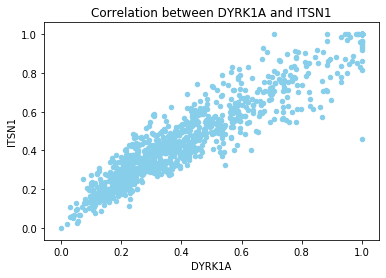

In [34]:
#Hypothesis 1: DYRK1A and ITSN1 have high correlation.
mice.plot.scatter(x='DYRK1A', y='ITSN1',c='SkyBlue')
plt.title('Correlation between DYRK1A and ITSN1')
plt.show()

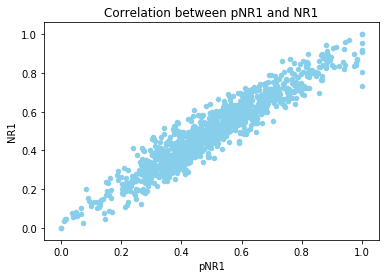

In [35]:
#Hypothesis 2: pNR1 and NR1 have high correlation.
mice.plot.scatter(x='pNR1', y='NR1',c='SkyBlue')
plt.title('Correlation between pNR1 and NR1')
plt.show()

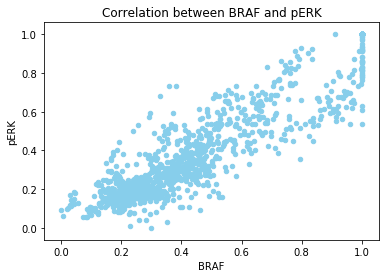

In [36]:
#Hypothesis 3: BRAF and pERK have high correlation.
mice.plot.scatter(x='BRAF', y='pERK',c='SkyBlue')
plt.title('Correlation between BRAF and pERK')
plt.show()

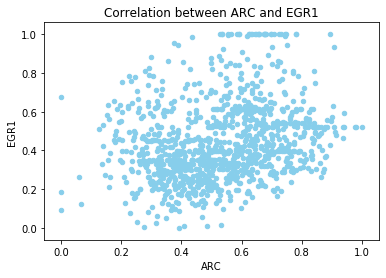

In [37]:
#Hypothesis 4: ARC and EGR1 have high correlation.
mice.plot.scatter(x='ARC', y='EGR1',c='SkyBlue')
plt.title('Correlation between ARC and EGR1')
plt.show()

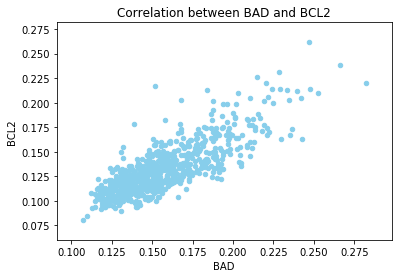

In [38]:
#Hypothesis 5: BAD and BCL2 have negative correlation.
df_raw.plot.scatter(x='BAD_N', y='BCL2_N',c='SkyBlue')
plt.title('Correlation between BAD and BCL2')
plt.xlabel('BAD')
plt.ylabel('BCL2')
plt.show()

In [39]:
#define a function to plot boxplot for protein columns and description columns
def proteinBoxplot(data,col):
    data.boxplot(column=col,by='Genotype',showfliers=False)
    plt.title('Boxplot of ' + col +  ' group by Genotype')
    plt.suptitle('')
    data.boxplot(column=col,by='Treatment',showfliers=False)
    plt.title('Boxplot of ' + col +  ' group by Treatment')
    plt.suptitle('')
    data.boxplot(column=col,by='Behavior',showfliers=False)
    plt.title('Boxplot of ' + col +  ' group by Behavior')
    plt.suptitle('')
    data.boxplot(column=col,by='class',showfliers=False)
    plt.title('Boxplot of ' + col +  ' group by class')
    plt.suptitle('')
    plt.show()

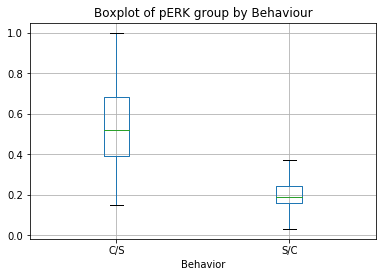

In [40]:
#Hypothesis 6: pERK is a good discriminant between Behaviors.
mice.boxplot(column='pERK',by='Behavior',showfliers=False)
plt.title('Boxplot of pERK group by Behaviour')
plt.suptitle('')
plt.show()

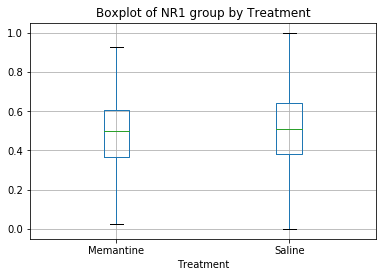

In [41]:
#Hypothesis 7: NR1 is a good discriminant between the Treatments.
mice.boxplot(column='NR1',by='Treatment',showfliers=False)
plt.title('Boxplot of NR1 group by Treatment')
plt.suptitle('')
plt.show()

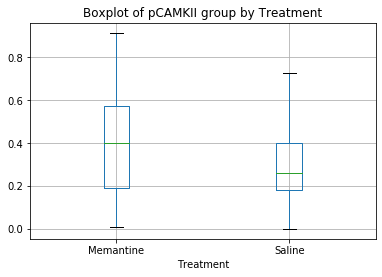

In [42]:
#Hypothesis 8: pCAMKII is a good discriminant between the Treatments.
mice.boxplot(column='pCAMKII',by='Treatment',showfliers=False)
plt.title('Boxplot of pCAMKII group by Treatment')
plt.suptitle('')
plt.show()

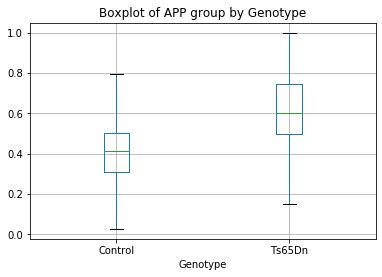

In [43]:
#Hypothesis 9: APP is a good discriminant between the Genotypes.
mice.boxplot(column='APP',by='Genotype',showfliers=False)
plt.title('Boxplot of APP group by Genotype')
plt.suptitle('')
plt.show()

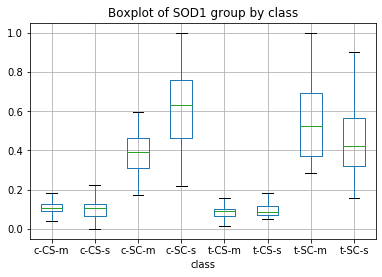

In [44]:
#Hypothesis 10: SOD1 plays an important role in discriminating the 8 classes.
mice.boxplot(column='SOD1',by='class',showfliers=False)
plt.title('Boxplot of SOD1 group by class')
plt.suptitle('')
plt.show()

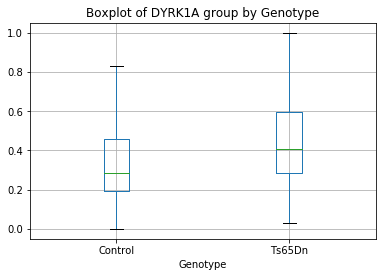

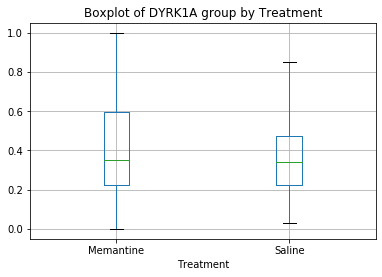

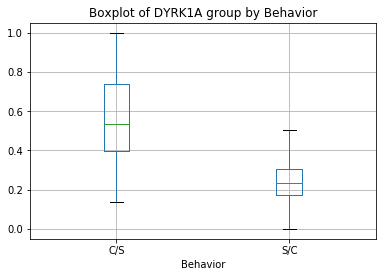

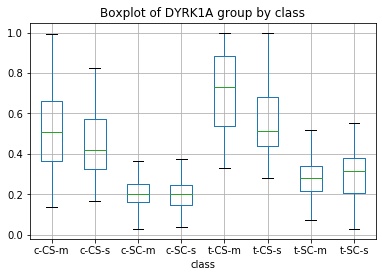

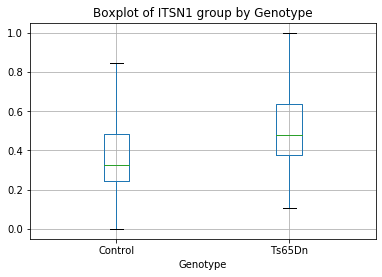

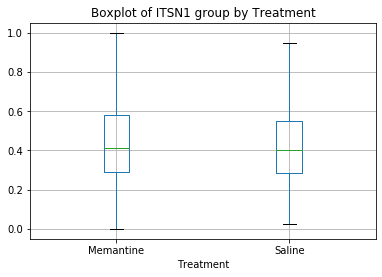

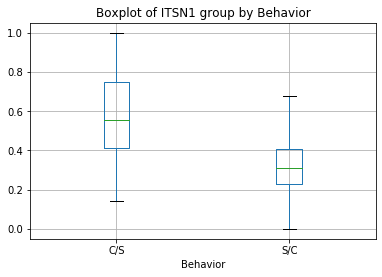

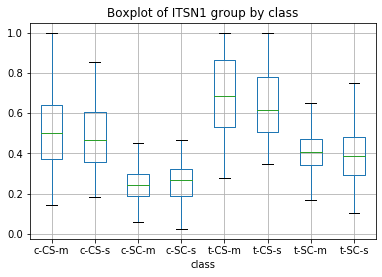

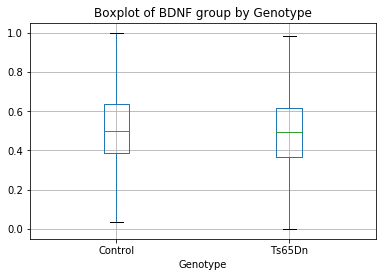

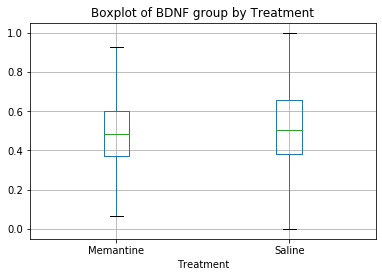

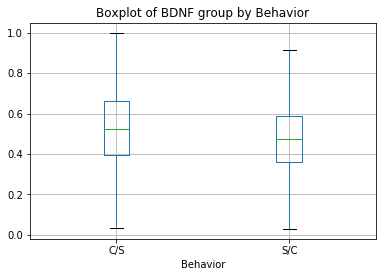

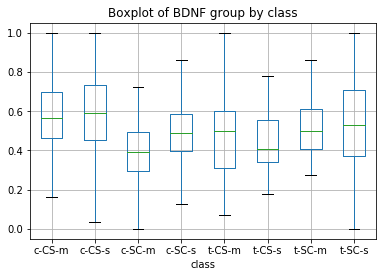

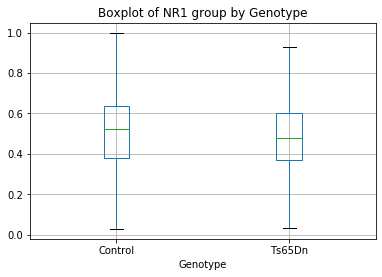

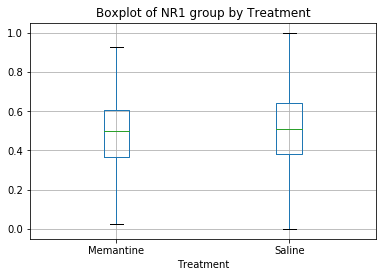

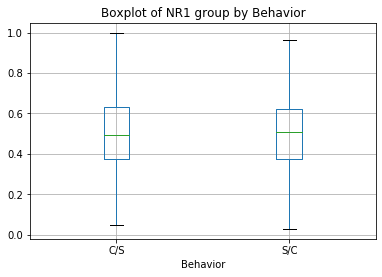

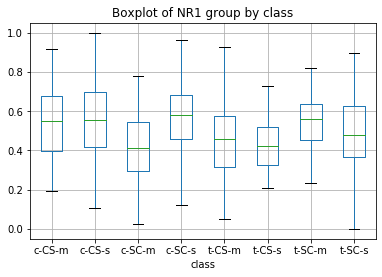

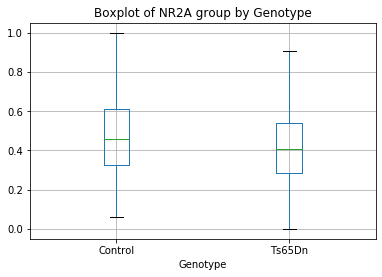

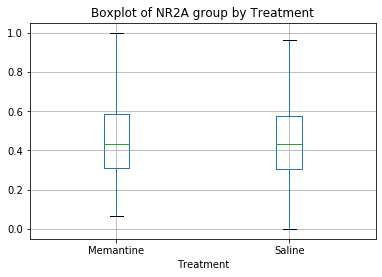

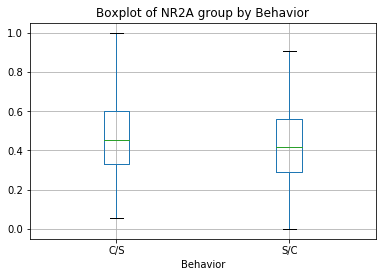

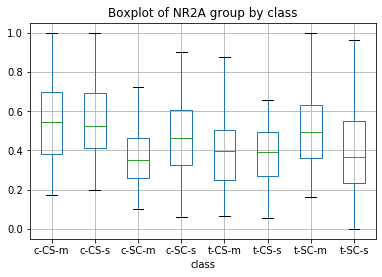

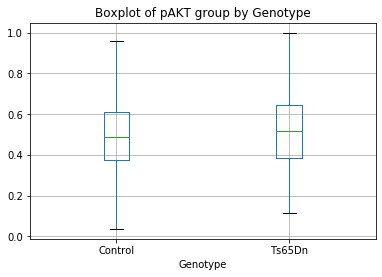

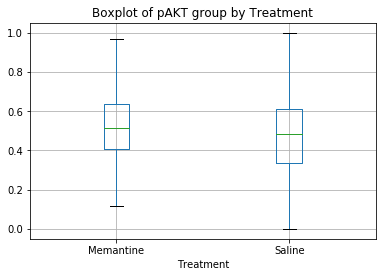

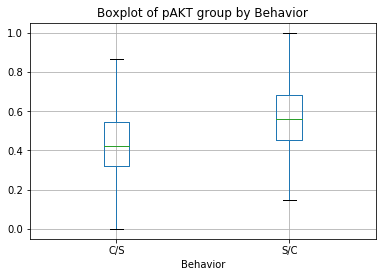

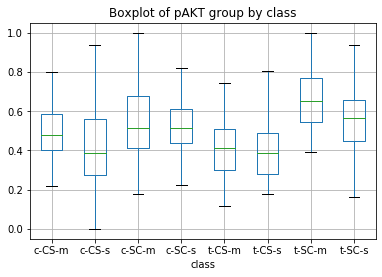

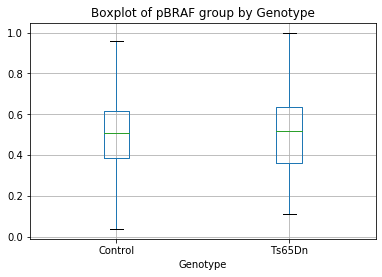

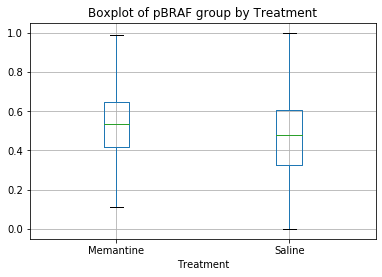

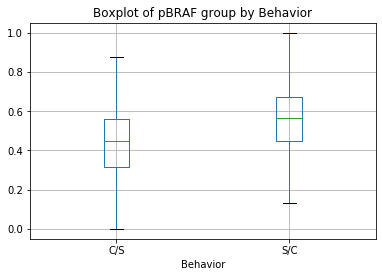

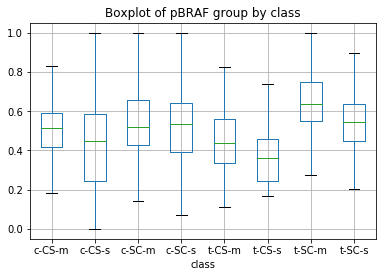

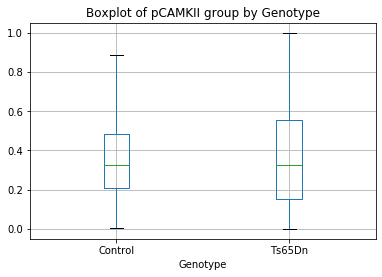

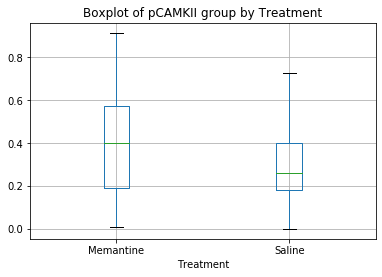

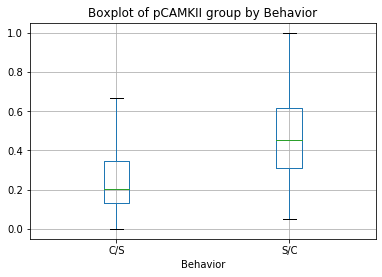

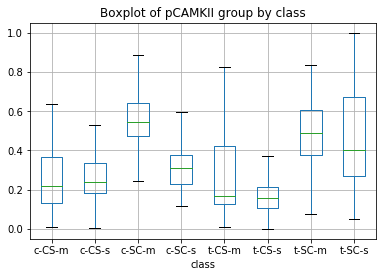

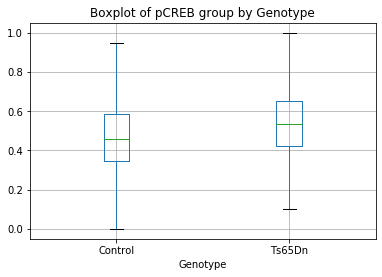

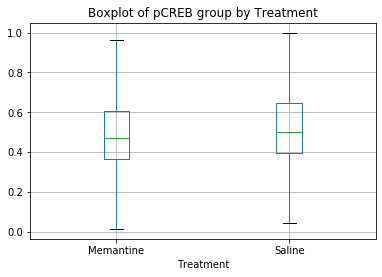

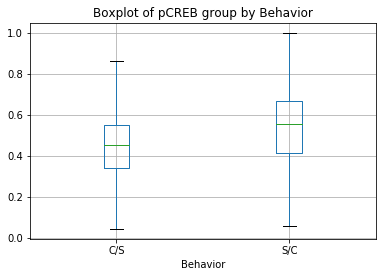

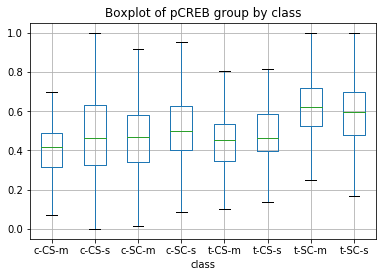

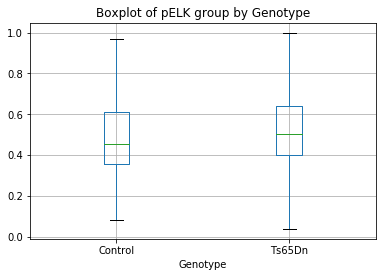

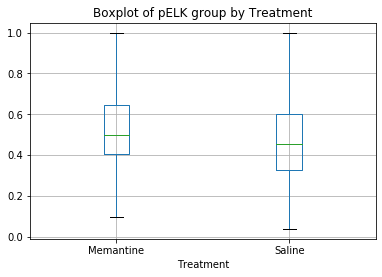

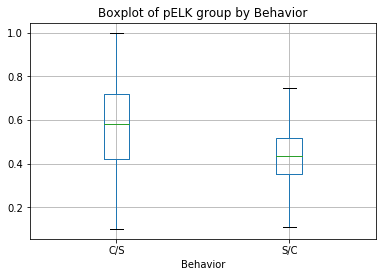

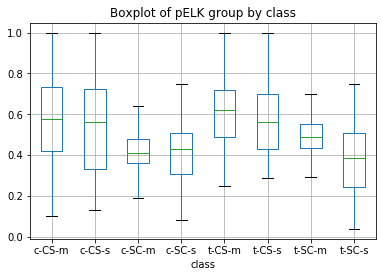

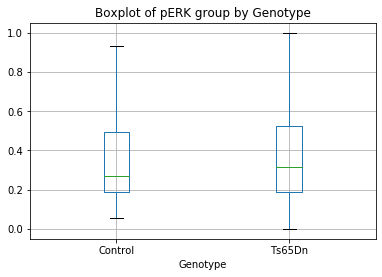

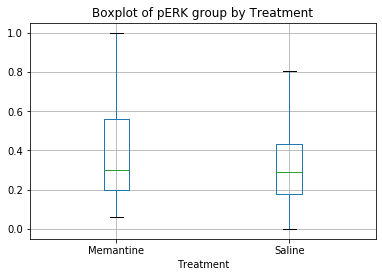

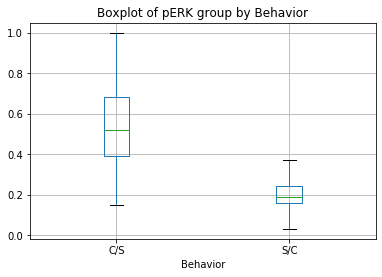

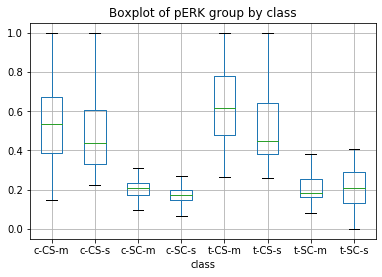

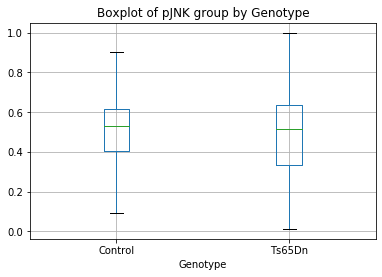

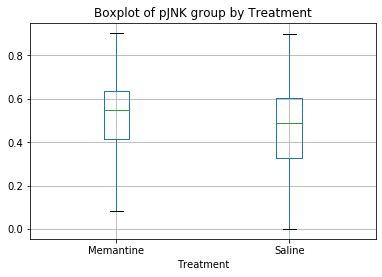

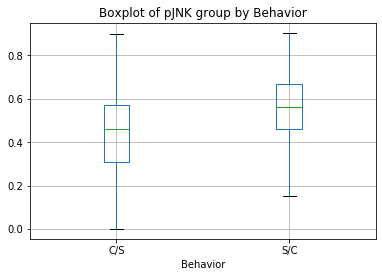

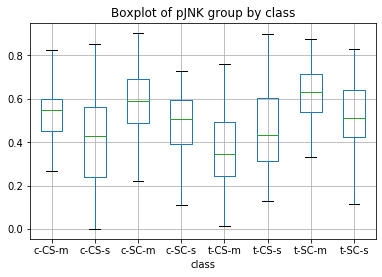

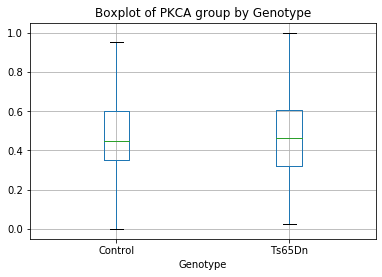

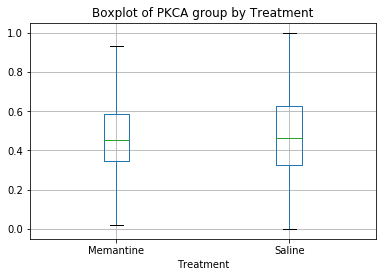

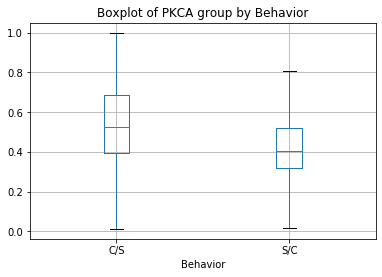

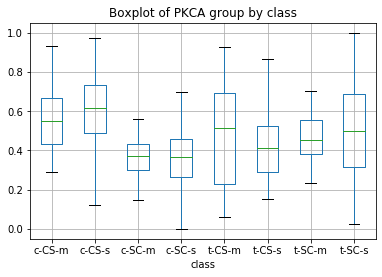

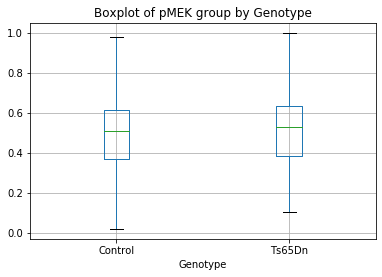

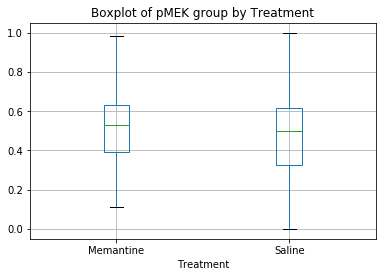

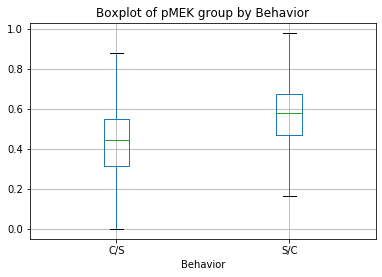

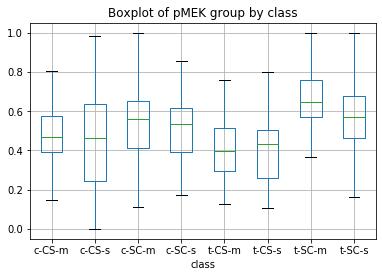

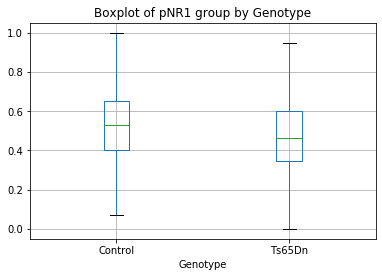

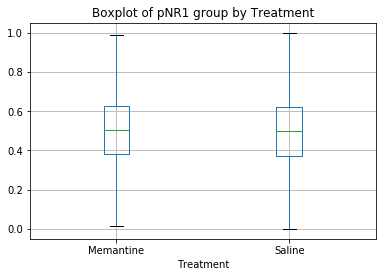

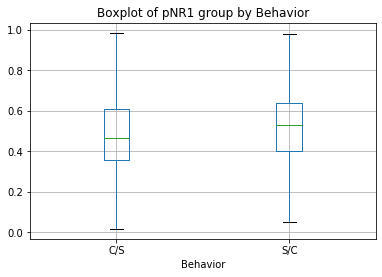

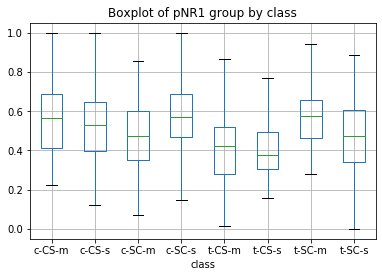

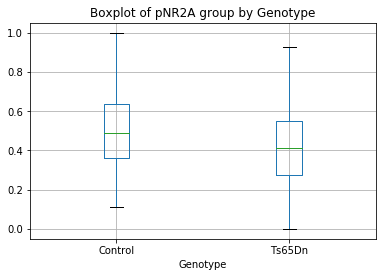

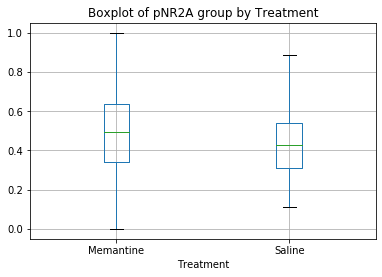

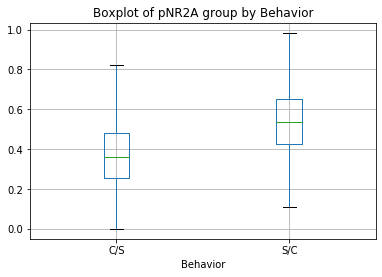

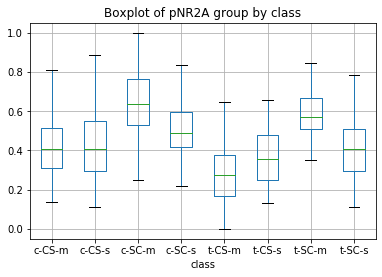

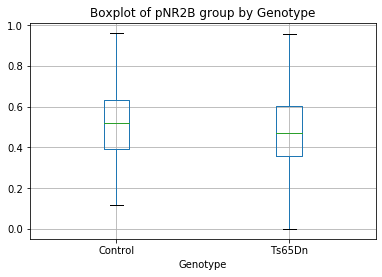

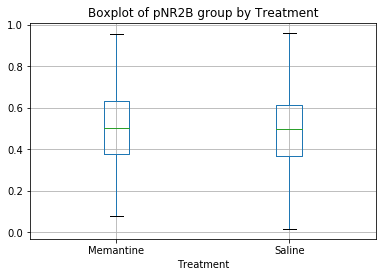

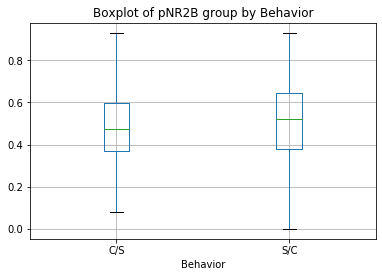

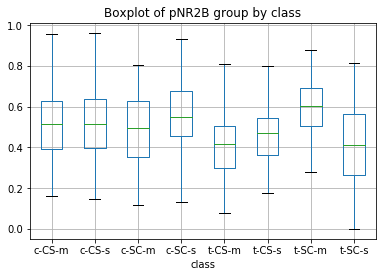

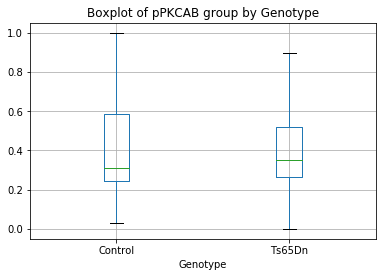

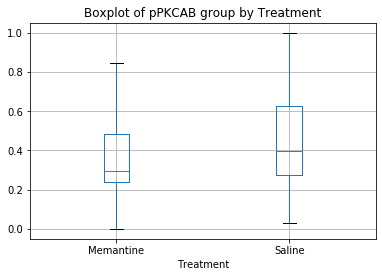

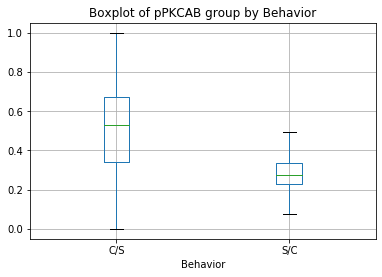

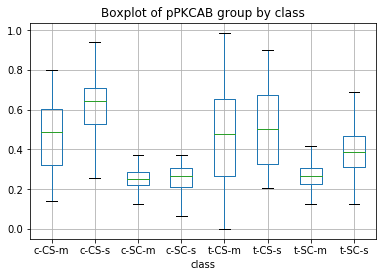

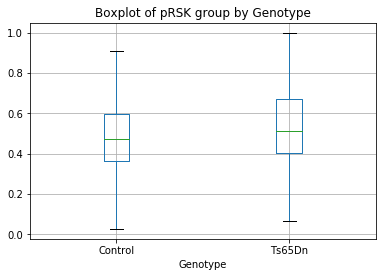

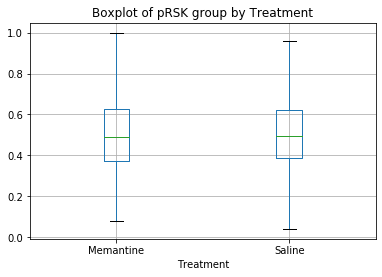

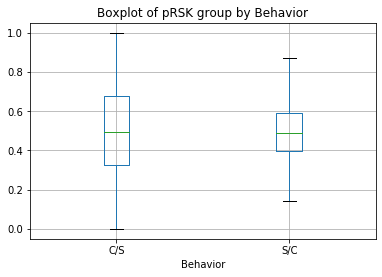

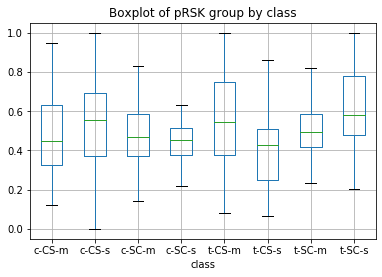

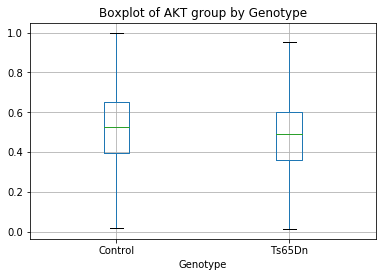

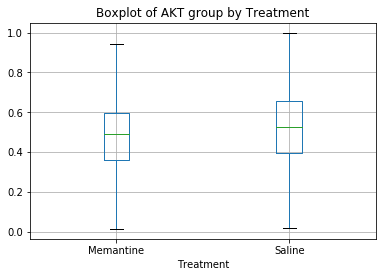

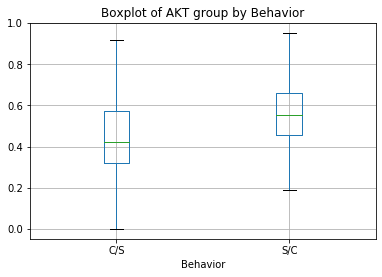

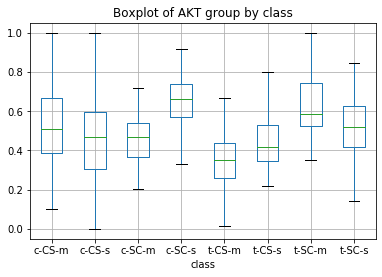

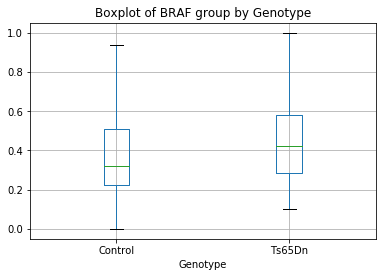

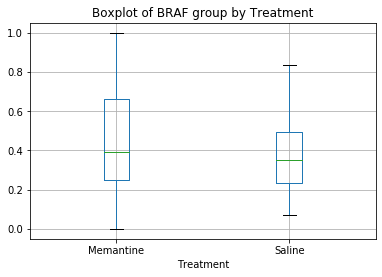

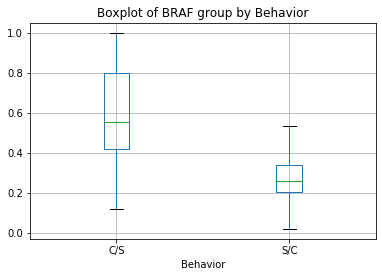

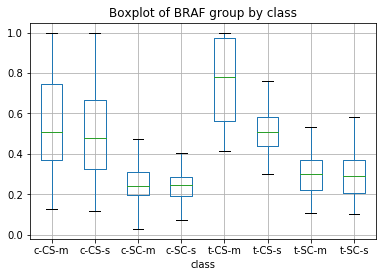

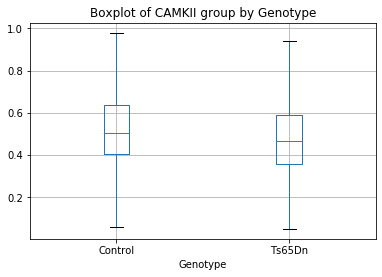

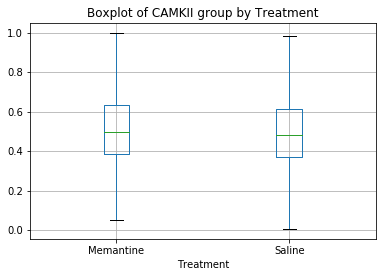

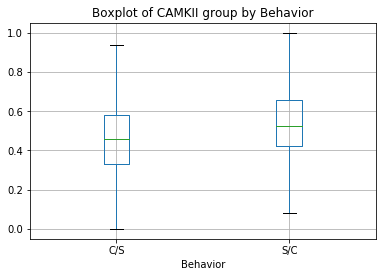

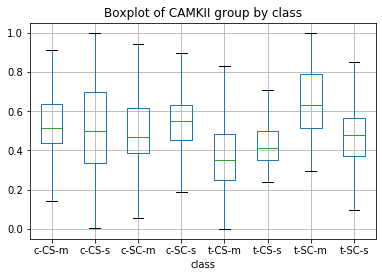

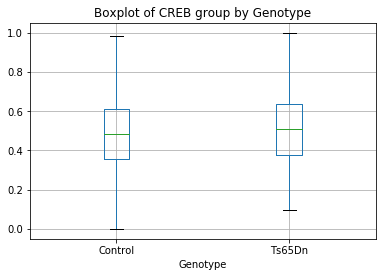

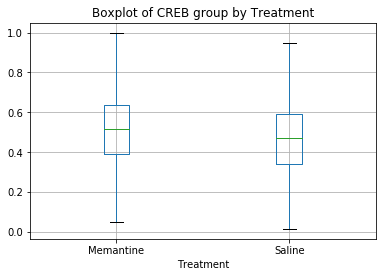

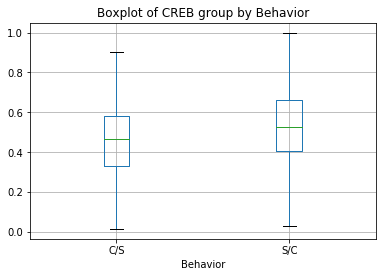

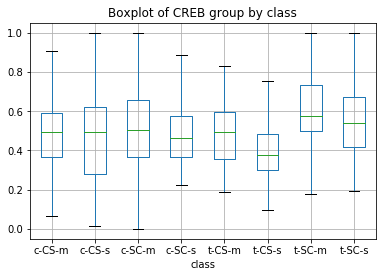

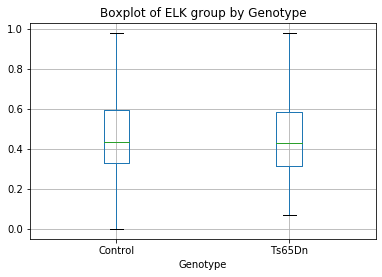

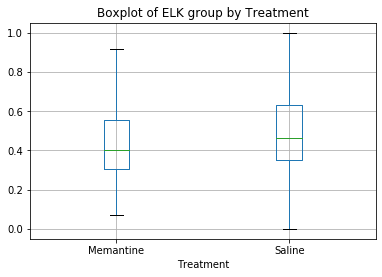

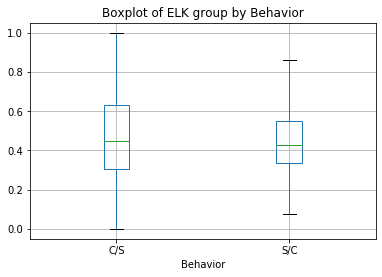

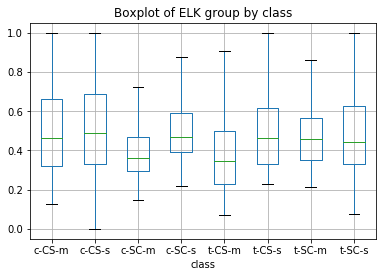

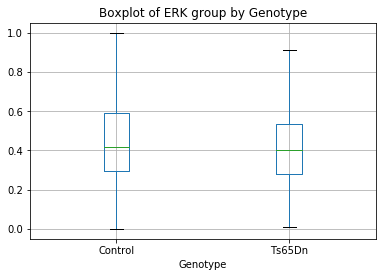

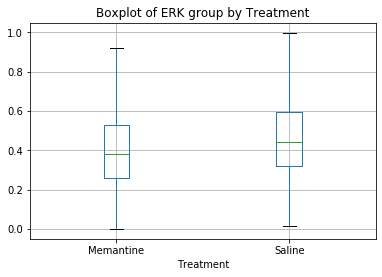

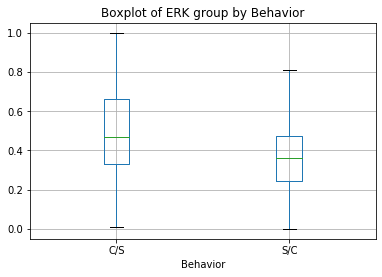

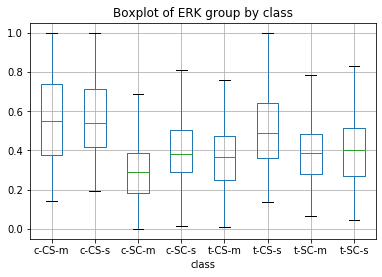

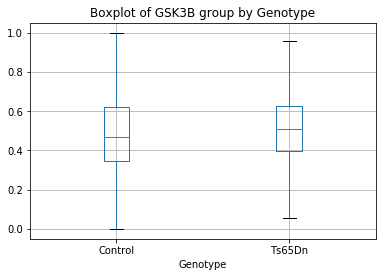

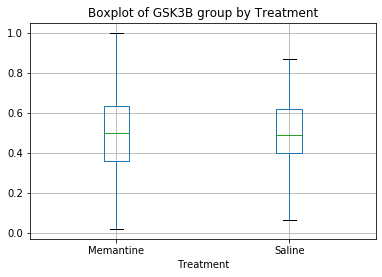

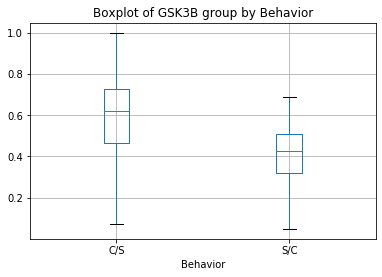

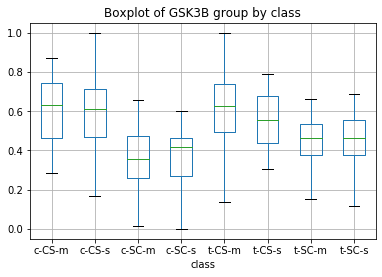

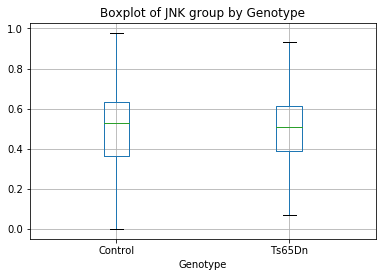

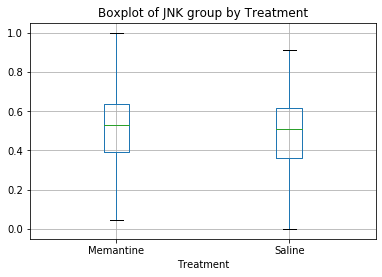

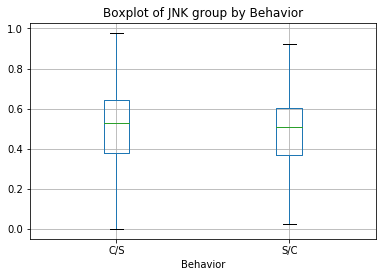

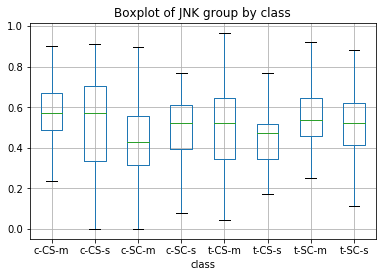

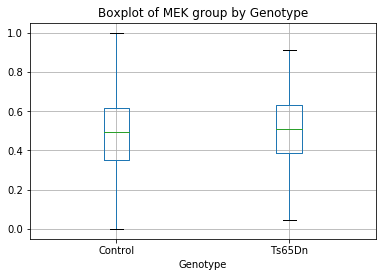

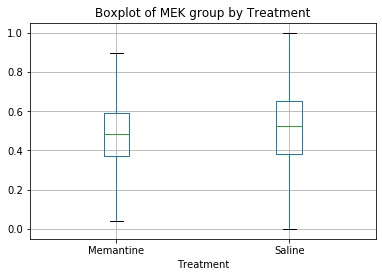

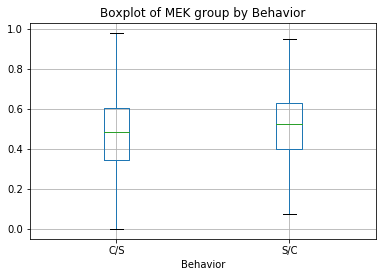

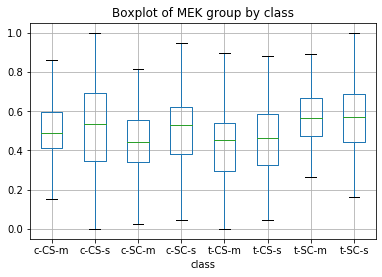

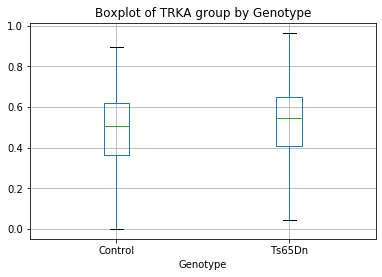

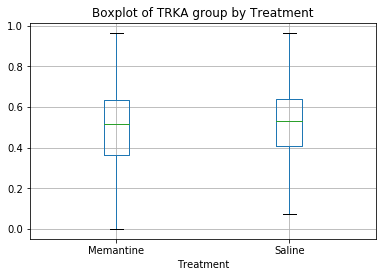

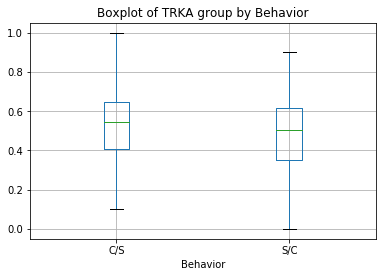

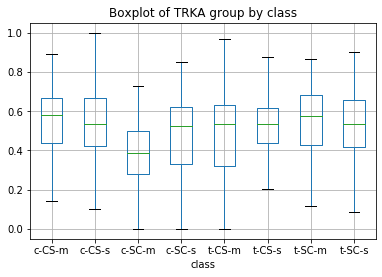

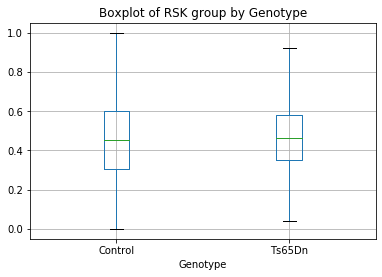

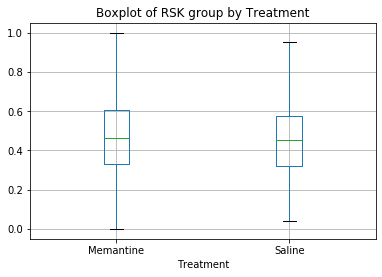

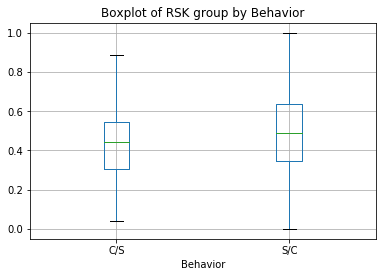

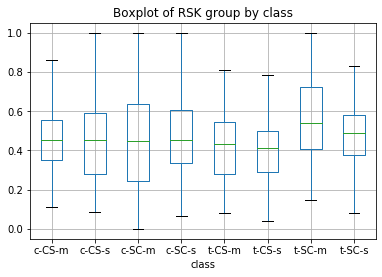

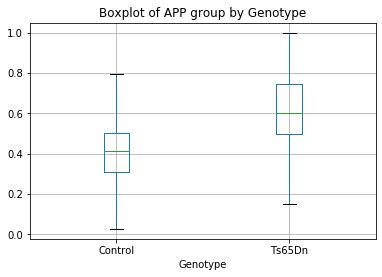

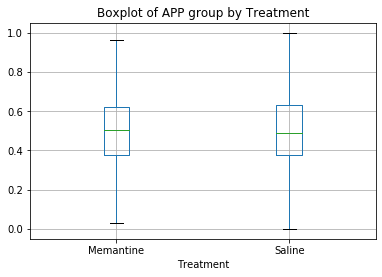

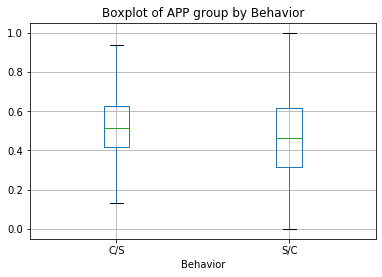

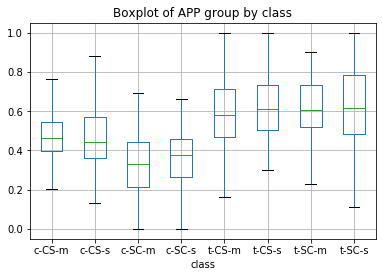

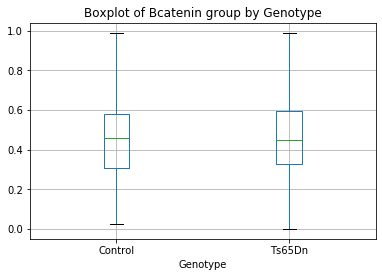

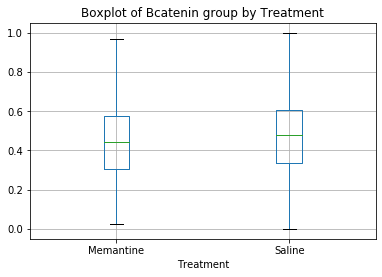

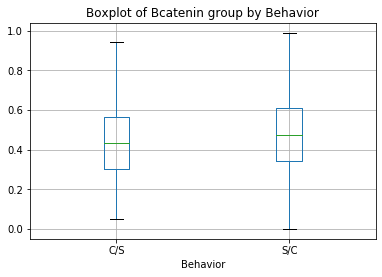

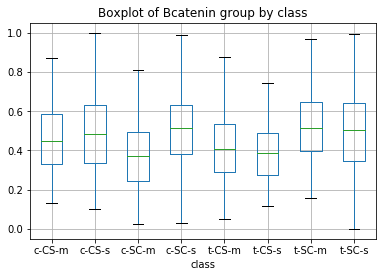

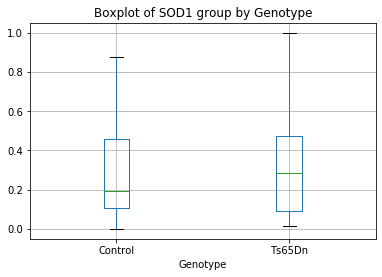

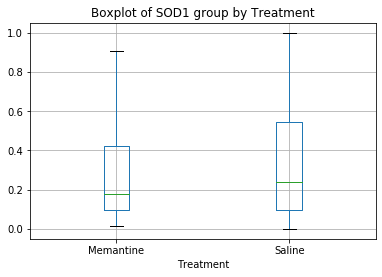

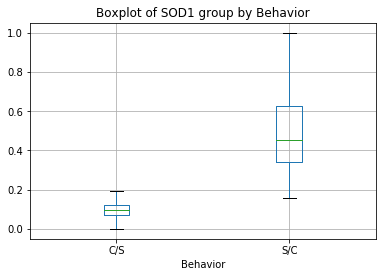

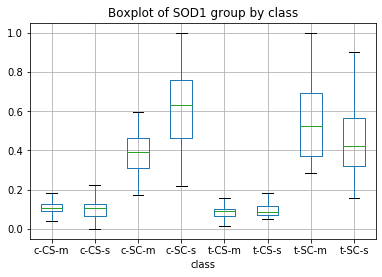

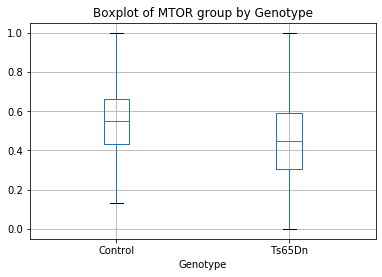

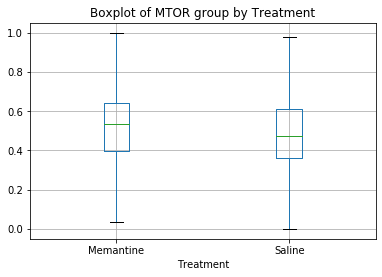

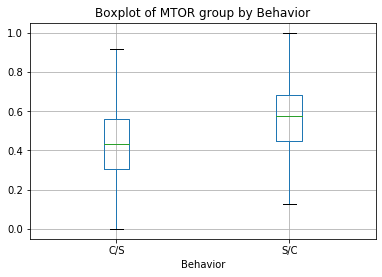

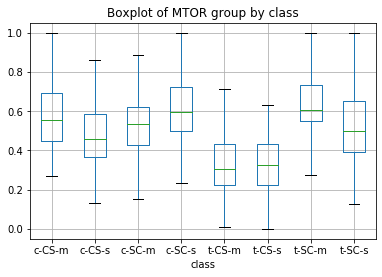

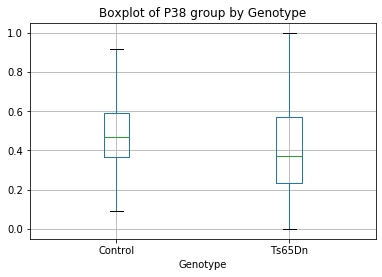

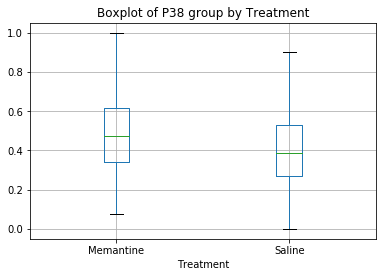

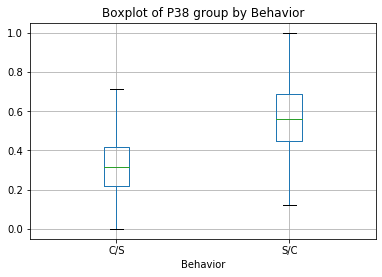

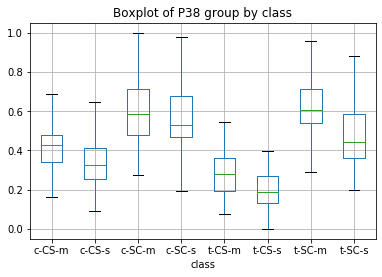

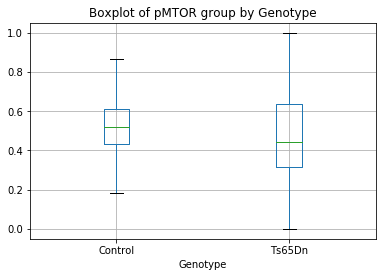

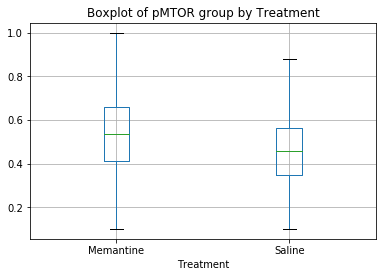

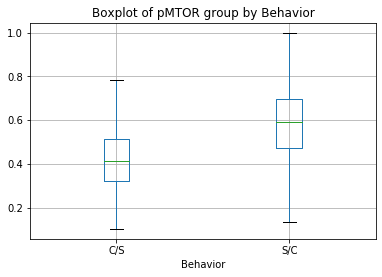

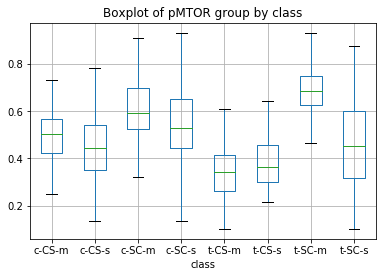

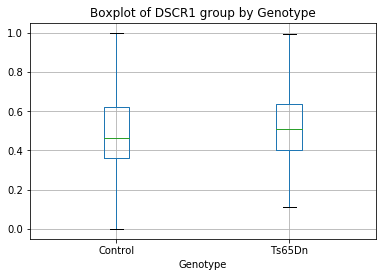

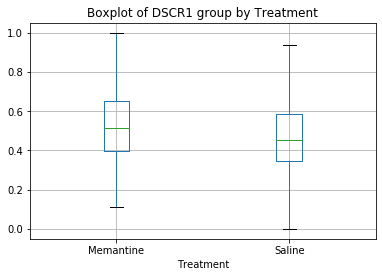

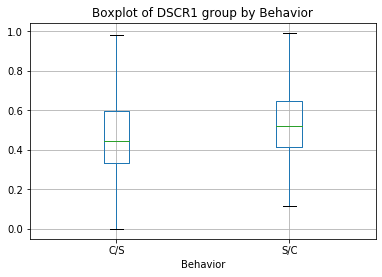

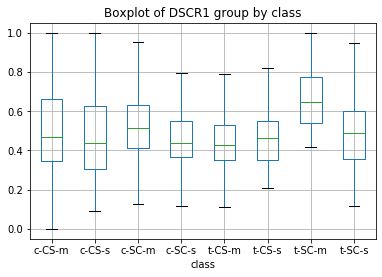

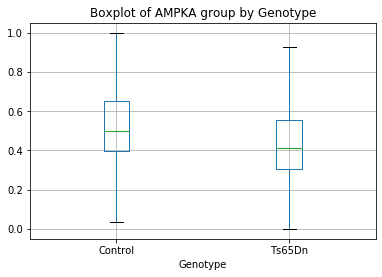

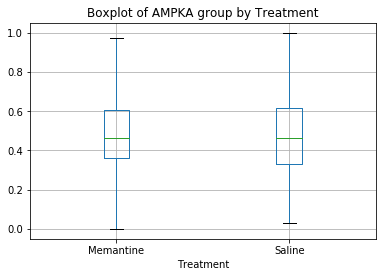

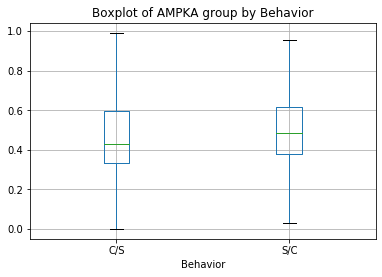

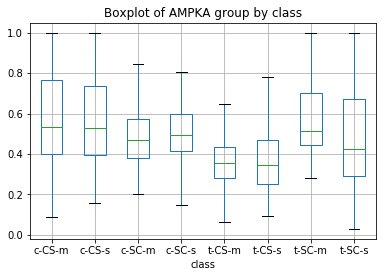

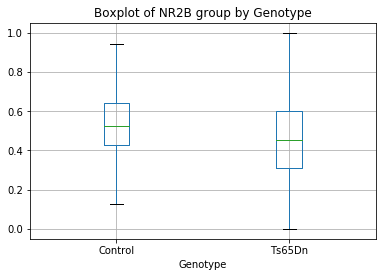

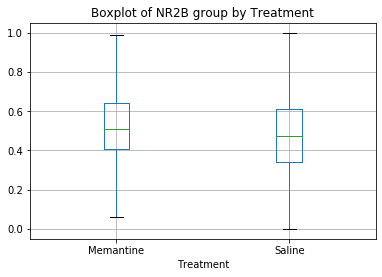

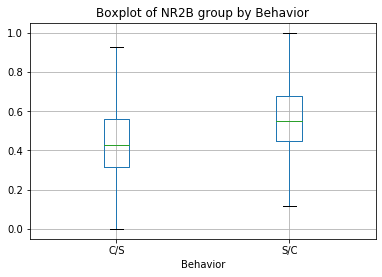

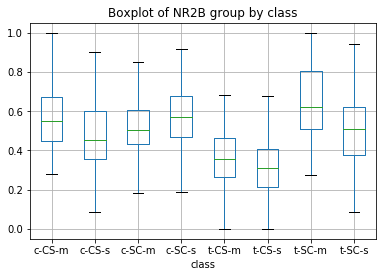

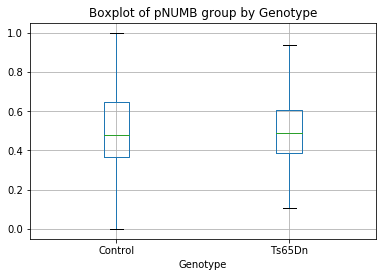

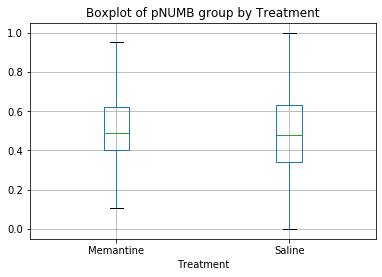

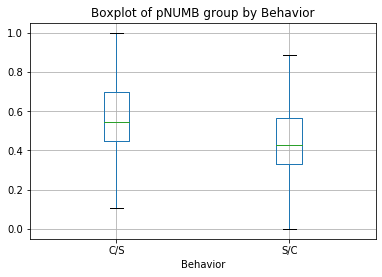

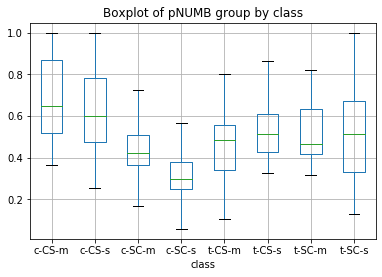

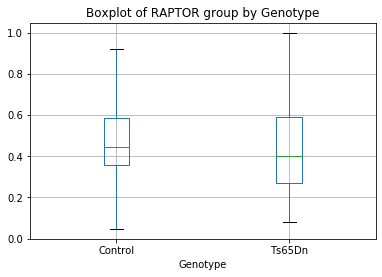

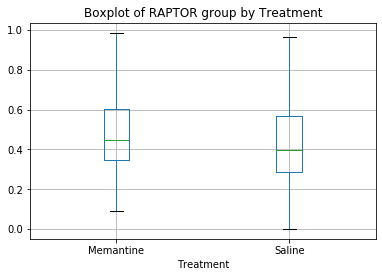

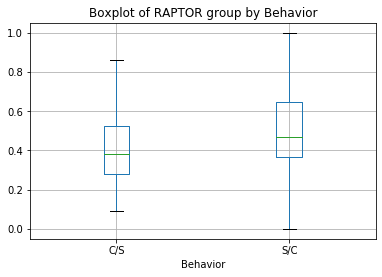

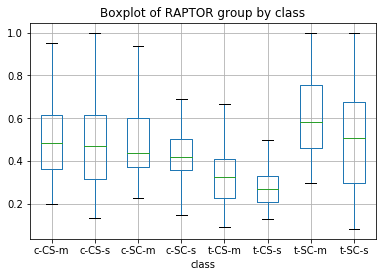

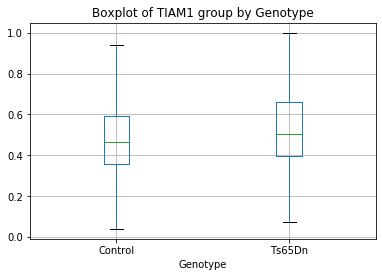

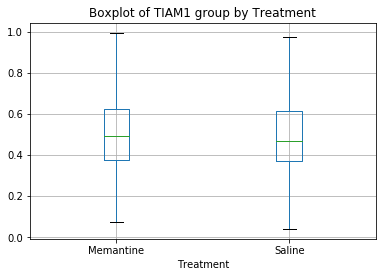

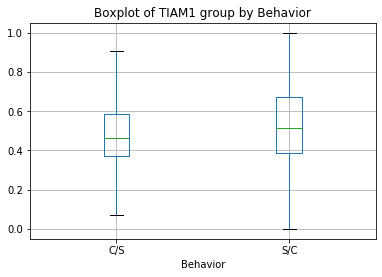

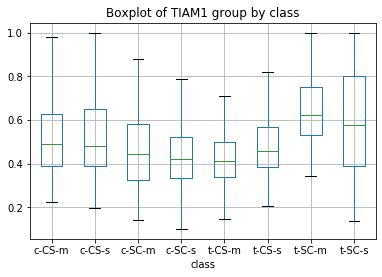

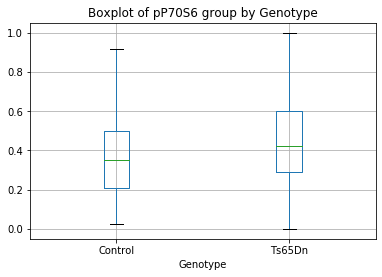

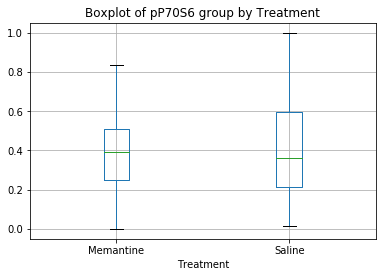

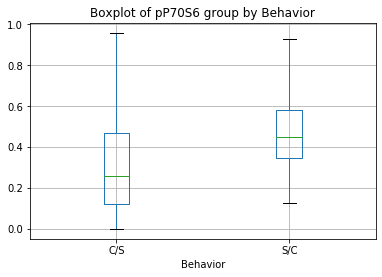

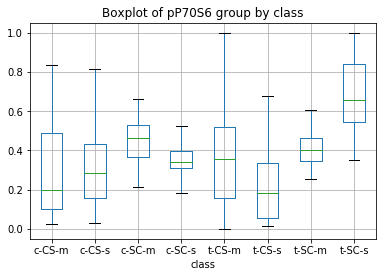

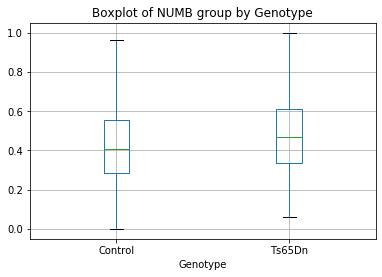

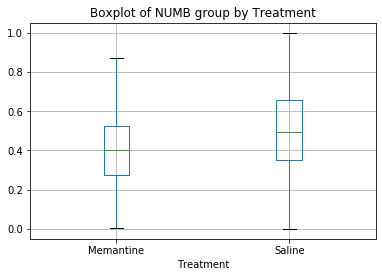

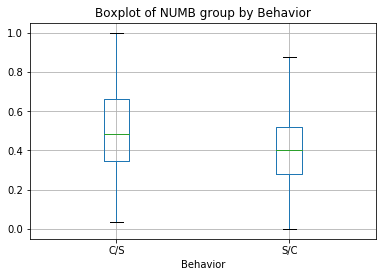

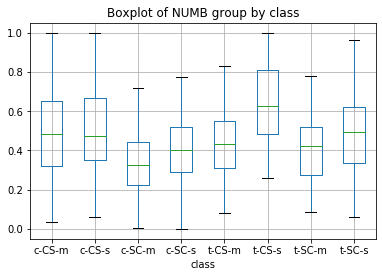

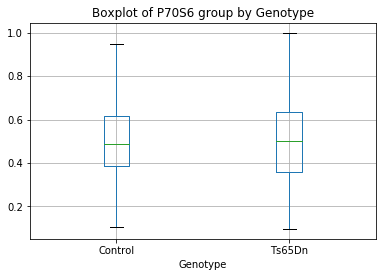

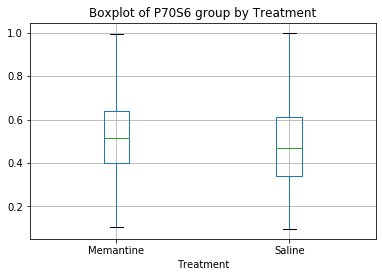

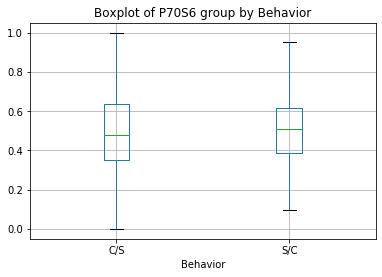

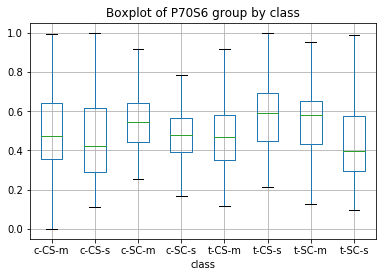

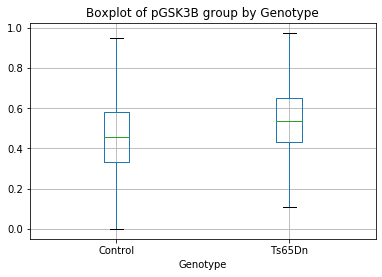

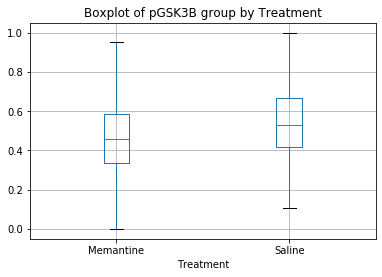

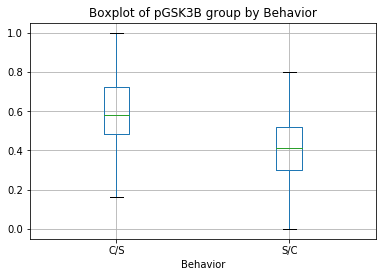

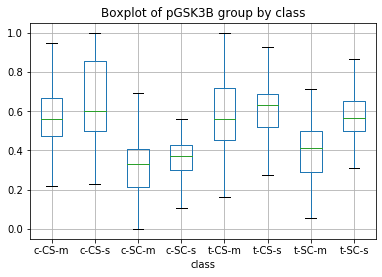

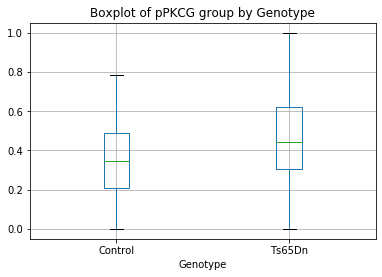

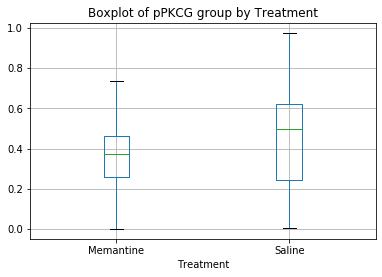

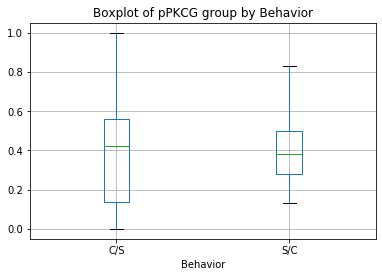

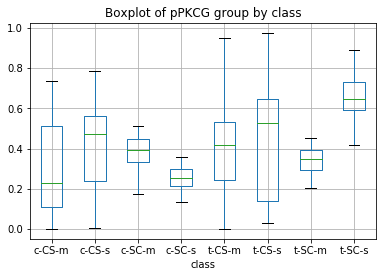

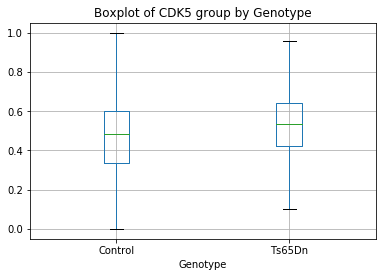

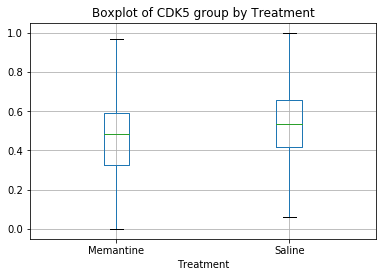

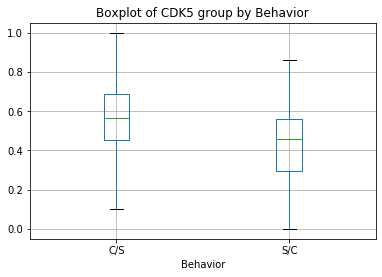

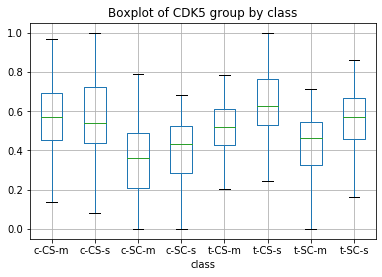

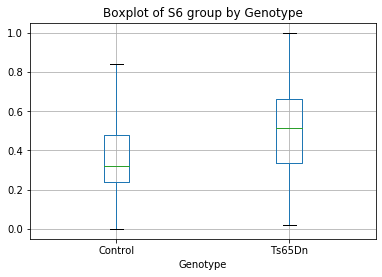

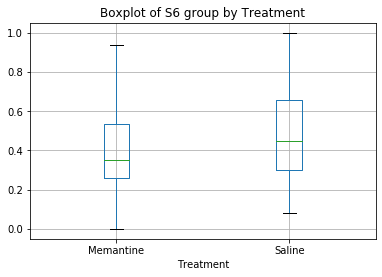

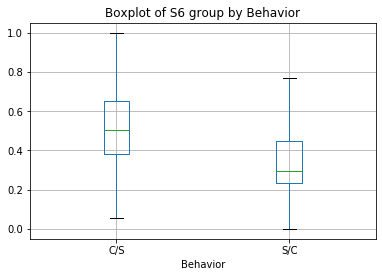

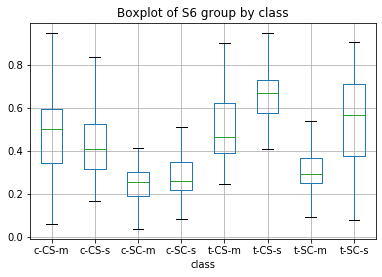

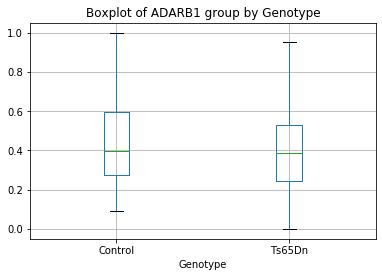

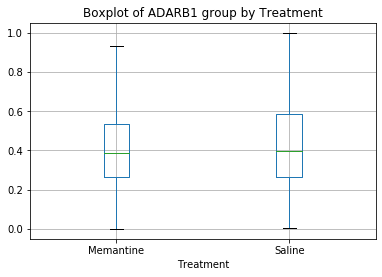

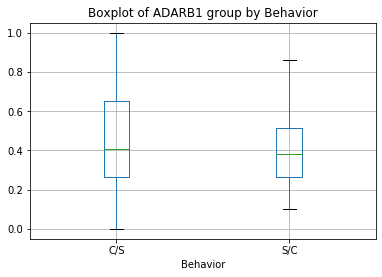

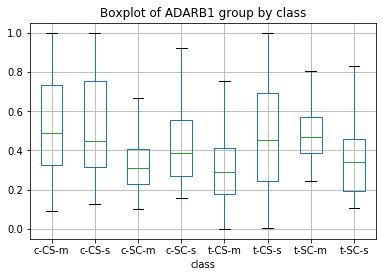

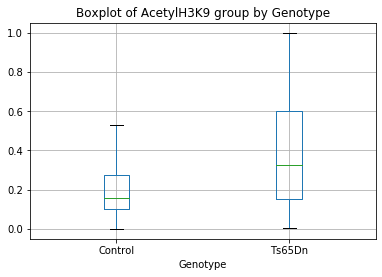

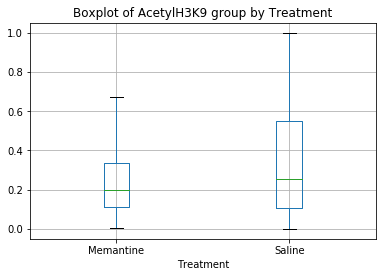

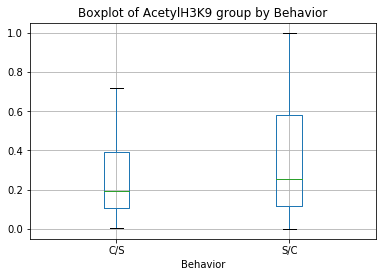

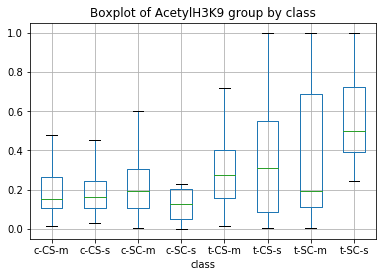

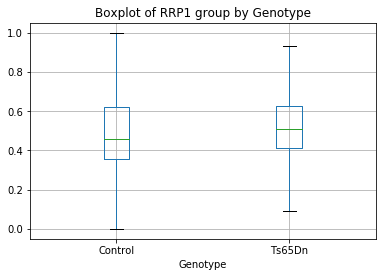

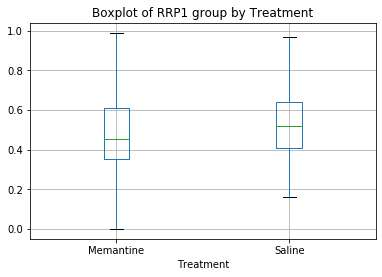

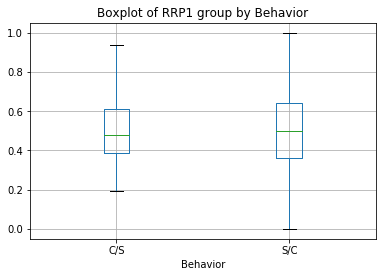

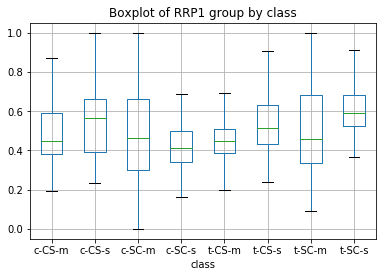

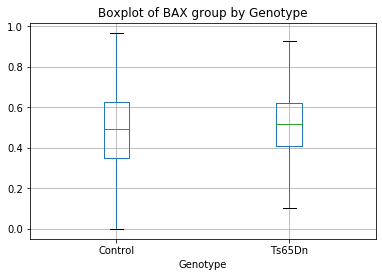

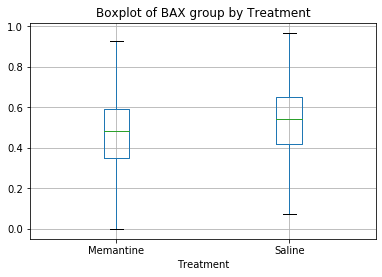

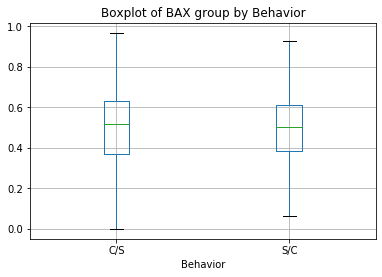

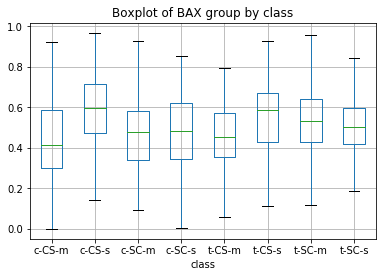

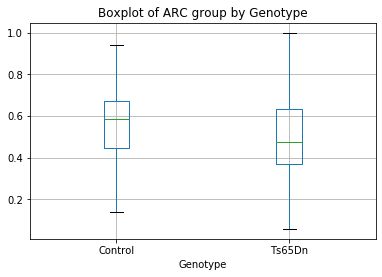

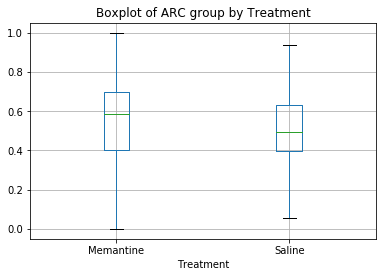

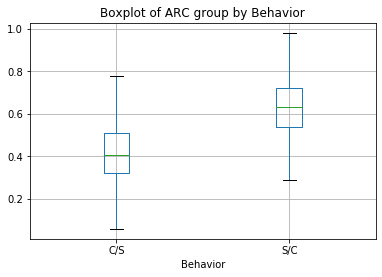

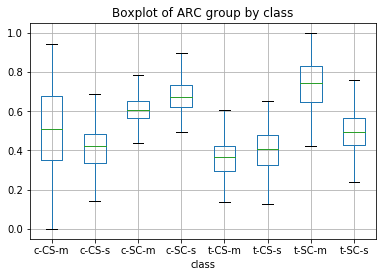

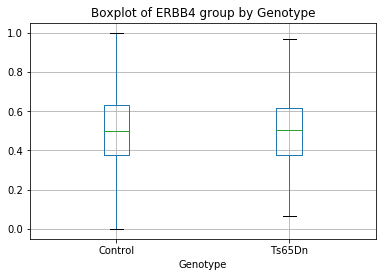

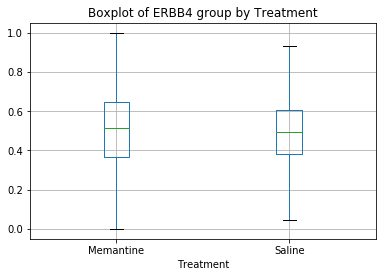

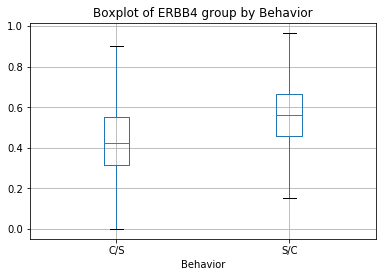

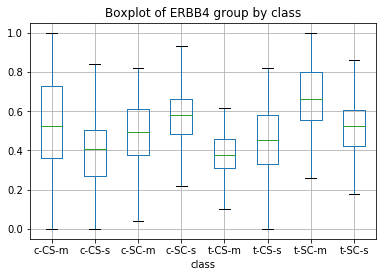

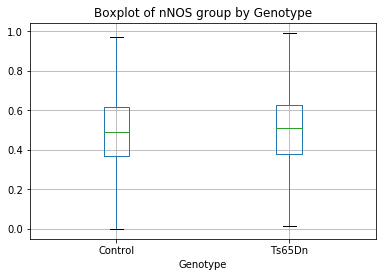

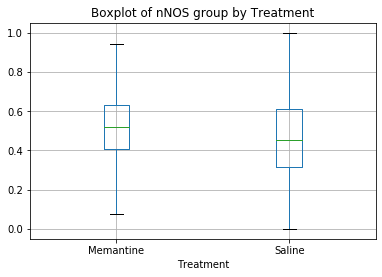

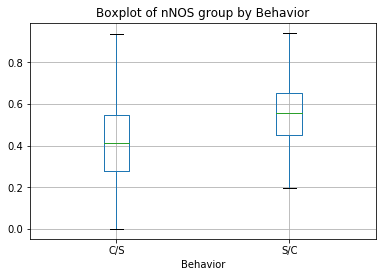

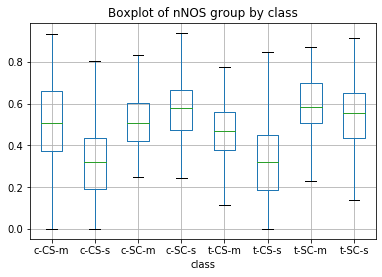

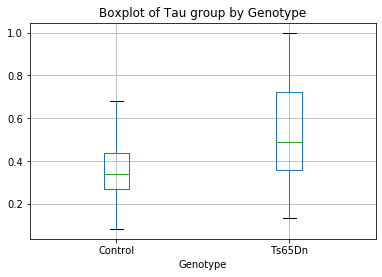

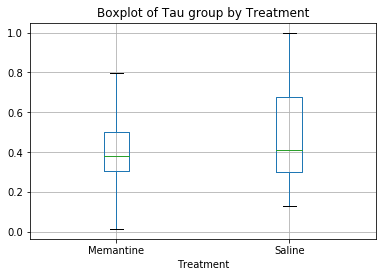

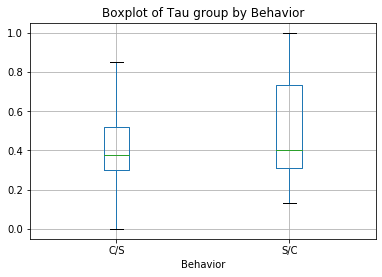

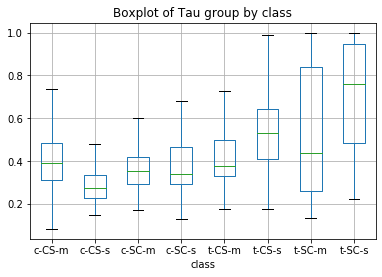

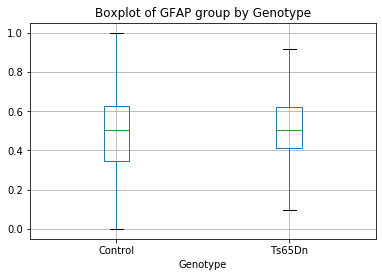

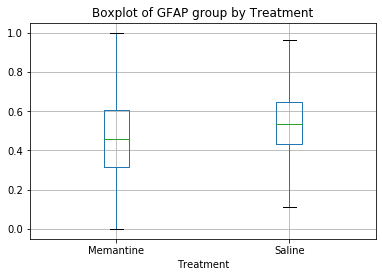

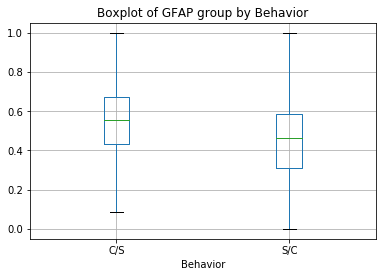

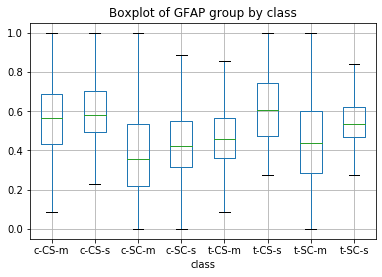

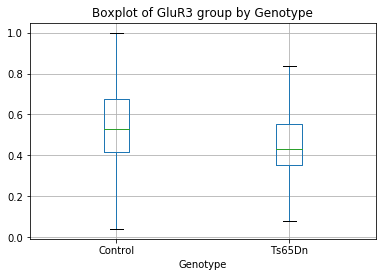

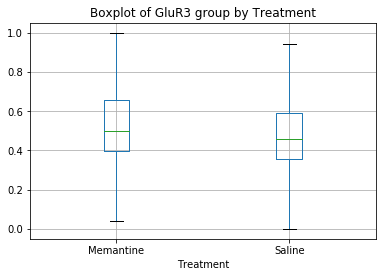

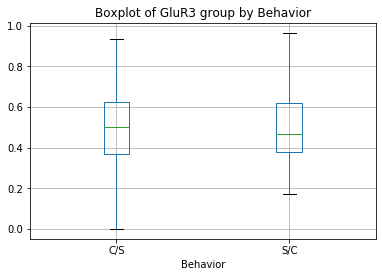

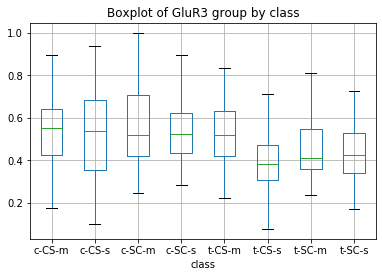

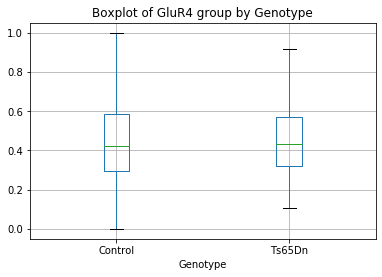

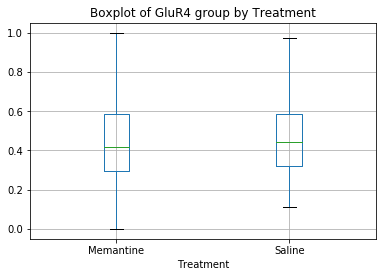

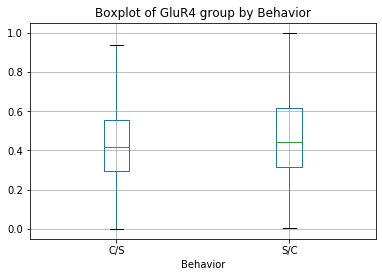

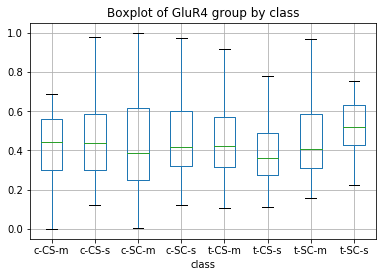

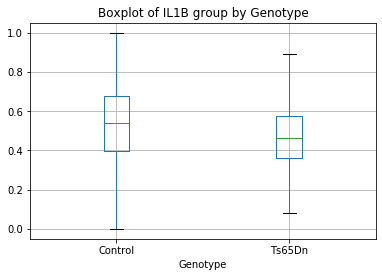

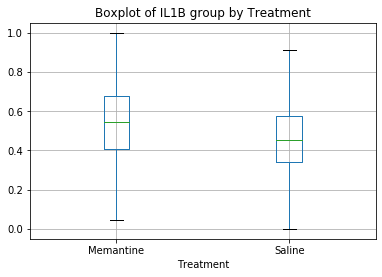

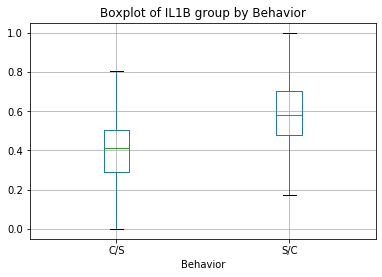

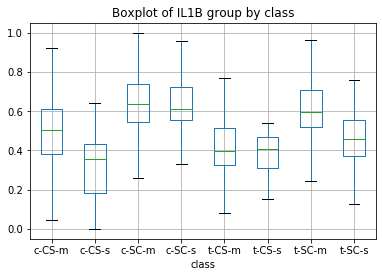

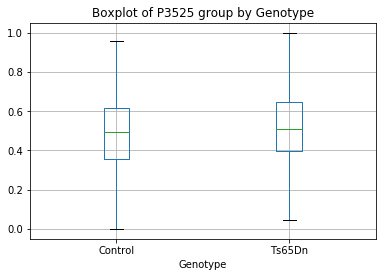

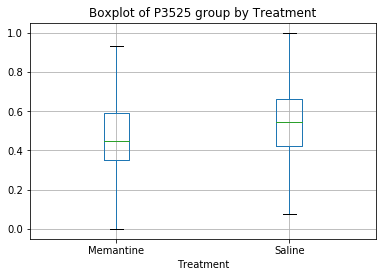

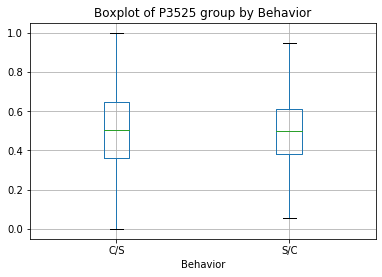

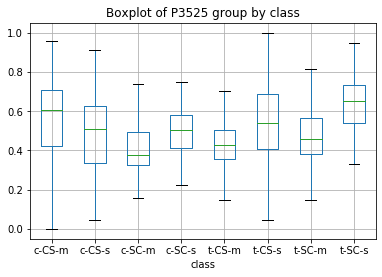

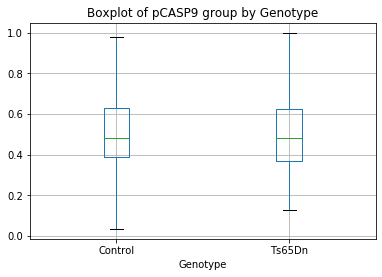

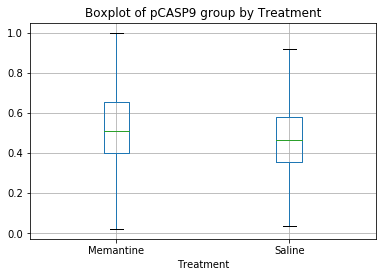

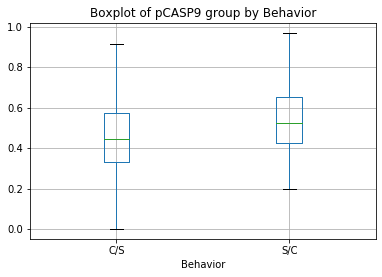

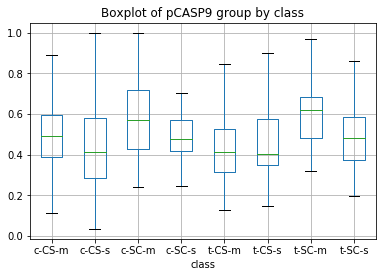

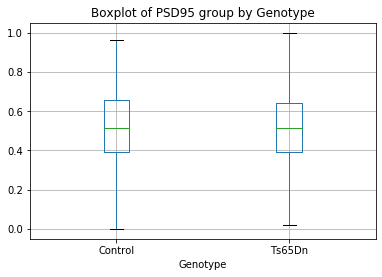

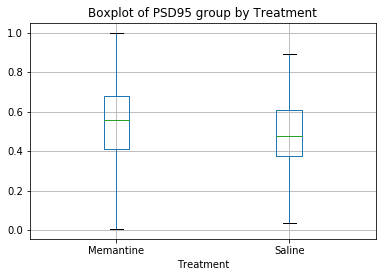

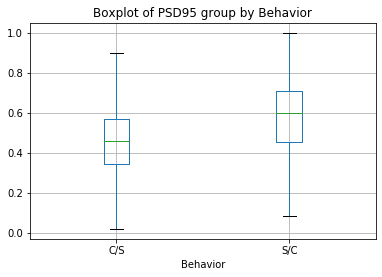

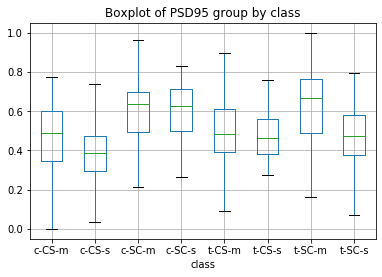

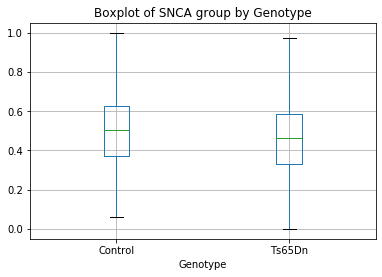

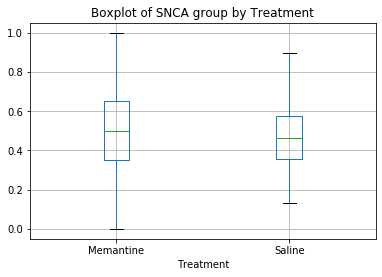

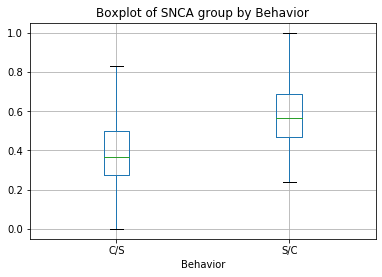

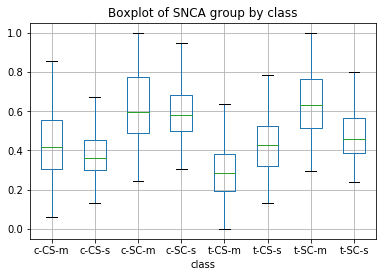

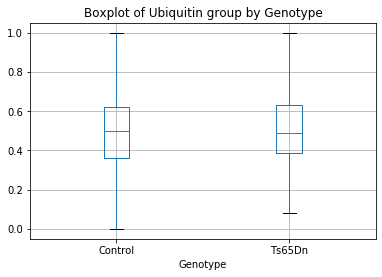

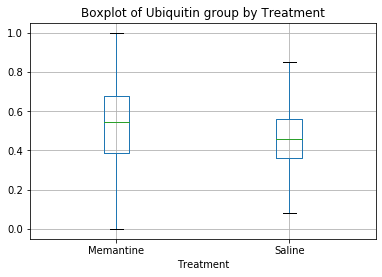

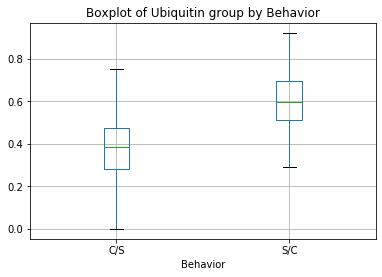

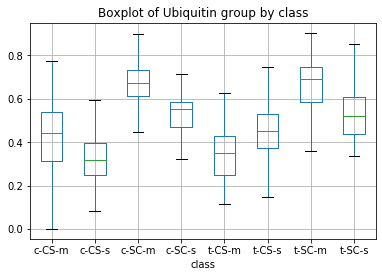

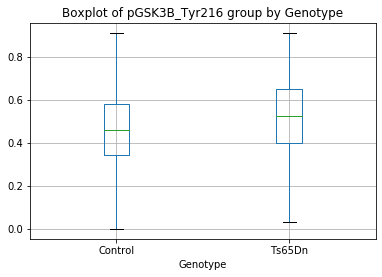

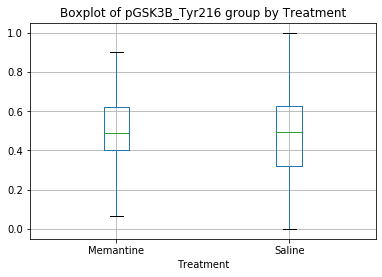

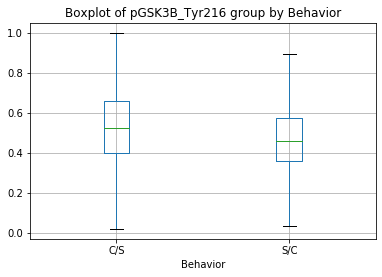

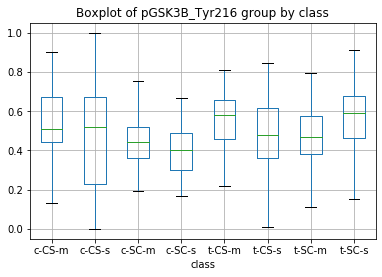

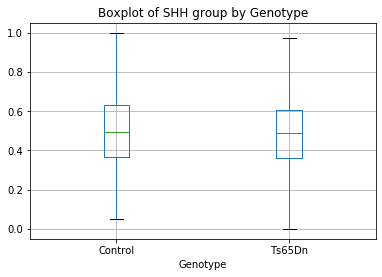

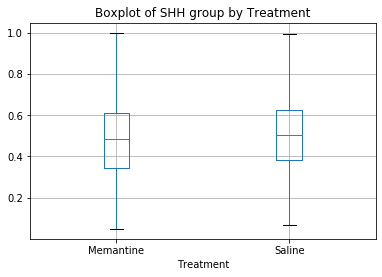

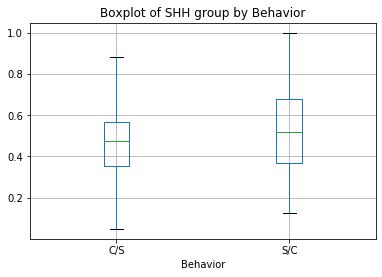

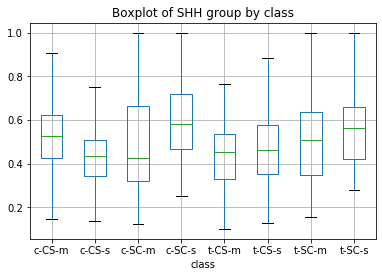

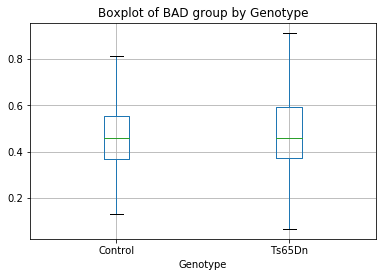

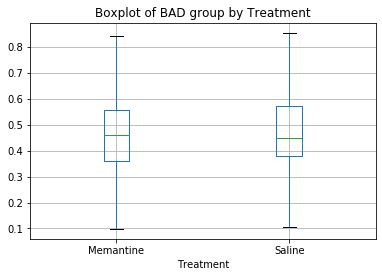

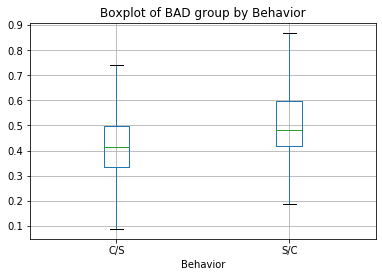

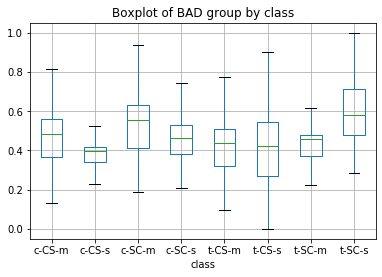

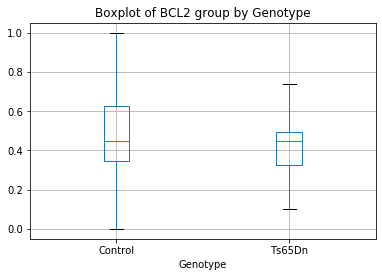

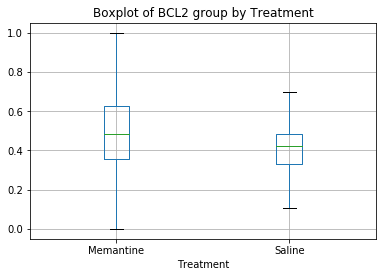

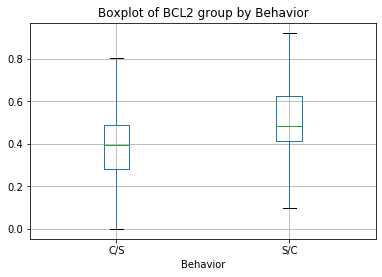

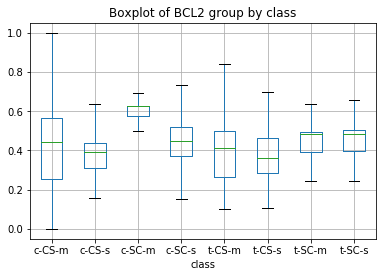

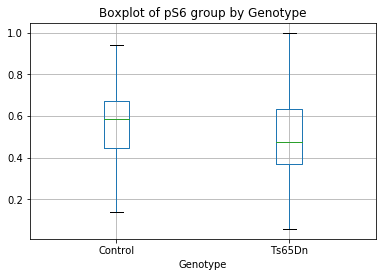

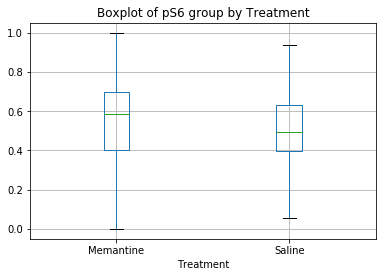

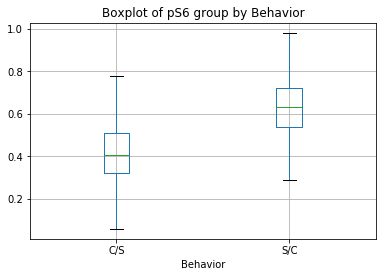

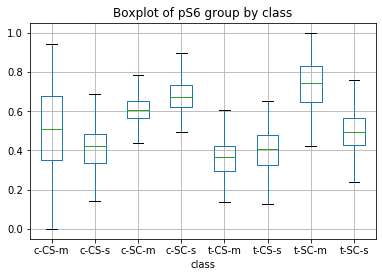

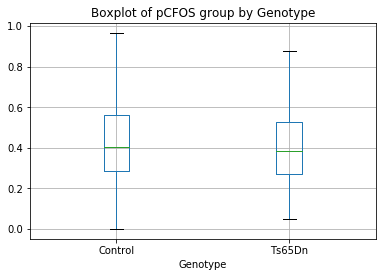

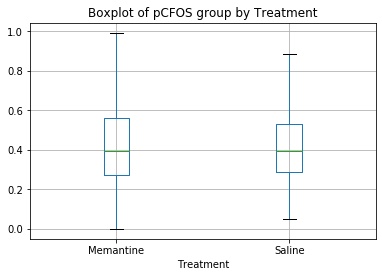

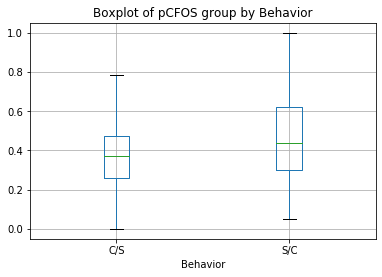

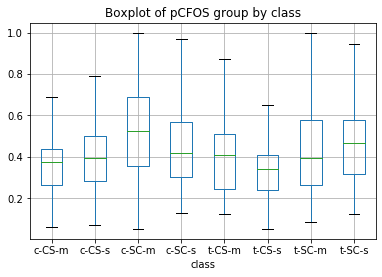

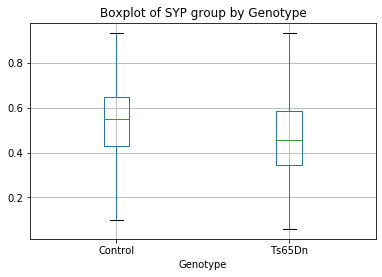

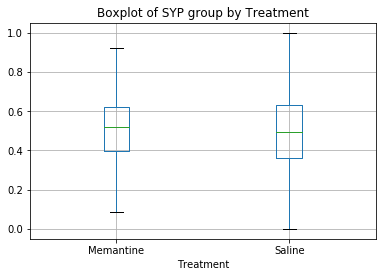

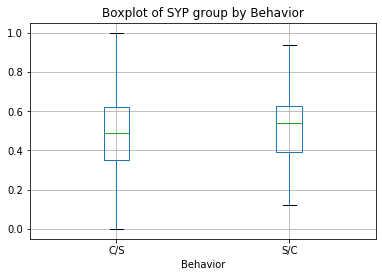

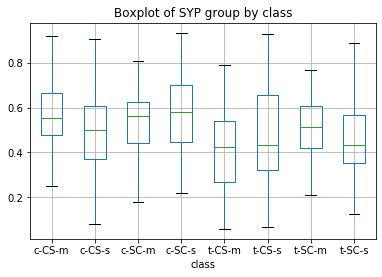

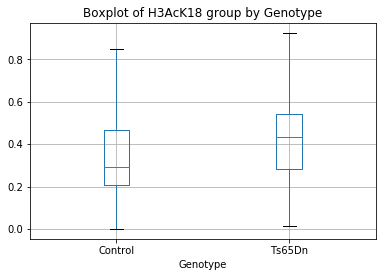

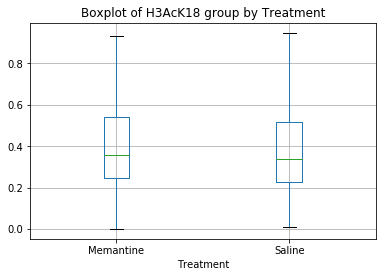

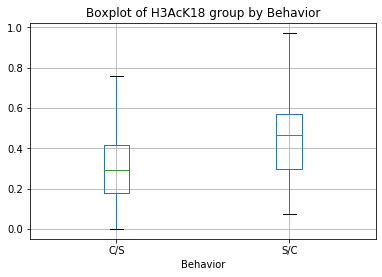

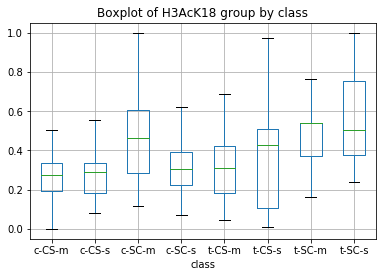

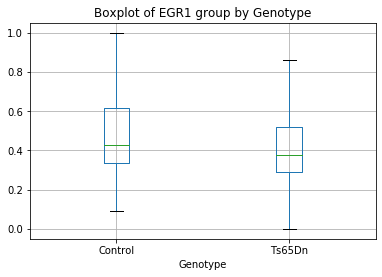

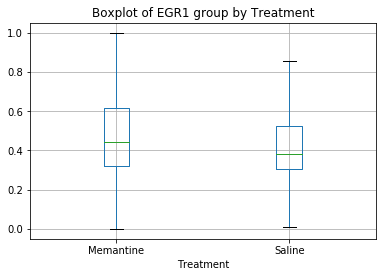

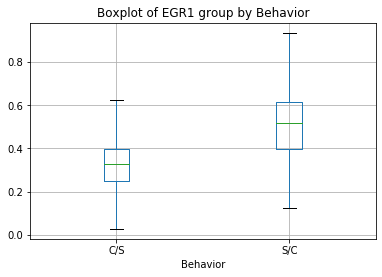

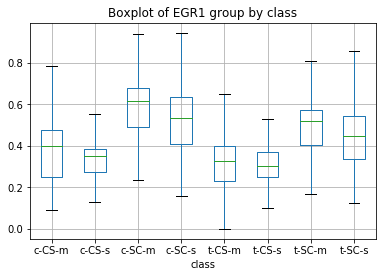

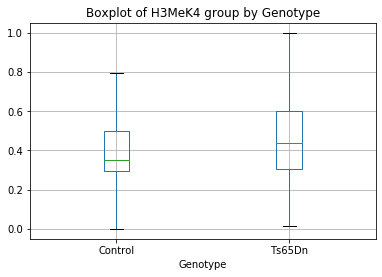

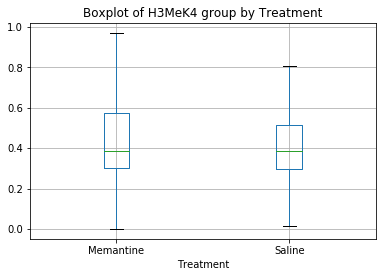

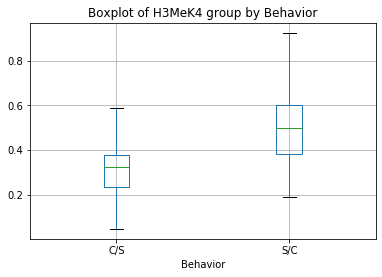

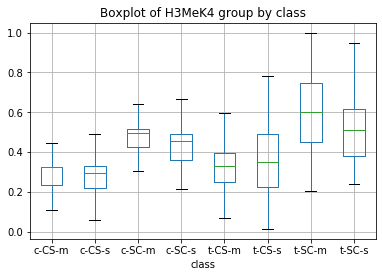

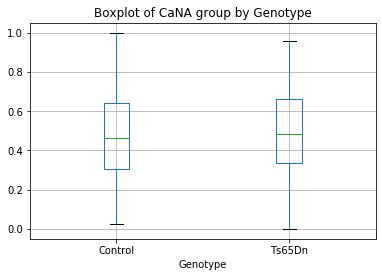

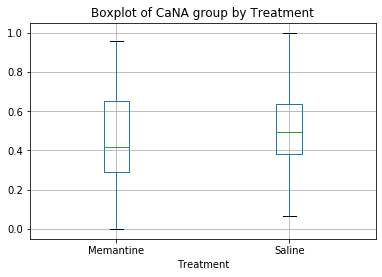

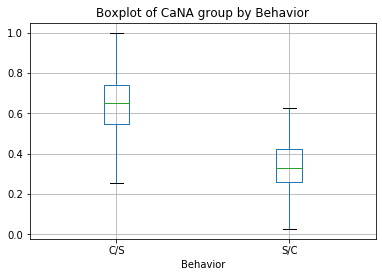

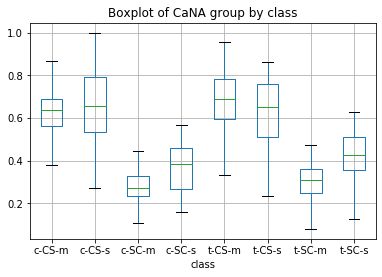

In [45]:
#check relation between all proteins and all describtion columns
for col in mice.loc[:,'DYRK1A':'CaNA']:
    proteinBoxplot(mice,col)

In [46]:
#Data modeling

In [47]:
#create subsets 
data = mice.loc[:,'DYRK1A':'CaNA']
Genotype = mice.loc[:,'Genotype']
Treatment = mice.loc[:,'Treatment']
Behavior = mice.loc[:,'Behavior']
target = mice.loc[:,'class']

In [48]:
#split data set for training and testing
x_train, x_test, y_train, y_test = train_test_split(data,target,random_state = 1)

In [49]:
#build a KNN classifier with default parameter and check score
clf = KNeighborsClassifier()
fit = clf.fit(x_train, y_train)
predicted = fit.predict(x_test)
clf.score(x_test, y_test)

0.9962962962962963

In [50]:
print(confusion_matrix(y_test, predicted))

[[45  0  0  0  0  1  0  0]
 [ 0 37  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0]
 [ 0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0 23  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 32]]


In [51]:
#tune parameter n_neighbors from 3 to 21 to compare scores
#n_neighbors = 3 has the hightest score
clf = KNeighborsClassifier(n_neighbors = 3)
fit = clf.fit(x_train, y_train)
predicted = fit.predict(x_test)
clf.score(x_test, y_test)

1.0

In [52]:
print(confusion_matrix(y_test, predicted))

[[46  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0]
 [ 0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0 23  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 32]]


In [53]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

      c-CS-m       1.00      1.00      1.00        46
      c-CS-s       1.00      1.00      1.00        37
      c-SC-m       1.00      1.00      1.00        38
      c-SC-s       1.00      1.00      1.00        34
      t-CS-m       1.00      1.00      1.00        31
      t-CS-s       1.00      1.00      1.00        23
      t-SC-m       1.00      1.00      1.00        29
      t-SC-s       1.00      1.00      1.00        32

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



In [54]:
#tuning parameters, keep n_neighbors = 3, set different p
clf = KNeighborsClassifier(n_neighbors = 3, p = 1)
fit = clf.fit(x_train, y_train)
predicted = fit.predict(x_test)
clf.score(x_test, y_test)

0.9962962962962963

In [55]:
print(confusion_matrix(y_test, predicted))

[[46  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  1  0  0]
 [ 0  0 38  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0]
 [ 0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0 23  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 32]]


In [56]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

      c-CS-m       1.00      1.00      1.00        46
      c-CS-s       1.00      0.97      0.99        37
      c-SC-m       1.00      1.00      1.00        38
      c-SC-s       1.00      1.00      1.00        34
      t-CS-m       1.00      1.00      1.00        31
      t-CS-s       0.96      1.00      0.98        23
      t-SC-m       1.00      1.00      1.00        29
      t-SC-s       1.00      1.00      1.00        32

    accuracy                           1.00       270
   macro avg       0.99      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



In [57]:
#tuning parameters, keep n_neighbors and p, set weights='distance'
clf = KNeighborsClassifier(n_neighbors = 3, p = 2, weights='distance')
fit = clf.fit(x_train, y_train)
predicted = fit.predict(x_test)
clf.score(x_test, y_test)

1.0

In [58]:
print(confusion_matrix(y_test, predicted))

[[46  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0]
 [ 0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0 23  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 32]]


In [59]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

      c-CS-m       1.00      1.00      1.00        46
      c-CS-s       1.00      1.00      1.00        37
      c-SC-m       1.00      1.00      1.00        38
      c-SC-s       1.00      1.00      1.00        34
      t-CS-m       1.00      1.00      1.00        31
      t-CS-s       1.00      1.00      1.00        23
      t-SC-m       1.00      1.00      1.00        29
      t-SC-s       1.00      1.00      1.00        32

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



In [60]:
#Hill climbing for feature selection in KNN 
#code from tutorial notes with modification
KNN_feature_selected = []
cur_MaxScore = 0.0
col_num = 77
col_Ind_Random = shuffle(range(0,col_num),random_state = 0)
for cur_f in range(0,col_num):
    KNN_feature_selected.append(col_Ind_Random[cur_f])
    newData = data.iloc[:,KNN_feature_selected]
    x_train,x_test,y_train,y_test = train_test_split(newData,target,random_state = 1)
    clfhc = KNeighborsClassifier(n_neighbors = 3, weights = 'distance',p = 1)
    fithc = clfhc.fit(x_train,y_train)
    cur_score = clfhc.score(x_test,y_test)
    if cur_score < cur_MaxScore:
        KNN_feature_selected.remove(col_Ind_Random[cur_f])
    elif cur_MaxScore ==1:  
        break
    else:
        cur_MaxScore = cur_score
        print("Score with " + str(len(KNN_feature_selected)) + " selected features: " + str(cur_score))
        print(KNN_feature_selected)

Score with 1 selected features: 0.16666666666666666
[48]
Score with 2 selected features: 0.37407407407407406
[48, 74]
Score with 3 selected features: 0.5370370370370371
[48, 74, 59]
Score with 4 selected features: 0.6222222222222222
[48, 74, 59, 54]
Score with 5 selected features: 0.6925925925925925
[48, 74, 59, 54, 34]
Score with 6 selected features: 0.7703703703703704
[48, 74, 59, 54, 34, 26]
Score with 7 selected features: 0.8185185185185185
[48, 74, 59, 54, 34, 26, 68]
Score with 8 selected features: 0.8481481481481481
[48, 74, 59, 54, 34, 26, 68, 33]
Score with 9 selected features: 0.8814814814814815
[48, 74, 59, 54, 34, 26, 68, 33, 45]
Score with 10 selected features: 0.9074074074074074
[48, 74, 59, 54, 34, 26, 68, 33, 45, 69]
Score with 11 selected features: 0.9222222222222223
[48, 74, 59, 54, 34, 26, 68, 33, 45, 69, 27]
Score with 12 selected features: 0.937037037037037
[48, 74, 59, 54, 34, 26, 68, 33, 45, 69, 27, 60]
Score with 13 selected features: 0.9592592592592593
[48, 74,

In [61]:
#print proteins selected by KNN
KNN_proteinList = data.columns[KNN_feature_selected].tolist()
KNN_proteinList.sort()
print(KNN_proteinList)

['AcetylH3K9', 'BAD', 'BCL2', 'CREB', 'EGR1', 'ERBB4', 'GluR4', 'IL1B', 'JNK', 'MEK', 'MTOR', 'NR1', 'NR2B', 'P3525', 'P38', 'S6', 'Tau', 'pCAMKII', 'pCASP9', 'pGSK3B', 'pP70S6']


In [62]:
#create a subset for the selected columns
KNN_data_selected = data.iloc[:,KNN_feature_selected]

In [63]:
#repeat modelling steps with selected subset and tuned parameters
x_train, x_test, y_train, y_test = train_test_split(KNN_data_selected,target,random_state = 1)
clf = KNeighborsClassifier(n_neighbors = 3, p = 1,weights='distance')
fit = clf.fit(x_train, y_train)
predicted = fit.predict(x_test)
clf.score(x_test, y_test)

1.0

In [64]:
print(confusion_matrix(y_test, predicted))

[[46  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0]
 [ 0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0 23  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 32]]


In [65]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

      c-CS-m       1.00      1.00      1.00        46
      c-CS-s       1.00      1.00      1.00        37
      c-SC-m       1.00      1.00      1.00        38
      c-SC-s       1.00      1.00      1.00        34
      t-CS-m       1.00      1.00      1.00        31
      t-CS-s       1.00      1.00      1.00        23
      t-SC-m       1.00      1.00      1.00        29
      t-SC-s       1.00      1.00      1.00        32

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



In [66]:
#build a decision tree classifier with default parameter and check score
clf_tree = DecisionTreeClassifier()
x_train, x_test, y_train, y_test = train_test_split(data,target,random_state = 10)
fit_tree = clf_tree.fit(x_train, y_train)
predicted_tree = fit_tree.predict(x_test)
clf_tree.score(x_test, y_test)

0.8814814814814815

In [67]:
print(confusion_matrix(y_test, predicted_tree))

[[22  4  1  0  2  0  0  1]
 [ 4 29  0  0  1  4  0  0]
 [ 1  0 31  0  0  0  2  0]
 [ 0  0  1 35  0  0  0  0]
 [ 1  1  0  0 32  1  0  0]
 [ 2  1  0  0  2 23  0  0]
 [ 0  0  0  2  0  0 30  0]
 [ 0  0  0  0  0  0  1 36]]


In [68]:
print(classification_report(y_test,predicted_tree))

              precision    recall  f1-score   support

      c-CS-m       0.73      0.73      0.73        30
      c-CS-s       0.83      0.76      0.79        38
      c-SC-m       0.94      0.91      0.93        34
      c-SC-s       0.95      0.97      0.96        36
      t-CS-m       0.86      0.91      0.89        35
      t-CS-s       0.82      0.82      0.82        28
      t-SC-m       0.91      0.94      0.92        32
      t-SC-s       0.97      0.97      0.97        37

    accuracy                           0.88       270
   macro avg       0.88      0.88      0.88       270
weighted avg       0.88      0.88      0.88       270



In [69]:
#tuning parameters, set criterion = 'entropy' and check score
clf_tree = DecisionTreeClassifier(criterion = 'entropy')
x_train, x_test, y_train, y_test = train_test_split(data,target,random_state = 10)
fit_tree = clf_tree.fit(x_train, y_train)
predicted_tree = fit_tree.predict(x_test)
clf_tree.score(x_test, y_test)

0.8629629629629629

In [70]:
print(confusion_matrix(y_test, predicted_tree))

[[27  2  0  0  0  1  0  0]
 [ 5 26  0  0  6  1  0  0]
 [ 0  0 30  0  0  0  4  0]
 [ 0  0  0 34  0  0  2  0]
 [ 3  0  1  0 29  2  0  0]
 [ 2  2  0  0  3 21  0  0]
 [ 0  0  0  2  0  0 30  0]
 [ 0  0  1  0  0  0  0 36]]


In [71]:
print(classification_report(y_test,predicted_tree))

              precision    recall  f1-score   support

      c-CS-m       0.73      0.90      0.81        30
      c-CS-s       0.87      0.68      0.76        38
      c-SC-m       0.94      0.88      0.91        34
      c-SC-s       0.94      0.94      0.94        36
      t-CS-m       0.76      0.83      0.79        35
      t-CS-s       0.84      0.75      0.79        28
      t-SC-m       0.83      0.94      0.88        32
      t-SC-s       1.00      0.97      0.99        37

    accuracy                           0.86       270
   macro avg       0.86      0.86      0.86       270
weighted avg       0.87      0.86      0.86       270



In [72]:
#tuning parameters, try different max_depth and check score
clf_tree = DecisionTreeClassifier(max_depth = 6)
x_train, x_test, y_train, y_test = train_test_split(data,target,random_state = 10)
fit_tree = clf_tree.fit(x_train, y_train)
predicted_tree = fit_tree.predict(x_test)
clf_tree.score(x_test, y_test)

0.8555555555555555

In [73]:
print(confusion_matrix(y_test, predicted_tree))

[[22  1  2  0  4  1  0  0]
 [ 5 27  0  0  1  5  0  0]
 [ 1  0 29  0  0  0  4  0]
 [ 0  0  1 35  0  0  0  0]
 [ 1  1  0  0 32  1  0  0]
 [ 3  0  0  0  2 23  0  0]
 [ 0  0  3  1  0  0 28  0]
 [ 0  0  1  0  0  0  1 35]]


In [74]:
print(classification_report(y_test,predicted_tree))

              precision    recall  f1-score   support

      c-CS-m       0.69      0.73      0.71        30
      c-CS-s       0.93      0.71      0.81        38
      c-SC-m       0.81      0.85      0.83        34
      c-SC-s       0.97      0.97      0.97        36
      t-CS-m       0.82      0.91      0.86        35
      t-CS-s       0.77      0.82      0.79        28
      t-SC-m       0.85      0.88      0.86        32
      t-SC-s       1.00      0.95      0.97        37

    accuracy                           0.86       270
   macro avg       0.85      0.85      0.85       270
weighted avg       0.86      0.86      0.86       270



In [75]:
#tuning parameters, try different min_samples_split and check score
clf_tree = DecisionTreeClassifier(min_samples_split = 30)
x_train, x_test, y_train, y_test = train_test_split(data,target,random_state = 10)
fit_tree = clf_tree.fit(x_train, y_train)
predicted_tree = fit_tree.predict(x_test)
clf_tree.score(x_test, y_test)

0.8037037037037037

In [76]:
print(confusion_matrix(y_test, predicted_tree))

[[22  4  0  0  2  2  0  0]
 [ 7 25  0  0  2  4  0  0]
 [ 1  0 29  0  0  0  4  0]
 [ 0  0  1 35  0  0  0  0]
 [ 2  6  0  0 24  3  0  0]
 [ 2  0  0  0  2 24  0  0]
 [ 0  0  4  2  0  0 24  2]
 [ 0  0  1  2  0  0  0 34]]


In [77]:
print(classification_report(y_test,predicted_tree))

              precision    recall  f1-score   support

      c-CS-m       0.65      0.73      0.69        30
      c-CS-s       0.71      0.66      0.68        38
      c-SC-m       0.83      0.85      0.84        34
      c-SC-s       0.90      0.97      0.93        36
      t-CS-m       0.80      0.69      0.74        35
      t-CS-s       0.73      0.86      0.79        28
      t-SC-m       0.86      0.75      0.80        32
      t-SC-s       0.94      0.92      0.93        37

    accuracy                           0.80       270
   macro avg       0.80      0.80      0.80       270
weighted avg       0.81      0.80      0.80       270



In [78]:
#tuning parameters, try different min_samples_leaf and check score
clf_tree = DecisionTreeClassifier(min_samples_leaf = 10)
x_train, x_test, y_train, y_test = train_test_split(data,target,random_state = 10)
fit_tree = clf_tree.fit(x_train, y_train)
predicted_tree = fit_tree.predict(x_test)
clf_tree.score(x_test, y_test)

0.8185185185185185

In [79]:
print(confusion_matrix(y_test, predicted_tree))

[[20  5  0  0  4  1  0  0]
 [ 6 23  0  0  7  2  0  0]
 [ 1  0 30  0  0  0  3  0]
 [ 0  0  2 32  0  0  2  0]
 [ 1  2  0  0 30  2  0  0]
 [ 2  0  0  0  2 24  0  0]
 [ 0  0  3  0  0  0 27  2]
 [ 0  0  0  2  0  0  0 35]]


In [80]:
print(classification_report(y_test,predicted_tree))

              precision    recall  f1-score   support

      c-CS-m       0.67      0.67      0.67        30
      c-CS-s       0.77      0.61      0.68        38
      c-SC-m       0.86      0.88      0.87        34
      c-SC-s       0.94      0.89      0.91        36
      t-CS-m       0.70      0.86      0.77        35
      t-CS-s       0.83      0.86      0.84        28
      t-SC-m       0.84      0.84      0.84        32
      t-SC-s       0.95      0.95      0.95        37

    accuracy                           0.82       270
   macro avg       0.82      0.82      0.82       270
weighted avg       0.82      0.82      0.82       270



In [81]:
#tuning parameters, set max_features = 'sqrt'and check score
clf_tree = DecisionTreeClassifier(max_features = 'sqrt')
x_train, x_test, y_train, y_test = train_test_split(data,target,random_state = 10)
fit_tree = clf_tree.fit(x_train, y_train)
predicted_tree = fit_tree.predict(x_test)
clf_tree.score(x_test, y_test)

0.8074074074074075

In [82]:
print(confusion_matrix(y_test, predicted_tree))

[[23  2  0  0  2  2  0  1]
 [ 2 26  0  0  1  7  2  0]
 [ 0  0 31  3  0  0  0  0]
 [ 1  0  1 33  0  0  0  1]
 [ 3  2  0  0 24  5  1  0]
 [ 2  1  0  0  2 22  0  1]
 [ 0  0  1  3  0  0 27  1]
 [ 1  1  0  0  2  0  1 32]]


In [83]:
print(classification_report(y_test,predicted_tree))

              precision    recall  f1-score   support

      c-CS-m       0.72      0.77      0.74        30
      c-CS-s       0.81      0.68      0.74        38
      c-SC-m       0.94      0.91      0.93        34
      c-SC-s       0.85      0.92      0.88        36
      t-CS-m       0.77      0.69      0.73        35
      t-CS-s       0.61      0.79      0.69        28
      t-SC-m       0.87      0.84      0.86        32
      t-SC-s       0.89      0.86      0.88        37

    accuracy                           0.81       270
   macro avg       0.81      0.81      0.80       270
weighted avg       0.81      0.81      0.81       270



In [84]:
#Hill climbing for feature selection in decision tree
#code from tutorial notes with modification
Tree_feature_selected = []
cur_MaxScore = 0.0
col_num = 77
col_Ind_Random = shuffle(range(0,col_num),random_state = 0)
for cur_f in range(0,col_num):
    Tree_feature_selected.append(col_Ind_Random[cur_f])
    newData = data.iloc[:,Tree_feature_selected]
    x_train,x_test,y_train,y_test = train_test_split(newData,target,random_state = 10)
    clfhc = DecisionTreeClassifier()
    fithc = clfhc.fit(x_train,y_train)
    cur_score = clfhc.score(x_test,y_test)
    if cur_score < cur_MaxScore:
        Tree_feature_selected.remove(col_Ind_Random[cur_f])
    elif cur_MaxScore ==1:  
        break
    else:
        cur_MaxScore = cur_score
        print("Score with " + str(len(Tree_feature_selected)) + " selected features: " + str(cur_score))
        print(Tree_feature_selected)

Score with 1 selected features: 0.18518518518518517
[48]
Score with 2 selected features: 0.3296296296296296
[48, 74]
Score with 3 selected features: 0.44074074074074077
[48, 74, 59]
Score with 4 selected features: 0.48518518518518516
[48, 74, 59, 54]
Score with 5 selected features: 0.5888888888888889
[48, 74, 59, 54, 34]
Score with 6 selected features: 0.6074074074074074
[48, 74, 59, 54, 34, 26]
Score with 7 selected features: 0.6444444444444445
[48, 74, 59, 54, 34, 26, 68]
Score with 8 selected features: 0.6555555555555556
[48, 74, 59, 54, 34, 26, 68, 69]
Score with 9 selected features: 0.6814814814814815
[48, 74, 59, 54, 34, 26, 68, 69, 60]
Score with 10 selected features: 0.6925925925925925
[48, 74, 59, 54, 34, 26, 68, 69, 60, 3]
Score with 11 selected features: 0.7148148148148148
[48, 74, 59, 54, 34, 26, 68, 69, 60, 3, 42]
Score with 12 selected features: 0.737037037037037
[48, 74, 59, 54, 34, 26, 68, 69, 60, 3, 42, 43]
Score with 13 selected features: 0.774074074074074
[48, 74, 59

In [85]:
#print selected proteins by decision tree
Tree_proteinList = data.columns[Tree_feature_selected].tolist()
Tree_proteinList.sort()
print(Tree_proteinList)

['ADARB1', 'BAD', 'BAX', 'BCL2', 'CAMKII', 'CREB', 'DSCR1', 'EGR1', 'ERBB4', 'ERK', 'GluR3', 'GluR4', 'H3AcK18', 'IL1B', 'JNK', 'NR1', 'NUMB', 'P38', 'PKCA', 'S6', 'SHH', 'SOD1', 'pBRAF', 'pCAMKII', 'pCASP9', 'pGSK3B_Tyr216', 'pMTOR', 'pP70S6', 'pPKCAB']


In [86]:
#create a subset for the selected columns
Tree_data_selected = data.iloc[:,Tree_feature_selected]

In [87]:
#repeat modelling steps with selected subset and tuned parameters
x_train, x_test, y_train, y_test = train_test_split(Tree_data_selected,target,random_state = 1)
clf_tree = DecisionTreeClassifier()
fit_tree = clf_tree.fit(x_train, y_train)
predicted_tree = fit_tree.predict(x_test)
clf_tree.score(x_test, y_test)

0.8222222222222222

In [88]:
print(confusion_matrix(y_test, predicted_tree))

[[36  5  0  0  5  0  0  0]
 [ 3 29  0  0  1  4  0  0]
 [ 0  0 33  0  0  0  5  0]
 [ 0  0  1 29  0  0  3  1]
 [ 2  3  0  0 24  2  0  0]
 [ 1  0  0  0  5 17  0  0]
 [ 0  0  5  0  0  0 24  0]
 [ 0  0  2  0  0  0  0 30]]


In [89]:
print(classification_report(y_test,predicted_tree))

              precision    recall  f1-score   support

      c-CS-m       0.86      0.78      0.82        46
      c-CS-s       0.78      0.78      0.78        37
      c-SC-m       0.80      0.87      0.84        38
      c-SC-s       1.00      0.85      0.92        34
      t-CS-m       0.69      0.77      0.73        31
      t-CS-s       0.74      0.74      0.74        23
      t-SC-m       0.75      0.83      0.79        29
      t-SC-s       0.97      0.94      0.95        32

    accuracy                           0.82       270
   macro avg       0.82      0.82      0.82       270
weighted avg       0.83      0.82      0.82       270



In [90]:
#create a document to save the tree graph
with open('mice.dot','w') as f:
    f = tree.export_graphviz(clf_tree, out_file=f,filled=True,class_names=target,feature_names = x_train.columns,rounded=True)

In [91]:
#check union set of proteins selected by two models
unionList = list(set(Tree_proteinList) & set(KNN_proteinList))
unionList.sort()
print(unionList)

['BAD', 'BCL2', 'CREB', 'EGR1', 'ERBB4', 'GluR4', 'IL1B', 'JNK', 'NR1', 'P38', 'S6', 'pCAMKII', 'pCASP9', 'pP70S6']


In [92]:
#check number of same proteins selected by two models
len(unionList)

14